<h1><center><b> Swire-CC Innovation Product Forecasting - Modelling </b></center></h1>

## <b>Authors: </b>
Michael Mendoza <br>
Neil Samuel Pulukuri <br>
Gnana Chaithanya Rawali Male <br>
Abinav Yadamani

<h1><center><b>Table of Contents</b></center></h1> <a name="11."> </a>

#### 1. <a href="#1.">Introduction</a>
#### 2. <a href="#2.">Project Goal & Analytics Approach</a>
#### 3. <a href="#3.">Data Description & Missing Value Analysis</a>
#### 4. <a href="#Q1_Modelling">Q1 Modelling</a>
#### 5. <a href="#Q2_Modelling">Q2 Modelling</a>
#### 6. <a href="#Q3_Modelling">Q3 Modelling</a>
#### 7. <a href="#Q6_Modelling">Q6 Modelling</a>
#### 8. <a href="#Q4_Modelling">Q4 Modelling</a>
#### 9. <a href="#Q5_Modelling">Q5 Modelling</a>
#### 10. <a href="#Q7_Modelling">Q7 Modelling</a>
#### 11. <a href="#12.">Team Contribution</a>


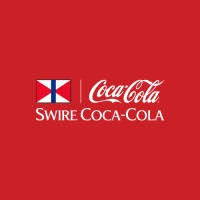


## Business Problem Introduction <a name="1."> </a>

### <b> Innovative Product Business </b>

<p style='text-align: justify;'>Launching innovative products is crucial for beverage companies to drive revenue growth, diversify the product portfolio, attract broader consumer categories, and strengthen brand visibility and loyalty. These products will also cater to recent  trends over prioritizing health and sustainability. Innovative products also boosts profit as these are offered at premium pricing. Overall, product innovation is critical for staying relevant in a dynamic market, ultimately boosting revenue and sustaining long-term growth. Swire Coca-Cola is constantly introducing innovation products into the market.
</p>

### <b> Business Problem </b>

<p style='text-align: justify;'>Swire Coca-Cola faces a business challenge in optimizing production planning and inventory management for its innovative beverage products segment. These products do not have a exact match of the historic sales and Swire in the past have faced situations on both the extremes, i.e., leaving money on the table due to lower estimations of exact demand and then over production leading to product distress.

 The company aims to accurately forecast the weekly demand, identify the most profitable region and time periods for launching these products using historical sales and market data of similar products of Swire and it's competitiors, along with customer demographic information to strike a balance between both out-of-stock and overproduction situations.
</p>

## Project Goal <a name="2."> </a>

The goals of this project are as follows:

1. Match and map the 7 innovative products provided by Swire with the historical data.
2. Depending on the question, identify the best region, time period and the forecasted demand.
3. Use time series forecasting methods such as ARIMA, SARIMA and Prophet to forecast demand.
4. Split the data into train-test for model evaluation to justify the models used and results obtained.
5. Measure the model performance using error metrics like MAE, MAPE & RMSE by comparing the estimated demand with the actual values for the train and test sets.
6. Use the model to forecast demand, time period or region. 



### <b> Modelling Notebook Purpose</b>

<p style='text-align: justify;'>The purpose of this notebook to develop multiple models to accurately forecast demand on a weekly basis for the given 7 innovative products. These models will be used by Swire to solve the problem with planning production and inventory for these products with the outcome being Swire takes maximum advantage to boost revenue from these innovative products with minimal overproduction. 
</p>

<h2> Modelling Approach & Assumptions</h2> <a name="3."> </a>


<b> Approach </b>
<p style='text-align: justify;'>The products that we are dealing with are innovative products, meaning, these products do not have an exact replica of sales in the past. Without historical data, building a model will pose a major challenge and blocker to this project. 

<p style='text-align: justify;'> To overcome this, the approach that we will be taking is to match and map the product attributes (Flavor/ Category/ Caloric Segment/ Package/ Manufacturer/ Brand) by use them to filter the data and then develop forecasting model. It would not be possible to apply all the 6 filters at a time, hence, we will be using 2-3 sets of filters for modelling in order to capture all the nuances in the data. Once we have a forecast with the initial set of filters, we will account for the remaining set of filters. 
</p>

<b>Assumptions </b>
1. Region

In the scope of the dataset, we have assumed regions and below is the mapping for the same:

- North West States: Washington (WA), Oregon (OR)

- North States: Idaho (ID), Wyoming (WY)

- South States: Arizona (AZ), New Mexico (NM)

- West States: Nevada (NV), California (CA)

- Central States: Utah (UT), Colorado (CO)

- East States: Nebraska (NE), South Dakota (SD), Kansas (KS)

<br>
2. 13 weeks of the year - consecutive or best 13 of the year?
<p style='text-align: justify;'>
    The questions provided by Swire does not specify if the 13 weeks needs to be consecutive or can be the top 13 weeks of the year in any random fashion. For the sake of this project, we will consider the best set of 13 consecutive weeks. The reason for this is simple: In the inital couple of meetings with the Swire stakeholders, we were notified that based on how well the product performs in the following weeks post launch, retail stores shall be restocked. Morever, it might be a feasible option for Swire to launch a new product only for 1 week and then again restock several months later, which is not reasonable at all. Keeping all these factors in mind, in the scope of this project, when the questions asks which 13 weeks of the year, we will assume which consecutive 13 weeks of the year. 
</p>

### Data Preparation

<p style='text-align: justify;'>
Data Preparation is the process of transforming raw data into a format that is suitable for analysis and modeling. This includes steps such as variable transformations, feature engineering and handling NAs. In the context of this project, data preparation will vary depending on the question. Some examples of data preparation are as follows:

1. For instance, questions with region involved will need a column to be added for marking regions based on the states that we mapped from the EDA. 

2. Another instance of data preparation is that for the Prophet model, the inputs to the model needs to be formatted as 'ds' and 'y' columns only where ds is the date column and y is the actual values of the target variable. In our case we will focus on unit sales only and neglect dollar sales since from the EDA we observed very strong multi-collinearity between these two variables.  

3. In the EDA phase, missing values have been identified for few particular Brands were missing. After thorough analysis on these brands, we have already imputed them. 

In addition to the above pointed out pre-model work, question and model specific data preparation will be listed wherever necessary throughout the notebook.


</p>


In [4]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Setting the warnings to be ignored
warnings.filterwarnings('ignore')

In [3]:
#market_data = pd.read_csv(r"/content/drive/MyDrive/FACT_MARKET_DEMAND_Ref.csv")
import pandas as pd
market_demand = pd.read_csv(r"/content/drive/My Drive/Copy of FACT_MARKET_DEMAND.csv")

In [5]:
market_demand['CALORIC_SEGMENT'].fillna(market_demand['CALORIC_SEGMENT'].mode()[0], inplace=True)
print("\nMissing value imputation check:")
print(market_demand.isnull().sum().sum())


Missing value imputation check:
0


<h2> Q1 </h2> <a name="Q1_Modelling"></a>

Item Description: Diet Smash Plum 11Small 4One
- Caloric Segment: Diet
- Market Category: SSD
- Manufacturer: Swire-CC
- Brand: Diet Smash
- Package Type: 11Small 4One
- Flavor: ‘Plum’

Which 13 weeks of the year would this product perform best in the market? What is the forecasted demand, in weeks, for those 13 weeks?


In [103]:
# filtering for Plum
plum = market_demand[(market_demand['ITEM'].str.contains('PLUM', case=False, regex=True))]

In [104]:
# Assuming 'DATE' column is in datetime format
plum['DATE'] = pd.to_datetime(plum['DATE'])

# Find the earliest date
earliest_date = plum['DATE'].min()

# Calculate the week numbers from the earliest date
plum['WEEK_NUMBER'] = (plum['DATE'] - earliest_date).dt.days // 7 + 1

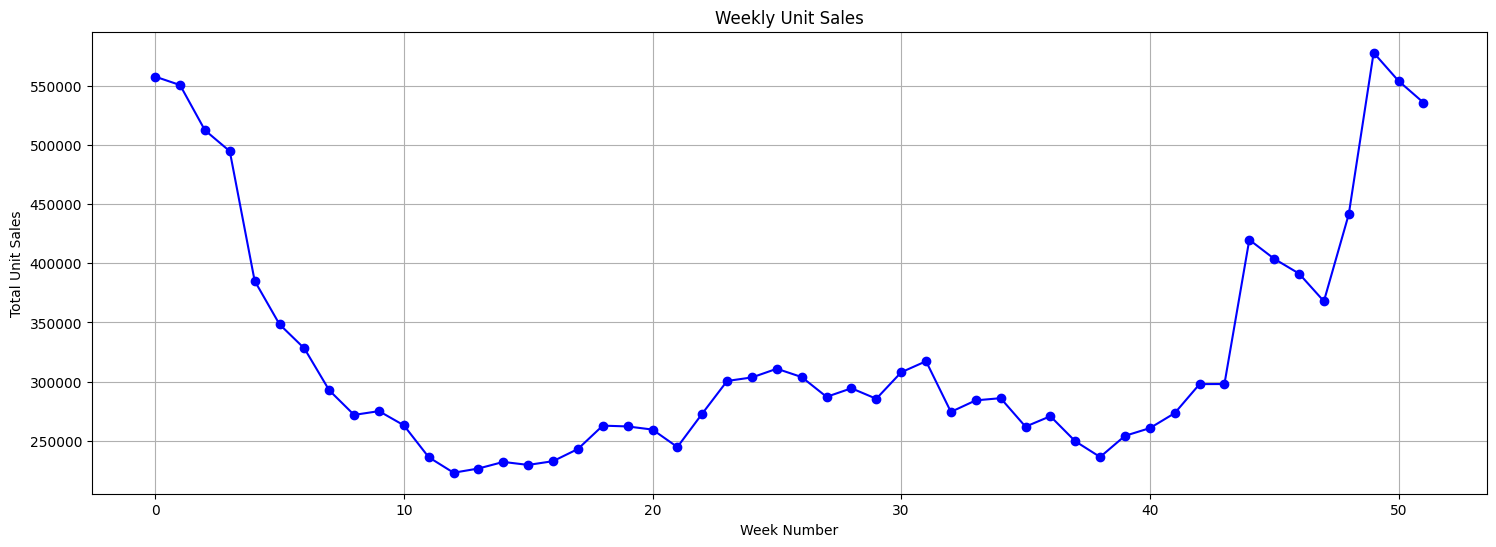

In [146]:

# Aggregate data by week number
weekly_sales = plum.groupby('WEEK_NUMBER')['UNIT_SALES'].sum()

# Plot time series
plt.figure(figsize=(18, 6))
weekly_sales.plot(marker='o', color='blue', linestyle='-')
plt.title('Weekly Unit Sales')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(True)
plt.show()

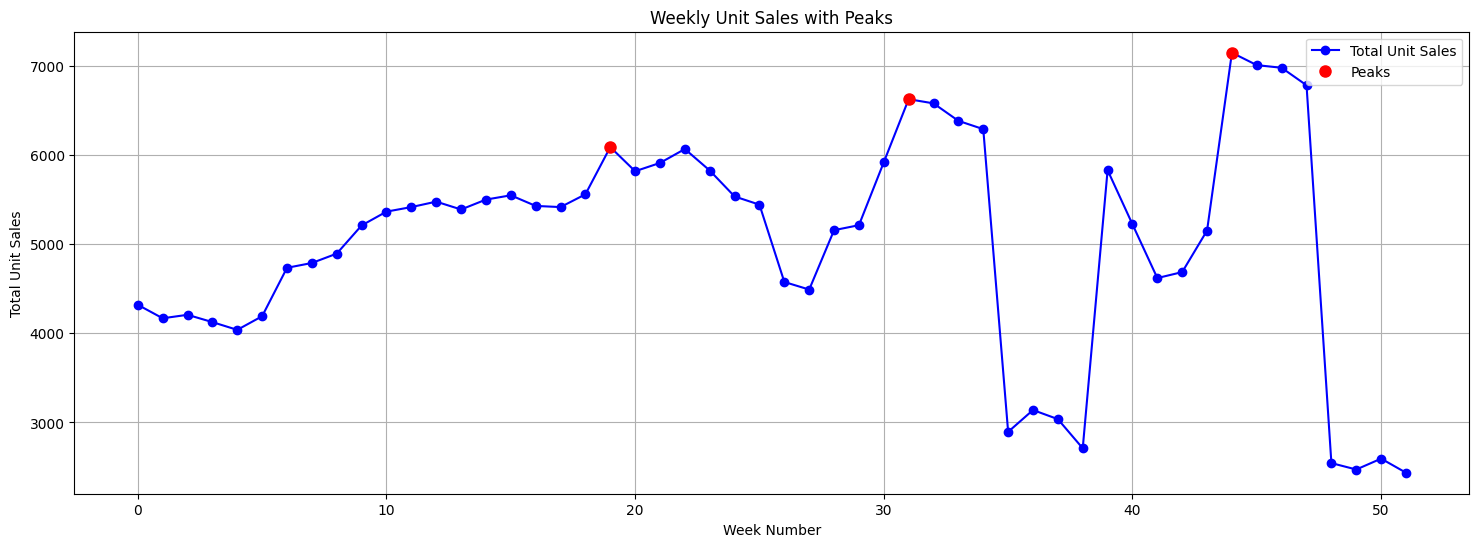

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Assuming 'plum' dataframe contains 'WEEK_NUMBER' and 'UNIT_SALES' columns

# Aggregate data by week number
weekly_sales = plum[plum['MANUFACTURER'] == 'SWIRE-CC'].groupby('WEEK_NUMBER')['UNIT_SALES'].sum()

# Find local maxima (peaks)
peaks_index = argrelextrema(weekly_sales.values, comparator=lambda x, y: x > y, order=5)[0]
peaks = weekly_sales.iloc[peaks_index]

# Plot time series with peaks
plt.figure(figsize=(18, 6))
weekly_sales.plot(marker='o', color='blue', linestyle='-', label='Total Unit Sales')
peaks.plot(marker='o', color='red', linestyle='', markersize=8, label='Peaks')
plt.title('Weekly Unit Sales with Peaks')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(True)
plt.legend()
plt.show()

In [107]:
plum['13_WEEK_INTERVAL'] = (plum['WEEK_NUMBER'] - 1) // 13 + 1
plum.head(5)

DATE  MARKET_KEY CALORIC_SEGMENT         CATEGORY  UNIT_SALES  \
32  2022-03-05        1058         REGULAR              SSD        53.0   
277 2022-09-24         534      DIET/LIGHT  SPARKLING WATER        19.0   
353 2022-08-06          58         REGULAR           ENERGY        30.0   
485 2021-07-24         399      DIET/LIGHT  SPARKLING WATER       169.0   
556 2020-12-05         556         REGULAR              SSD        14.0   

     DOLLAR_SALES MANUFACTURER                BRAND            PACKAGE  \
32         101.72       JOLLYS    BEAUTIFUL GREENER       2L MULTI JUG   
277         30.13        COCOS     EXCLAMATION SODA  16SMALL MULTI CUP   
353         56.02       JOLLYS  SUPER-DUPER PUNCHED  16SMALL MULTI CUP   
485        625.57        BEARS                CROWN   12SMALL 8ONE CUP   
556         23.78       JOLLYS    BEAUTIFUL GREENER       2L MULTI JUG   

                                                  ITEM  WEEK_NUMBER  \
32   BEAUTIFUL GREENER GENTLE DRINK PLUM  JUG 67.6 ...           66   
277  EXCLAMATION REFRESHER  DRINK  FLAVORED SPARKLI...           95   
353  SUPER-DUPER PITAYA ED ENERGY DRINK HARDONLY PL...           88   
485  CROWN SPARKLING WATER BEACH PLUM ZERO CALORIE ...           34   
556  BEAUTIFUL GREENER GENTLE DRINK PLUM  JUG 67.6 ...            1   

     13_WEEK_INTERVAL  
32                  6  
277                 8  
353                 7  
485                 3  
556                 1

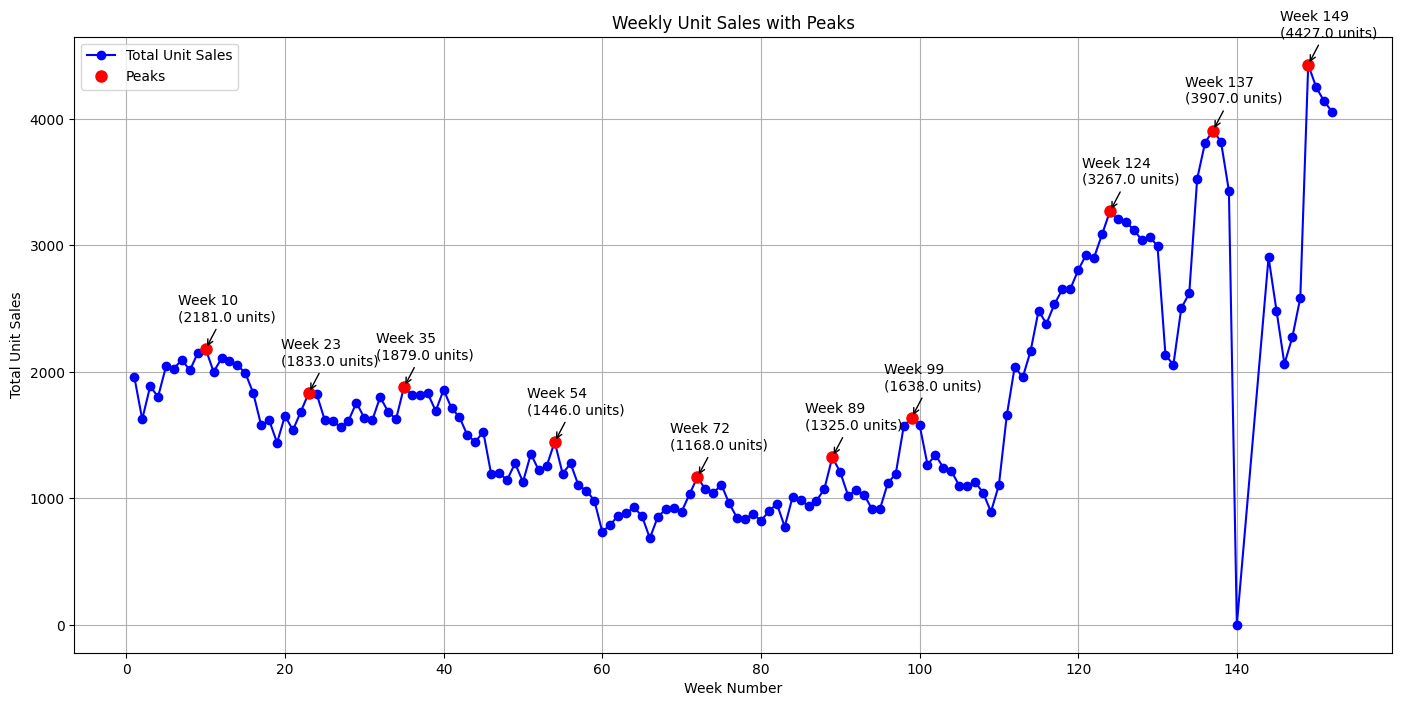

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Assuming 'plum' dataframe contains 'WEEK_NUMBER' and 'UNIT_SALES' columns

# Aggregate data by week number
weekly_sales = plum[plum['MANUFACTURER'] == 'SWIRE-CC'].groupby('WEEK_NUMBER')['UNIT_SALES'].sum()

# Find local maxima (peaks)
peaks_index = argrelextrema(weekly_sales.values, comparator=lambda x, y: x > y, order=5)[0]
peaks = weekly_sales.iloc[peaks_index]

# Plot time series with peaks
plt.figure(figsize=(17, 8))
weekly_sales.plot(marker='o', color='blue', linestyle='-', label='Total Unit Sales')
peaks.plot(marker='o', color='red', linestyle='', markersize=8, label='Peaks')

# Annotate peaks with week number
for week, sales in peaks.items():
    plt.annotate(f'Week {week}\n({sales} units)', xy=(week, sales), xytext=(-20, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'))



plt.title('Weekly Unit Sales with Peaks')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(True)
plt.legend()
plt.show()

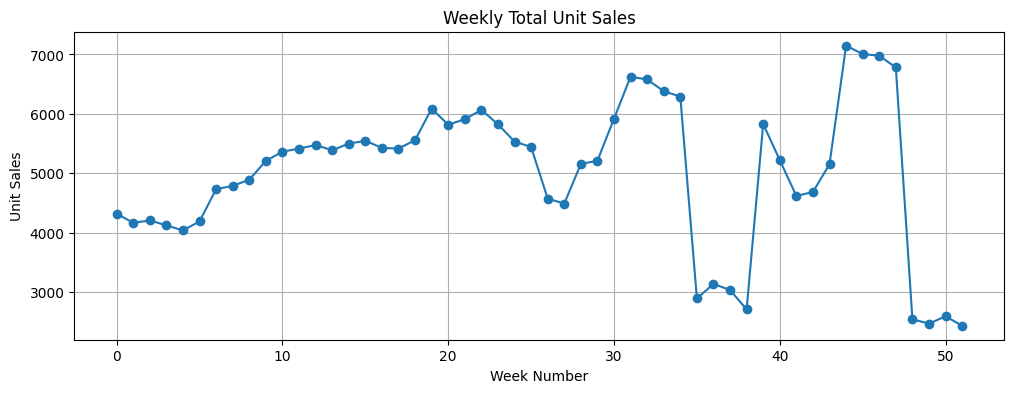

In [109]:
earliest_date = plum['DATE'].min()

# Step 2: Calculate week numbers
plum['WEEK_NUMBER'] = ((plum['DATE'] - earliest_date).dt.days // 7) % 52

# Step 3: Aggregate the data for every week
weekly_data = plum[plum['MANUFACTURER'] == 'SWIRE-CC'].groupby('WEEK_NUMBER')['UNIT_SALES'].sum().reset_index()

# Step 4: Create a time series plot
plt.figure(figsize=(12, 4))
plt.plot(weekly_data['WEEK_NUMBER'], weekly_data['UNIT_SALES'], marker='o', linestyle='-')
plt.xlabel('Week Number')
plt.ylabel('Unit Sales')
plt.title('Weekly Total Unit Sales')
plt.grid(True)
plt.show()


In [110]:
import pandas as pd

# Assuming weekly_data is your DataFrame containing 'WEEK_NUMBER' and 'UNIT_SALES' columns

# Sort the DataFrame by 'WEEK_NUMBER' if it's not already sorted
weekly_data = weekly_data.sort_values(by='WEEK_NUMBER')

# Ensure that there are enough rows to compute the rolling sum
if len(weekly_data) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_data) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_data.loc[i:i+12, 'UNIT_SALES'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_data.iloc[i]['WEEK_NUMBER']}-{weekly_data.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

    # Display the DataFrame with the rolling sum and 13-week intervals
    #print(rolling_sales_df)


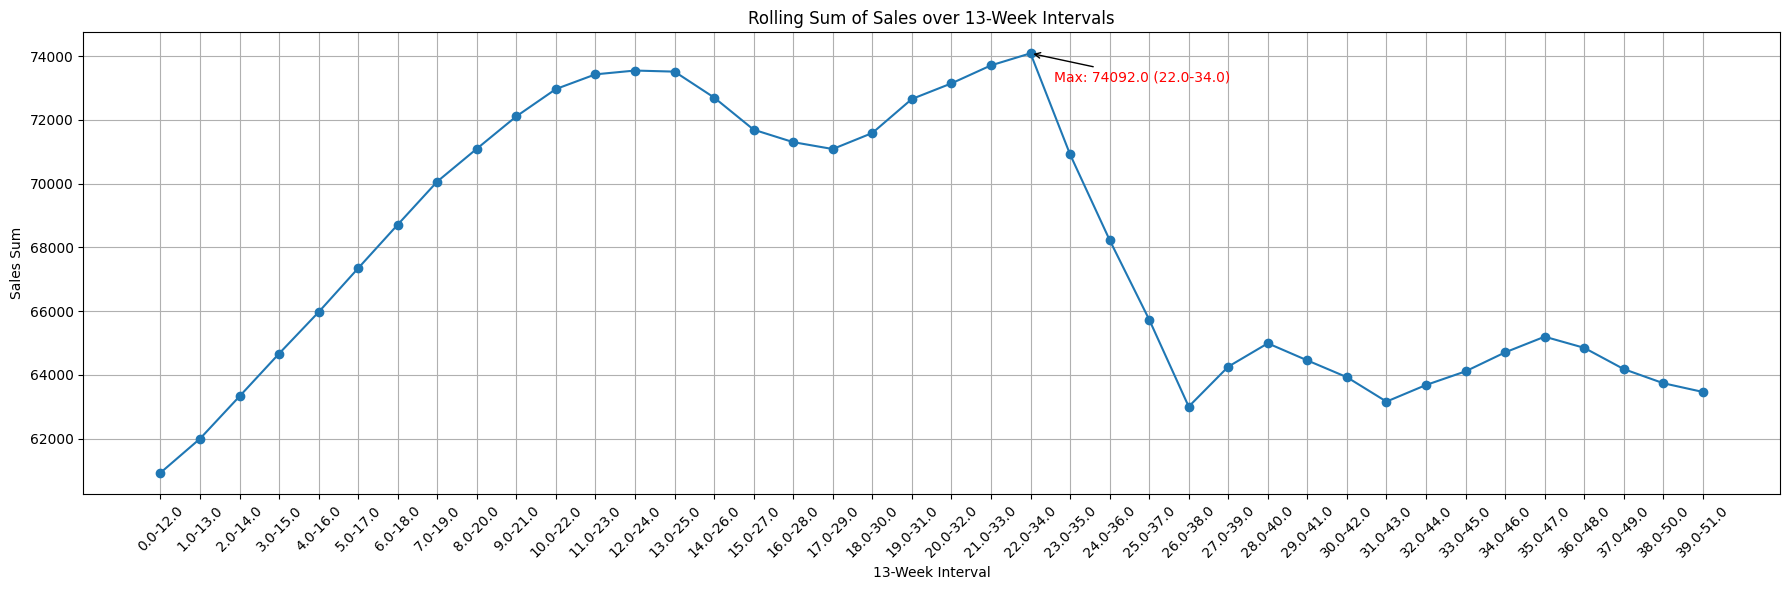

In [111]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = sales_sum[max_index]
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(80, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()



In [112]:
plum.sort_values('DATE').head(2)

DATE  MARKET_KEY CALORIC_SEGMENT            CATEGORY  \
6713499  2020-12-05          61      DIET/LIGHT  ING ENHANCED WATER   
23949234 2020-12-05         117         REGULAR                 SSD   

          UNIT_SALES  DOLLAR_SALES MANUFACTURER              BRAND  \
6713499          6.0          5.28       JOLLYS   DIGRESS FLAVORED   
23949234         5.0          8.50       JOLLYS  BEAUTIFUL GREENER   

                    PACKAGE  \
6713499   20SMALL MULTI JUG   
23949234  20SMALL MULTI JUG   

                                                       ITEM  WEEK_NUMBER  \
6713499   DIGRESS NOURISH ENHANCE WATER BEVERAGE PLUM  K...            0   
23949234  BEAUTIFUL GREENER GENTLE DRINK PLUM  JUG 20 LI...            0   

          13_WEEK_INTERVAL  
6713499                  1  
23949234                 1

In [113]:
swire_plum = plum[plum['MANUFACTURER'] == 'SWIRE-CC']
swire_plum= swire_plum.sort_values('DATE')

swire_plum_daily = swire_plum.groupby('DATE')['UNIT_SALES'].sum().reset_index()
swire_plum_daily.head(2)

DATE  UNIT_SALES
0 2020-12-05      1961.0
1 2020-12-12      1625.0

In [114]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import pandas as pd


# Convert DATE column to datetime if not already in datetime format
swire_plum_daily['DATE'] = pd.to_datetime(swire_plum_daily['DATE'])

# Sort the data by date
swire_plum_daily = swire_plum_daily.sort_values(by='DATE')

# Calculate the index for partitioning the data
partition_index = int(len(swire_plum_daily) * 0.8)

# Split the data into train and test sets
train_data = swire_plum_daily.iloc[:partition_index]
test_data = swire_plum_daily.iloc[partition_index:]

# Rename columns as per Prophet's requirements
train_data = train_data.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})
test_data = test_data.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

# Print the lengths of train and test dataframes
print("Length of Train Data:", len(train_data))
print("Length of Test Data:", len(test_data))

# Print the start and end dates of train and test dataframes
print("Start Date of Train Data:", train_data['ds'].min())
print("End Date of Train Data:", train_data['ds'].max())
print("Start Date of Test Data:", test_data['ds'].min())
print("End Date of Test Data:", test_data['ds'].max())



Length of Train Data: 119
Length of Test Data: 30
Start Date of Train Data: 2020-12-05 00:00:00
End Date of Train Data: 2023-03-11 00:00:00
Start Date of Test Data: 2023-03-18 00:00:00
End Date of Test Data: 2023-10-28 00:00:00


In [ ]:
# Initialize and fit the Prophet model
p_model = Prophet()
p_model.fit(train_data)

# Create future dates for forecasting
future = p_model.make_future_dataframe(periods=34, freq='W')

# Make predictions
forecast = p_model.predict(future)

# Plot the forecast
plot_plotly(p_model, forecast)

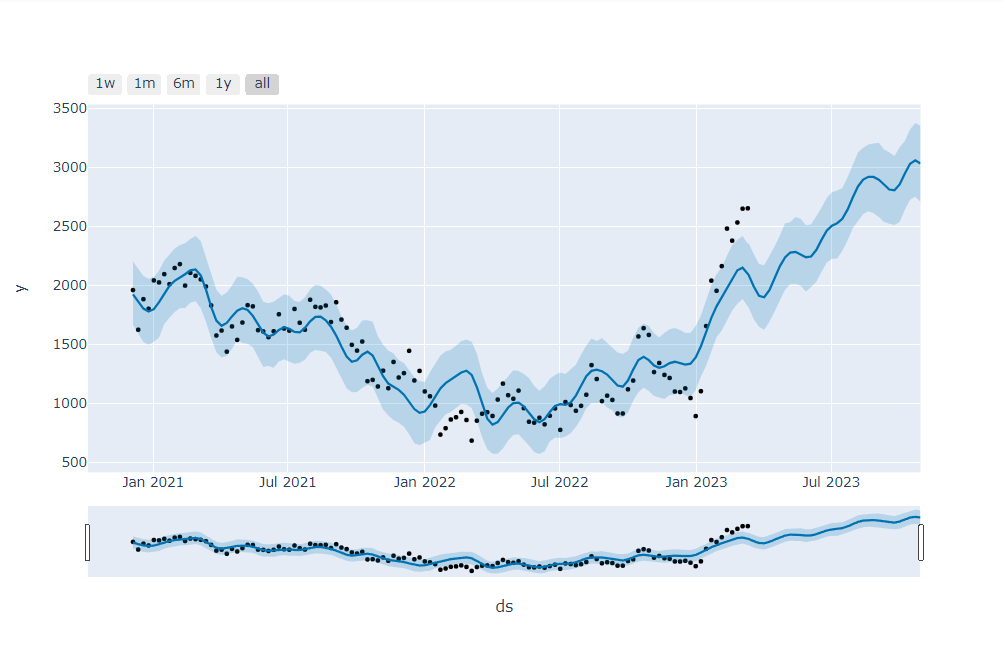

In [116]:
plot_components_plotly(p_model, forecast)

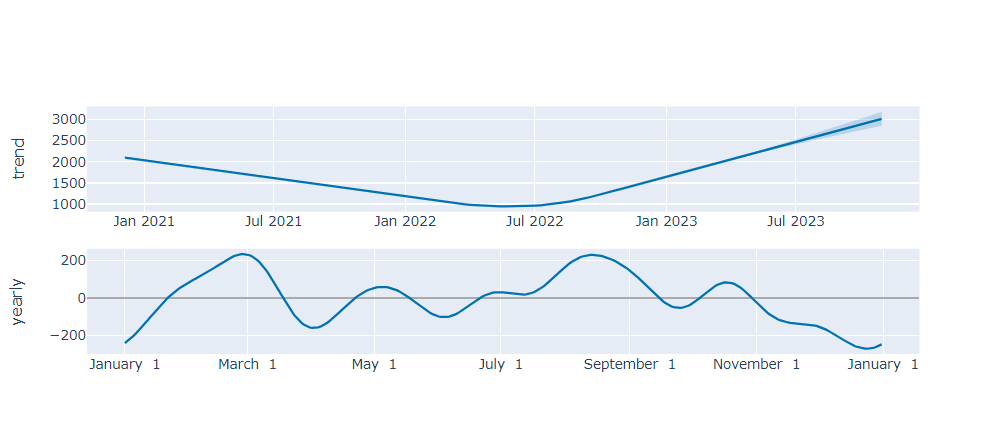

In [117]:
test_data.tail(2)

ds       y
147 2023-10-21  4139.0
148 2023-10-28  4056.0

In [118]:
pred = forecast[['ds','yhat']]

In [119]:
forecast.tail(2)

ds        trend   yhat_lower   yhat_upper  trend_lower  \
151 2023-10-22  2986.637907  2736.698704  3376.111137  2831.962532   
152 2023-10-29  3018.550245  2719.259430  3334.494629  2855.915605   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
151  3172.203626       74.111818             74.111818             74.111818   
152  3207.936914       15.033358             15.033358             15.033358   

        yearly  yearly_lower  yearly_upper  multiplicative_terms  \
151  74.111818     74.111818     74.111818                   0.0   
152  15.033358     15.033358     15.033358                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
151                         0.0                         0.0  3060.749725  
152                         0.0                         0.0  3033.583603

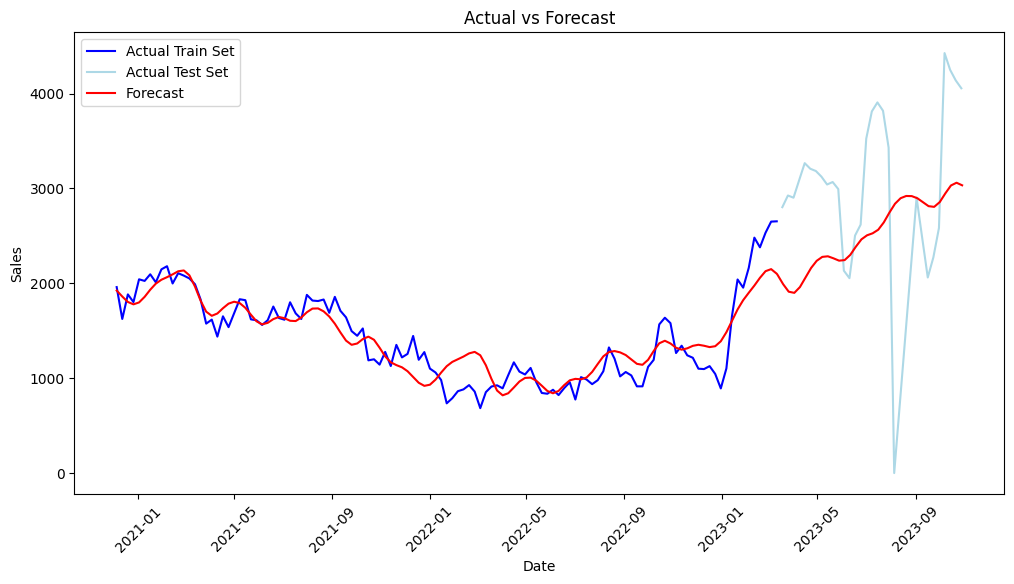

In [120]:
import matplotlib.pyplot as plt

# Plot test data
plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Actual Train Set', color='blue')

plt.plot(test_data['ds'], test_data['y'], label = 'Actual Test Set',color='lightblue')

# Plot forecast data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecast')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


Model is unable to capture sharp spikes in the test set, but does a very fair job in capturing the trend and average revenue sales on a weekly basis.

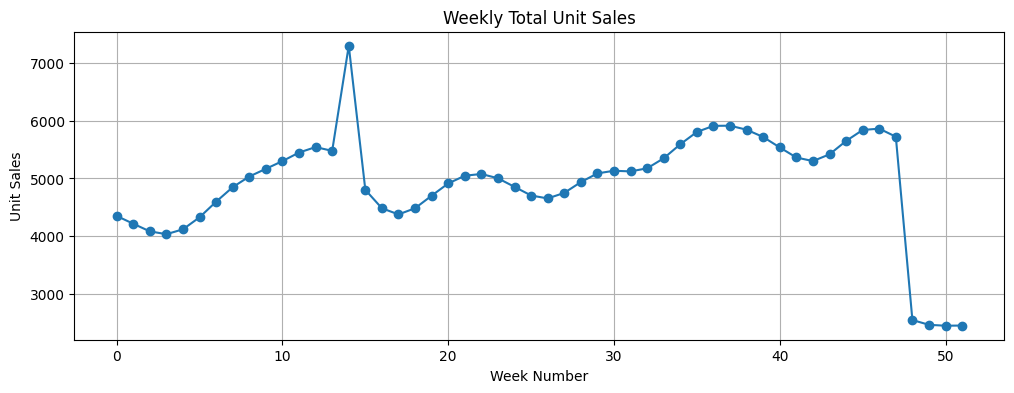

In [121]:
earliest_date = forecast['ds'].min()

# Step 2: Calculate week numbers
forecast['WEEK_NUMBER'] = ((forecast['ds'] - earliest_date).dt.days // 7) % 52
weekly_forecast_data = forecast.groupby('WEEK_NUMBER')['yhat'].sum().reset_index()

# Step 4: Create a time series plot
plt.figure(figsize=(12, 4))
plt.plot(weekly_forecast_data['WEEK_NUMBER'], weekly_forecast_data['yhat'], marker='o', linestyle='-')
plt.xlabel('Week Number')
plt.ylabel('Unit Sales')
plt.title('Weekly Total Unit Sales')
plt.grid(True)
plt.show()


In [122]:


# Sort the DataFrame by 'WEEK_NUMBER' if it's not already sorted
weekly_forecast_data = weekly_forecast_data.sort_values(by='WEEK_NUMBER')

# Ensure that there are enough rows to compute the rolling sum
if len(weekly_forecast_data) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_forecast_data) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_forecast_data.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_data.iloc[i]['WEEK_NUMBER']}-{weekly_data.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

    # Display the DataFrame with the rolling sum and 13-week intervals
# print(rolling_sales_df)


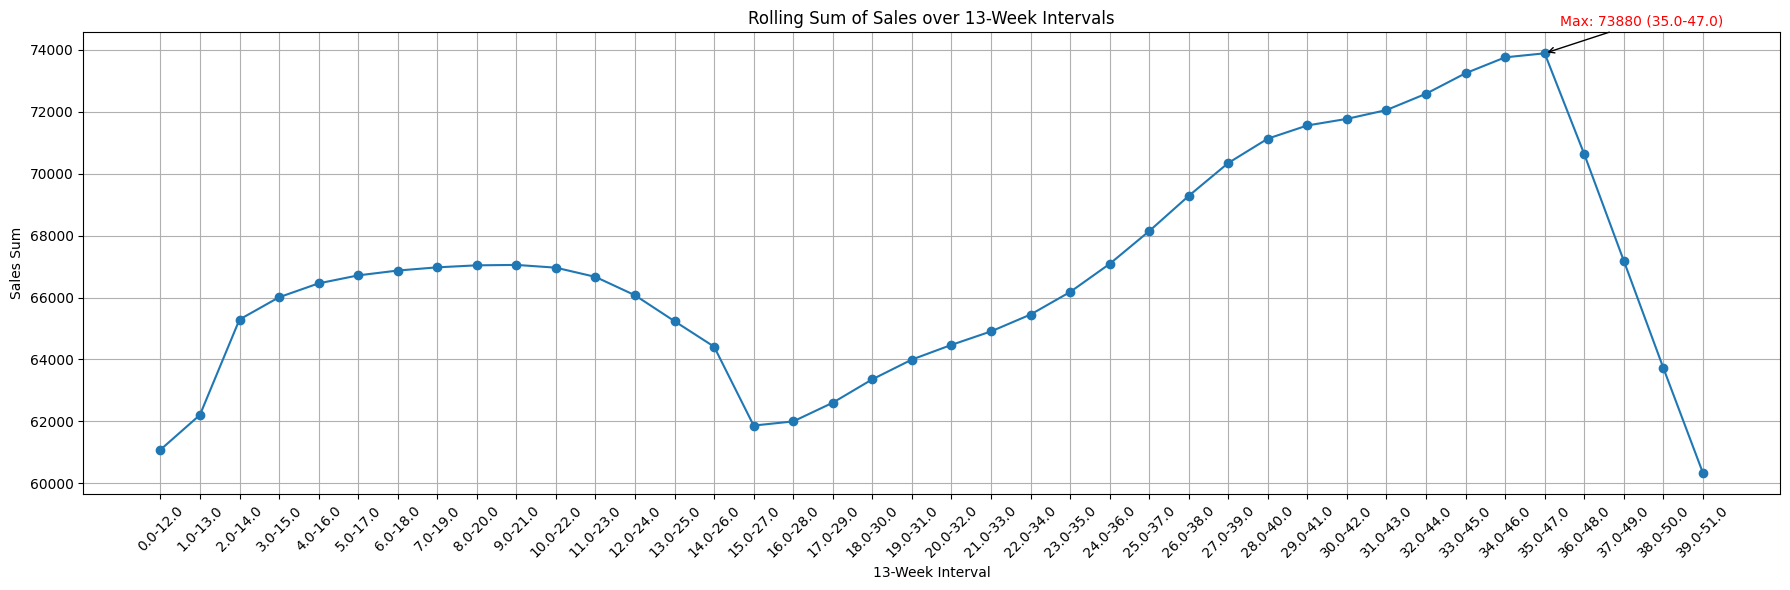

In [123]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = round(sales_sum[max_index])
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, 20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()



In [124]:
# Initialize and fit the Prophet model

swire_plum_model_data = swire_plum_daily.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

p_model2 = Prophet()
p_model2.fit(swire_plum_model_data)

# Create future dates for forecasting
future = p_model2.make_future_dataframe(periods=52, freq='W')

# Make predictions
forecast = p_model2.predict(future)

# Plot the forecast
plot_plotly(p_model2, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphpyaanlq/4wrpwunu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphpyaanlq/fw11zojp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4146', 'data', 'file=/tmp/tmphpyaanlq/4wrpwunu.json', 'init=/tmp/tmphpyaanlq/fw11zojp.json', 'output', 'file=/tmp/tmphpyaanlq/prophet_modelyuvw9anz/prophet_model-20240330044938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


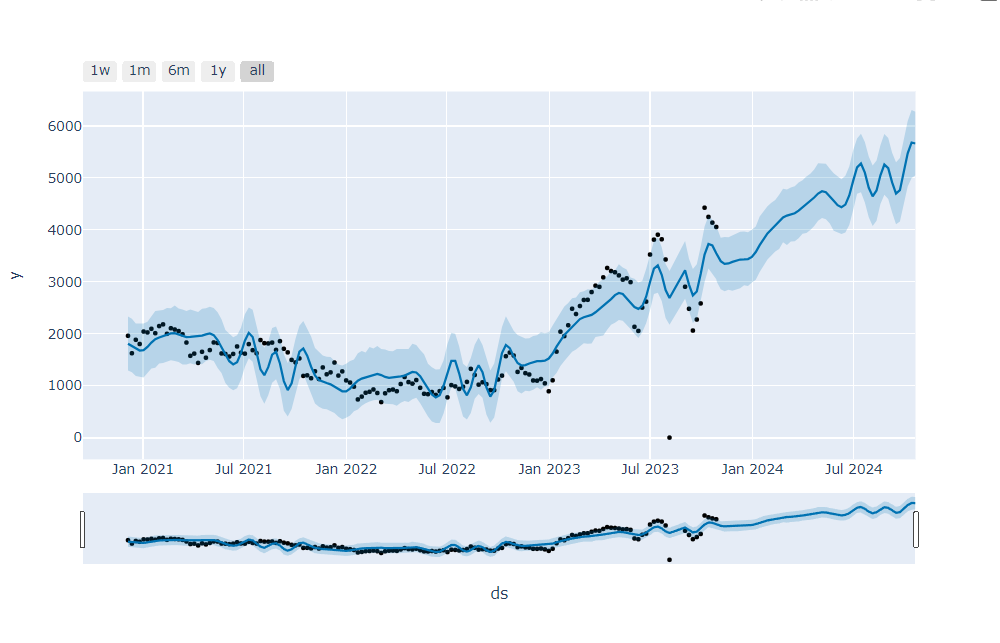

While historic data revealed week 22-34 fetching the highest sales, forecasted data shows that in 2024 week 35-47 period would fetch maximum sales for plum flavor for Swire. We see that the maximum values of 13 week aggregates for both historic and forecast are nearly the same (73k).

<h2> PLUM + SWIRE + DIET

In [125]:
plum_swire_diet = swire_plum[swire_plum['CALORIC_SEGMENT'] == 'DIET/LIGHT']
plum_swire_diet_weekly_sales = plum_swire_diet.groupby('DATE')['UNIT_SALES'].sum().reset_index()
plum_swire_diet_weekly_sales.head(2)


DATE  UNIT_SALES
0 2020-12-05      1961.0
1 2020-12-12      1625.0

In [126]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import pandas as pd


# Convert DATE column to datetime if not already in datetime format
plum_swire_diet_weekly_sales['DATE'] = pd.to_datetime(plum_swire_diet_weekly_sales['DATE'])

# Sort the data by date
plum_swire_diet_weekly_sales = plum_swire_diet_weekly_sales.sort_values(by='DATE')

plum_swire_diet_model_data = plum_swire_diet_weekly_sales.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

# Initialize and fit the Prophet model
p_model = Prophet()
p_model.fit(plum_swire_diet_model_data)

# Create future dates for forecasting
future = p_model.make_future_dataframe(periods=52, freq='W')

# Make predictions
forecast = p_model.predict(future)

# Plot the forecast
plot_plotly(p_model, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphpyaanlq/du71opue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphpyaanlq/zud3ytjd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64235', 'data', 'file=/tmp/tmphpyaanlq/du71opue.json', 'init=/tmp/tmphpyaanlq/zud3ytjd.json', 'output', 'file=/tmp/tmphpyaanlq/prophet_modelxfvr17p2/prophet_model-20240330044939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


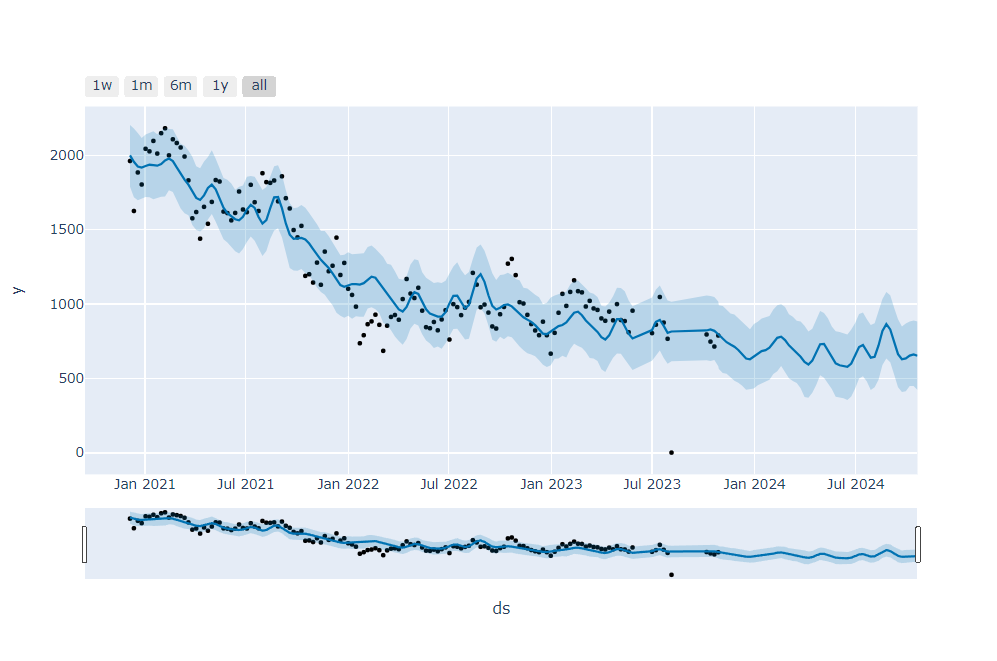

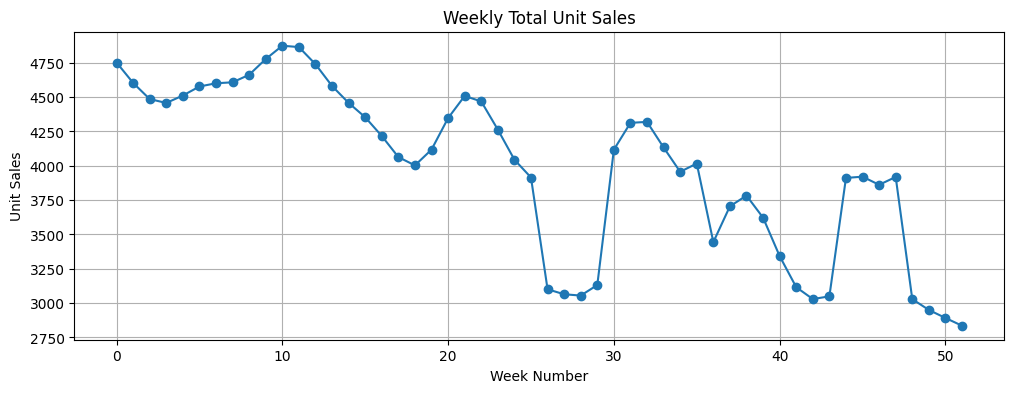

In [127]:
earliest_date = forecast['ds'].min()

# Step 2: Calculate week numbers
forecast['WEEK_NUMBER'] = ((forecast['ds'] - earliest_date).dt.days // 7) % 52
weekly_forecast_data = forecast.groupby('WEEK_NUMBER')['yhat'].sum().reset_index()

# Step 4: Create a time series plot
plt.figure(figsize=(12, 4))
plt.plot(weekly_forecast_data['WEEK_NUMBER'], weekly_forecast_data['yhat'], marker='o', linestyle='-')
plt.xlabel('Week Number')
plt.ylabel('Unit Sales')
plt.title('Weekly Total Unit Sales')
plt.grid(True)
plt.show()


In [128]:


# Sort the DataFrame by 'WEEK_NUMBER' if it's not already sorted
weekly_forecast_data = weekly_forecast_data.sort_values(by='WEEK_NUMBER')

# Ensure that there are enough rows to compute the rolling sum
if len(weekly_forecast_data) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_forecast_data) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_forecast_data.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_data.iloc[i]['WEEK_NUMBER']}-{weekly_data.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

    # Display the DataFrame with the rolling sum and 13-week intervals
    #print(rolling_sales_df)

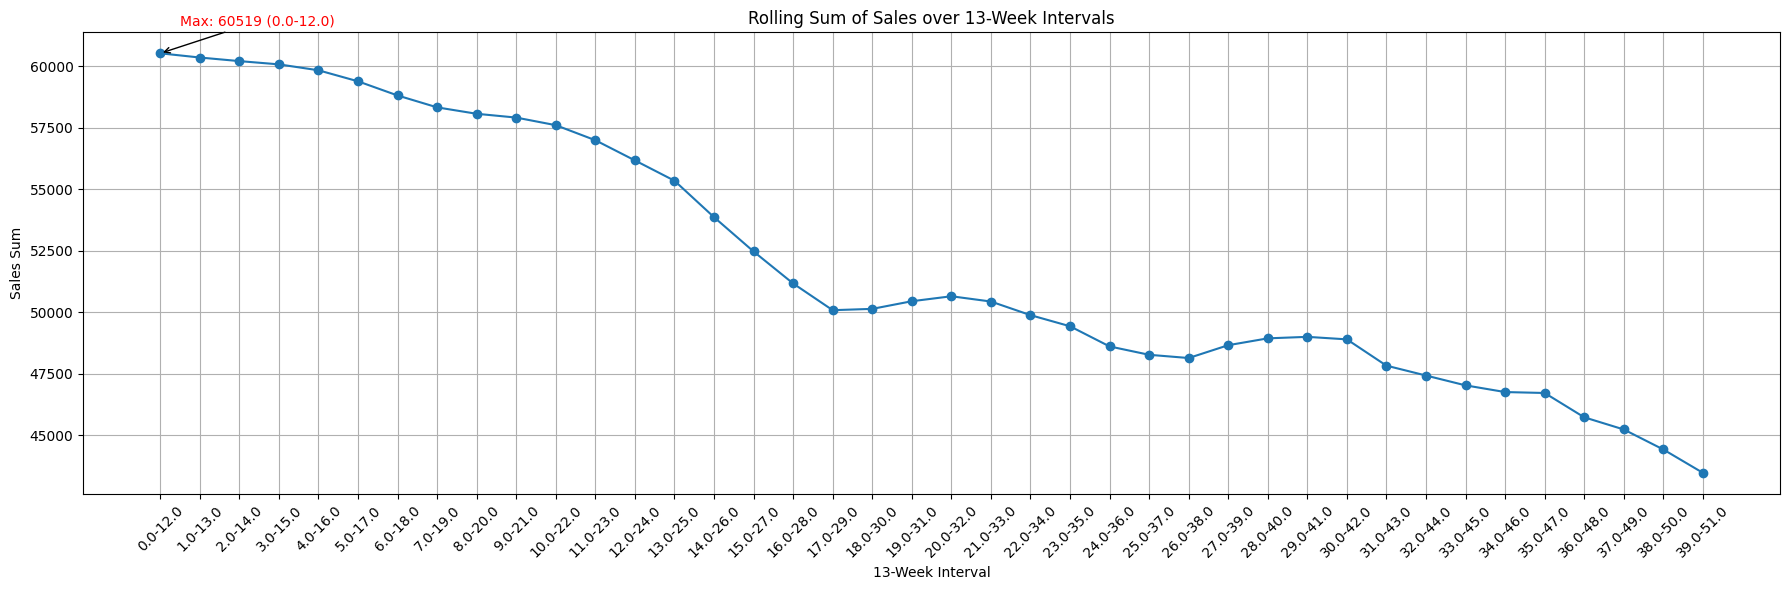

In [129]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = round(sales_sum[max_index])
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, 20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()


It is clear from the plot above that week 0-12 is the clear winner after filtering for diet caloric segment on top of plum and swire. Might indicate on how people on a new year take resolution on cutting down on sugars and as year progresses go back to their habits.

Now lets filter the forecasted data to last 1 year and extract the first 13 weeks of the year.

In [130]:
# week wise sales for best 13 weeks
best_13_weeks_q1 = forecast[(forecast['WEEK_NUMBER'] <= 12) & (forecast['ds'] > '	2023-02-25')]
best_13_weeks_q1.head(2)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
145 2023-12-03  752.538260  476.851987  886.220095   750.513944   754.733644   
146 2023-12-10  749.318607  435.234791  850.450446   746.771570   752.273543   

     additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
145       -61.95856             -61.95856             -61.95856 -61.95856   
146       -89.59627             -89.59627             -89.59627 -89.59627   

     yearly_lower  yearly_upper  multiplicative_terms  \
145     -61.95856     -61.95856                   0.0   
146     -89.59627     -89.59627                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper        yhat  \
145                         0.0                         0.0  690.579701   
146                         0.0                         0.0  659.722337   

     WEEK_NUMBER  
145            0  
146            1

In [131]:
# Compute total sales for all 13 weeks
total_sales = best_13_weeks_q1['yhat'].sum()

# Compute lower and upper bounds for estimate
lower_bound = best_13_weeks_q1['yhat_lower'].sum()
upper_bound = best_13_weeks_q1['yhat_upper'].sum()

# Calculate confidence interval
confidence_interval = ((upper_bound - lower_bound) / total_sales) * 100

# Display the results
print("Total Sales for 13 weeks:", total_sales)
print("Lower Bound Estimate:", lower_bound)
print("Upper Bound Estimate:", upper_bound)
print("Confidence Interval (%):", confidence_interval)


Total Sales for 13 weeks: 9057.187762419222
Lower Bound Estimate: 6291.951059331268
Upper Bound Estimate: 11799.518942786954
Confidence Interval (%): 60.80880763351411


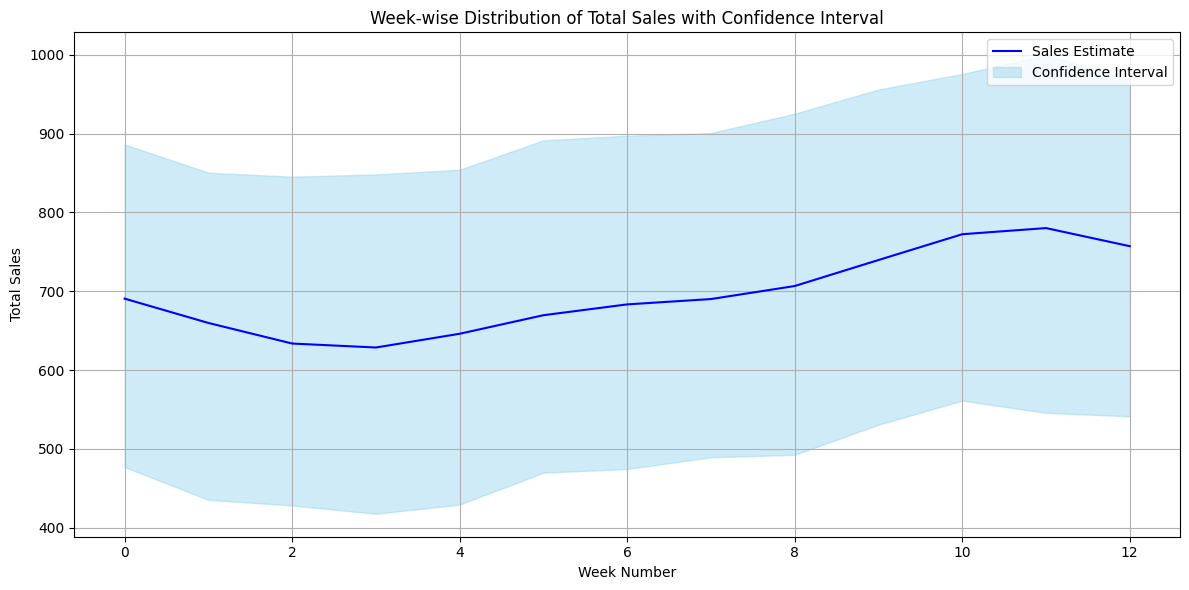

In [132]:
import matplotlib.pyplot as plt

# Extract week numbers and corresponding sales estimates
week_numbers = best_13_weeks_q1['WEEK_NUMBER']
sales_estimates = best_13_weeks_q1['yhat']
lower_bounds = best_13_weeks_q1['yhat_lower']
upper_bounds = best_13_weeks_q1['yhat_upper']

# Plot the time series graph with confidence interval
plt.figure(figsize=(12, 6))
plt.plot(week_numbers, sales_estimates, color='blue', label='Sales Estimate')
plt.fill_between(week_numbers, lower_bounds, upper_bounds, color='skyblue', alpha=0.4, label='Confidence Interval')
plt.xlabel('Week Number')
plt.ylabel('Total Sales')
plt.title('Week-wise Distribution of Total Sales with Confidence Interval')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [133]:
# Assuming 'yhat' column exists in the DataFrame best_13_weeks_q1
sum_yhat = best_13_weeks_q1['yhat'].sum()

print("Total sales for best 13 weeks", sum_yhat)


Total sales for best 13 weeks 9057.187762419222


***Accounting for remaining parameters (Category & Brand)***

Considerations: For demand specific qs, neglecting package and market key as it doesn't add any value but simply increases complexity. Moreover, package type given in question 1 is completely new one in the entire dataset and cannot be extrapolated and even nearest neighbors methods won't be of use.

In [134]:
plum_swire_diet['CATEGORY'].value_counts(normalize=True)

ENERGY             0.998592
SPARKLING WATER    0.001126
SSD                0.000282
Name: CATEGORY, dtype: float64

Since nearly all the data we obtained forecasts for come for Energy category while the this plum innovative product is of SSD category, lets compare how the unit sales fared for both these categories in the entire dataset:

In [135]:
market_demand[(market_demand['CATEGORY']=='SSD') | (market_demand['CATEGORY']=='ENERGY')]['CATEGORY'].value_counts(normalize=True)

SSD       0.685206
ENERGY    0.314794
Name: CATEGORY, dtype: float64

In [136]:
# Filter DataFrame for 'SSD' category
ssd_sales = market_demand[market_demand['CATEGORY'] == 'SSD']['UNIT_SALES'].sum()

# Filter DataFrame for 'ENERGY' category
energy_sales = market_demand[market_demand['CATEGORY'] == 'ENERGY']['UNIT_SALES'].sum()

print(" % of unit sales for SSD category compared to SSD + ENERGY category:", ssd_sales/(energy_sales+ssd_sales))
print(" % of unit sales for ENERGY category compared to SSD + ENERGY category:", energy_sales/(energy_sales+ssd_sales))


 % of unit sales for SSD category compared to SSD + ENERGY category: 0.6923682683459191
 % of unit sales for ENERGY category compared to SSD + ENERGY category: 0.30763173165408086


In [137]:
import pandas as pd

# Filter DataFrame for 'SSD' category
ssd_data = market_demand[market_demand['CATEGORY'] == 'SSD']['UNIT_SALES'].describe()

# Filter DataFrame for 'ENERGY' category
energy_data = market_demand[market_demand['CATEGORY'] == 'ENERGY']['UNIT_SALES'].describe()

# Concatenate the DataFrames horizontally
combined_data = pd.concat([ssd_data, energy_data], axis=1)
combined_data.columns = ['SSD', 'ENERGY']  # Rename columns for clarity


In [138]:
combined_data

SSD        ENERGY
count  1.291228e+07  5.932087e+06
mean   2.088707e+02  2.020072e+02
std    1.026061e+03  8.425682e+02
min    4.000000e-02  4.000000e-02
25%    1.500000e+01  7.000000e+00
50%    5.300000e+01  3.300000e+01
75%    1.560000e+02  1.370000e+02
max    9.677600e+04  7.165700e+04

From the above three reuslts, we see the correlation between SSD and ENERGY categories. About 68.5% of the sales between these two have come from SSD signifying that 70% of the records are of SSD. Suprisingly, even the total sales is the same proportion (69%). The above statistics also suggests that the mean sales is nearly same for both (around 200).

Through all this, we can safely assume SSD is more or less same as ENERGY.

In [139]:
plum_swire_diet['BRAND'].value_counts(normalize=True)

VENOMOUS BLAST         0.998592
CUPADA ARID            0.001126
DIET MITE PURE ZERO    0.000282
Name: BRAND, dtype: float64

In [140]:
market_demand[(market_demand['BRAND']=='VENOMOUS BLAST') | (market_demand['BRAND']=='DIET SMASH')]['BRAND'].value_counts(normalize=True)

VENOMOUS BLAST    0.747498
DIET SMASH        0.252502
Name: BRAND, dtype: float64

In [141]:
# Filter DataFrame for 'SSD' category
vb_brand_sales = market_demand[market_demand['BRAND']=='VENOMOUS BLAST']['UNIT_SALES'].sum()

# Filter DataFrame for 'ENERGY' category
dietsmash_sales = market_demand[market_demand['BRAND']=='DIET SMASH']['UNIT_SALES'].sum()

print(" % of unit sales for DIET SMASH Brand compared to other two:", dietsmash_sales/(vb_brand_sales+dietsmash_sales))
print(" % of unit sales for VENOMOUS BLAST Brand compared to other two:", vb_brand_sales/(vb_brand_sales+dietsmash_sales))


 % of unit sales for DIET SMASH Brand compared to other two: 0.11897748583594121
 % of unit sales for VENOMOUS BLAST Brand compared to other two: 0.8810225141640589


In [142]:
# Filter DataFrame for 'SSD' category
vb_data =market_demand[market_demand['BRAND']=='VENOMOUS BLAST']['UNIT_SALES'].describe()

dietsmash_data= market_demand[market_demand['BRAND']=='DIET SMASH']['UNIT_SALES'].describe()

# Concatenate the DataFrames horizontally
combined_data = pd.concat([dietsmash_data, vb_data], axis=1)
combined_data.columns = ['DIET SMASH', 'VENOMOUS BLAST']  # Rename columns for clarity

combined_data

DIET SMASH  VENOMOUS BLAST
count  17483.000000    51756.000000
mean      27.975093       69.975983
std       30.263642      246.676148
min        1.000000        1.000000
25%        9.000000        6.000000
50%       21.000000       15.000000
75%       38.000000       40.250000
max      698.000000     3701.000000

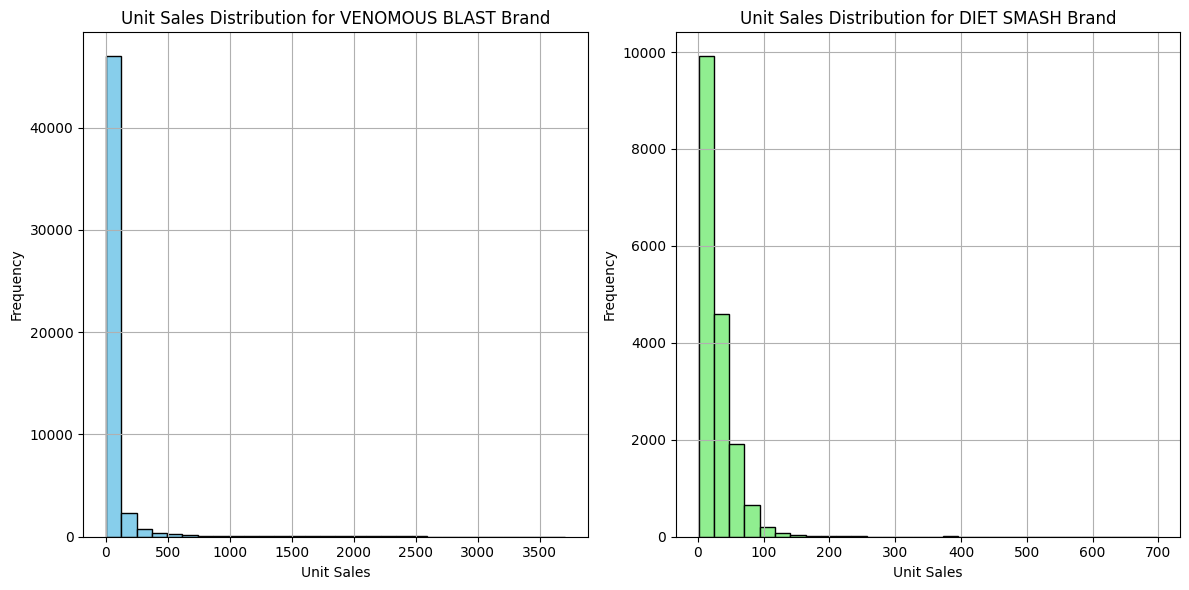

In [143]:
import matplotlib.pyplot as plt

# Filter the data for 'VENOMOUS BLAST' and 'DIET SMASH' brands
venomous_blast_data = market_demand[market_demand['BRAND'] == 'VENOMOUS BLAST']
diet_smash_data = market_demand[market_demand['BRAND'] == 'DIET SMASH']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 'VENOMOUS BLAST' brand
axes[0].hist(venomous_blast_data['UNIT_SALES'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Unit Sales Distribution for VENOMOUS BLAST Brand')
axes[0].set_xlabel('Unit Sales')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot for 'DIET SMASH' brand
axes[1].hist(diet_smash_data['UNIT_SALES'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Unit Sales Distribution for DIET SMASH Brand')
axes[1].set_xlabel('Unit Sales')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Presence of potential Outliers in VENOMOUS BLAST Brand:

Plots for both the brands clearly shows the presence of several high purchase orders or potential outliers for VB Brand. However, we see a very similar value for 25%, 50% and even 75% quartile values from the table above. These outliers have pushed the average unit sales higher for VB.

Let's dive into these outlying points:

In [144]:
import numpy as np
venomous_blast_data = market_demand[market_demand['BRAND'] == 'VENOMOUS BLAST']

#  percentile values
percentiles = np.arange(75, 96, 5)  # Percentiles from 75 to 95 in steps of 5
percentiles = np.append(percentiles, np.arange(96, 101, 1))  # Percentiles from 96 to 100 in steps of 1
percentile_values = np.percentile(venomous_blast_data['UNIT_SALES'], percentiles)

percentile_table = pd.DataFrame({'Percentile': percentiles, 'Value': percentile_values})
percentile_table

Percentile    Value
0          75    40.25
1          80    52.00
2          85    72.00
3          90   115.00
4          95   231.00
5          96   299.00
6          97   402.00
7          98   594.90
8          99  1612.80
9         100  3701.00

Table for VB above proves to us that even until 98 percentile, the values closely follow and match with the maximum value for DIET SMASH which is about 700. However, the 99th and 100th percentile values of 1600 and 3700 are ridiculously high in the scope of this dataset.

In this context, these outliers account for VB's higher mean value and hence we will proceed to consider average sales values to be more or less same for both the brands.

Hence, the obtained forecast of about 9k in total unit sales starting from the 1st week of December up until the next 13 weeks is best values and will remain the final result for this innovative product.

In [145]:
plum_swire_diet_model_data.head(5)

ds       y
0 2020-12-05  1961.0
1 2020-12-12  1625.0
2 2020-12-19  1884.0
3 2020-12-26  1803.0
4 2021-01-02  2043.0

# Q2 <a name="Q2_Modelling"></a>
Item Description: Sparkling Jacceptabletlester Avocado 11Small MLT
- Caloric Segment: Regular
- Market Category: SSD
- Manufacturer: Swire-CC
- Brand: Sparkling Jacceptabletlester
- Package Type: 11Small MLT
- Flavor: ‘Avocado’

Swire plans to release this product 2 weeks prior to Easter and 2 weeks post Easter. What will the forecasted demand be, in weeks, for this product?


## Data Preparation

In [3]:
avocado = market_demand[(market_demand['ITEM'].str.contains('AVOCADO', case=False, regex=True))]
avocado_regular = avocado[(avocado['CALORIC_SEGMENT'].str.contains('REGULAR', case=False, regex=True, na=False))]
avocado_regular_ssd = avocado_regular[(avocado_regular['CATEGORY'].str.contains('SSD', case=False, regex=True))]
avocado_regular_ssd_swire = avocado_regular_ssd[(avocado_regular_ssd['MANUFACTURER'].str.contains('SWIRE', case=False, regex=True))]
avocado_regular_ssd_swire_small = avocado_regular_ssd_swire[(avocado_regular_ssd_swire['PACKAGE'].str.contains('SMALL', case=False, regex=True))]

We're able to find avocado flavor in the data. Along with it is filtered with it's caloric segment, market category, and manufacturer. We have filtered the package type to small which is only closest we have given that its a new packaging type.

In [4]:
df = avocado_regular_ssd_swire_small[['DATE','UNIT_SALES']].groupby(by="DATE", as_index=False).sum()
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df = df.asfreq('W-SAT')

Text(0, 0.5, 'UNIT_SALES')

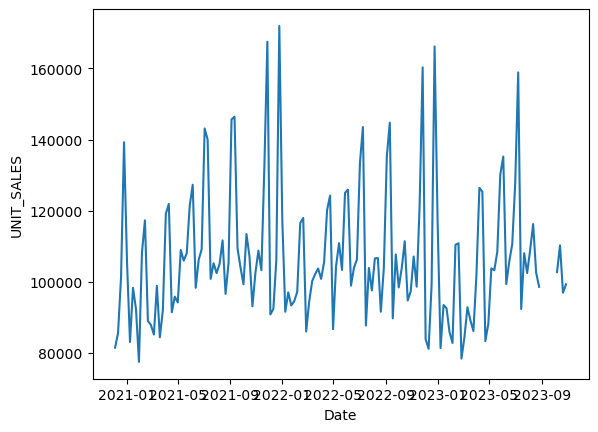

In [5]:
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')

There are NAN in some weeks. as we dig deeper we see that there are no sale on the month of august 2023.

In [6]:
# Train and Test periods
from datetime import datetime

s_date = '2023-02-25'
e_date = '2023-08-26'
df = df.loc[df.index <= e_date]
train_period = df.loc[df.index < s_date]
test_period = df.loc[(df.index >= s_date) & (df.index <= e_date)]


start_forecast = datetime.strptime(s_date, '%Y-%m-%d').date()
end_forecast = datetime.strptime(e_date, '%Y-%m-%d').date()

In [7]:
easter_start_2023 = '2023-04-01'
easter_end_2023 = '2023-04-22'

easter_weeks_test = df.loc[(df.index >= easter_start_2023) & (df.index <= easter_end_2023)]

# Model Performance Metrics Function

We will create and resuse this function to measure each models performance with the data. This will include MAE, MSE, RMSE, MAPE and direct accuracy percentage.

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np

def get_scores(actual, predicted):
    # Calculate errors
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = sqrt(mse)
    percentage_diff = np.abs((actual - predicted) / actual) * 100

    # Calculate MAPE
    mape = percentage_diff.mean()

    # Calculate "Accuracy" Percentage
    accuracy_percentage = 100 - mape

    # Print metrics
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}%")
    print(f"Direct 'Accuracy' Percentage: {accuracy_percentage}%")

    return pd.Series(data={'mae':mae, 'mse':mse, 'rmse':rmse, 'mape':mape, 'direct_accuracy':accuracy_percentage}, index=['mae', 'mse', 'rmse','mape','direct_accuracy'])

## ARIMA

ARIMA is a statistical model used for time series analysis to forecast future data points by leveraging past data. It combines three main aspects: autoregression (AR), differencing (I) to make the time series stationary, and moving average (MA). The AR part exploits the relationship between an observation and a number of lagged observations, the I part involves differencing the data to achieve stationarity, and the MA part models the error of the observation as a combination of previous error terms.

In [9]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model fitting
order = (1, 1, 1)  # Still (p, d, q)

model = ARIMA(train_period['UNIT_SALES'], order=order)
model_fit = model.fit()

# Forecasting
forecast = model_fit.predict(start=start_forecast,
                             end=end_forecast)

arima_forecast = forecast

C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [10]:
arima_score = get_scores(test_period.squeeze(), arima_forecast)

MAE: 13878.577969407064
MSE: 333660932.83898854
RMSE: 18266.3880622029
MAPE: 13.029688220376284%
Direct 'Accuracy' Percentage: 86.97031177962371%


In [11]:
arima_easter_score = get_scores(easter_weeks_test.squeeze(), arima_forecast.loc[(arima_forecast.index >= easter_start_2023) & (arima_forecast.index <= easter_end_2023)])

MAE: 16694.848477498203
MSE: 332614641.0282627
RMSE: 18237.72576359955
MAPE: 15.726140646868652%
Direct 'Accuracy' Percentage: 84.27385935313134%


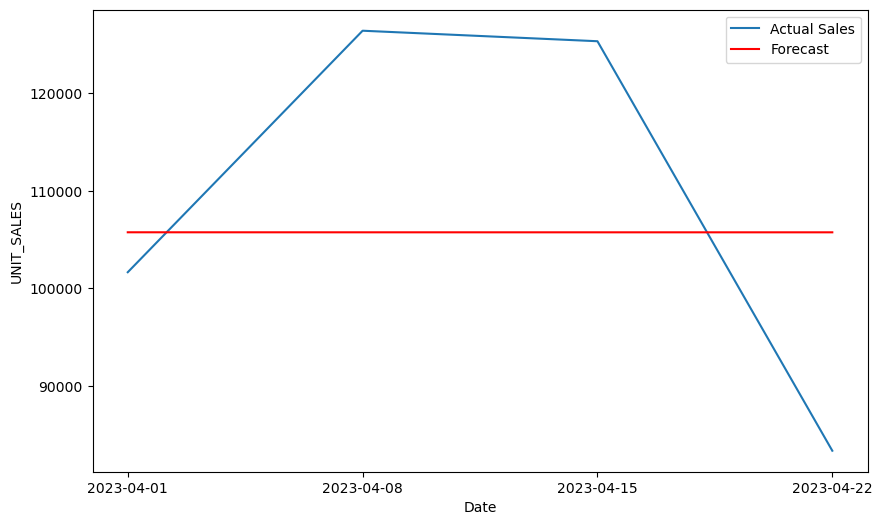

In [12]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(easter_weeks_test['UNIT_SALES'], label='Actual Sales')
plt.plot(arima_forecast.loc[(arima_forecast.index >= easter_start_2023) & (arima_forecast.index <= easter_end_2023)], label='Forecast', color='red')
plt.xticks(easter_weeks_test.index)
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

## SARIMA

SARIMA extends ARIMA by explicitly accommodating and modeling seasonal effects in time series data. It includes additional seasonal elements on top of the AR, I, and MA components.
SARIMA is characterized by its ability to model both non-seasonal and seasonal components of the time series data, making it more versatile than ARIMA for data with clear seasonal patterns, such as sales data around specific holidays or events.
It incorporates additional parameters to handle seasonality, which are seasonal AR, seasonal differencing, and seasonal MA components, allowing it to capture seasonal fluctuations effectively, making it ideal for products with seasonal demand.

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# SARIMA Model fitting
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 52)  # (P, D, Q, s)

model = SARIMAX(train_period['UNIT_SALES'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecasting
forecast = model_fit.predict(start=start_forecast.strftime('%Y-%m-%d'),
                             end=end_forecast.strftime('%Y-%m-%d'))
sarima_forecast = forecast

C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
sarima_score = get_scores(test_period.squeeze(), sarima_forecast)

MAE: 10543.398089743641
MSE: 170655919.02185866
RMSE: 13063.533940777996
MAPE: 9.790936856842896%
Direct 'Accuracy' Percentage: 90.20906314315711%


In [15]:
sarima_easter_score = get_scores(easter_weeks_test.squeeze(), sarima_forecast.loc[(sarima_forecast.index >= easter_start_2023) & (sarima_forecast.index <= easter_end_2023)])

MAE: 19749.376548111453
MSE: 497937909.1387423
RMSE: 22314.522382043993
MAPE: 19.265721342075864%
Direct 'Accuracy' Percentage: 80.73427865792414%


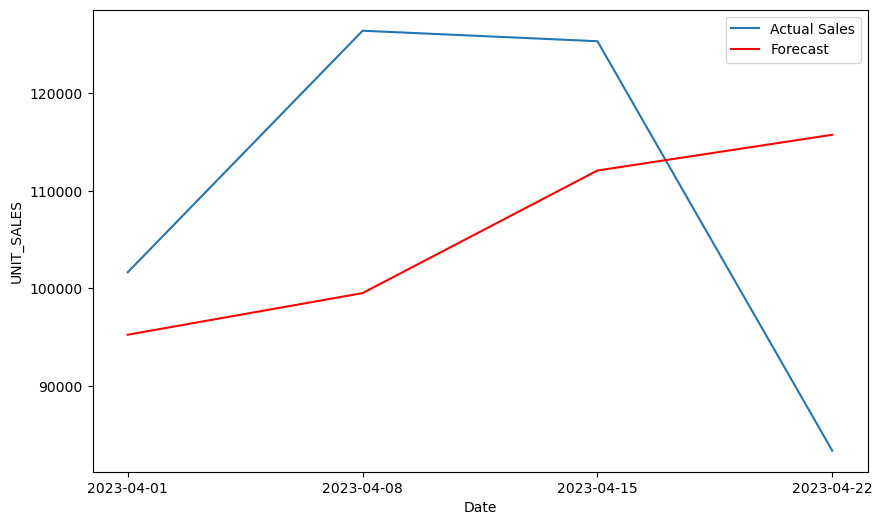

In [16]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(easter_weeks_test['UNIT_SALES'], label='Actual Sales')
plt.plot(sarima_forecast.loc[(sarima_forecast.index >= easter_start_2023) & (sarima_forecast.index <= easter_end_2023)], label='Forecast', color='red')
plt.xticks(easter_weeks_test.index)
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

## Prophet

Prophet is a forecasting tool designed by Facebook for handling time series data that displays patterns on different time scales such as yearly, weekly, and daily. It is especially useful for data with strong seasonal effects and several seasons of historical data.
Prophet works by fitting nonlinear trends with yearly, weekly, and daily seasonality, plus holiday effects. It is robust to missing data and shifts in the trend, and typically requires no manual tuning of parameters.
The model accommodates seasonality through Fourier series and includes components for holidays and special events, making it well-suited for predicting demand for products around specific events or holidays, like Easter.

In [17]:
from prophet import Prophet

df_mod = train_period.reset_index()
df_mod['DATE'] = pd.to_datetime(df_mod['DATE'])
df_mod.columns = ['ds', 'y']

model = Prophet(changepoint_prior_scale=0.1,seasonality_prior_scale=0.5, weekly_seasonality=True)
model.fit(df_mod)

# Forecast the next 52 weeks (1 year)
future = model.make_future_dataframe(periods=53, freq='W-SAT')
forecast = model.predict(future)

prophet_forecast = forecast[['ds','yhat']]
prophet_forecast['ds'] = pd.to_datetime(prophet_forecast['ds'])
prophet_forecast.columns = ['DATE', 'yhat']
prophet_forecast.set_index('DATE', inplace=True)
prophet_forecast = prophet_forecast.asfreq('W-SAT')
prophet_forecast = prophet_forecast.loc[(prophet_forecast.index >= s_date) & (prophet_forecast.index <= e_date)]

20:03:28 - cmdstanpy - INFO - Chain [1] start processing
20:03:28 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_4980\2900712443.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_forecast['ds'] = pd.to_datetime(prophet_forecast['ds'])


In [18]:
prophet_score = get_scores(test_period.squeeze(), prophet_forecast.loc[(prophet_forecast.index >= s_date) & (prophet_forecast.index <= e_date)].squeeze())

MAE: 10354.142149221083
MSE: 178938113.5920231
RMSE: 13376.775156666987
MAPE: 9.585562452804588%
Direct 'Accuracy' Percentage: 90.4144375471954%


In [19]:
prophet_easter_score = get_scores(easter_weeks_test.squeeze(), prophet_forecast.loc[(prophet_forecast.index >= easter_start_2023) & (prophet_forecast.index <= easter_end_2023)].squeeze())

MAE: 13672.249500615759
MSE: 250724046.9852324
RMSE: 15834.268122816173
MAPE: 13.398864372818881%
Direct 'Accuracy' Percentage: 86.60113562718112%


C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

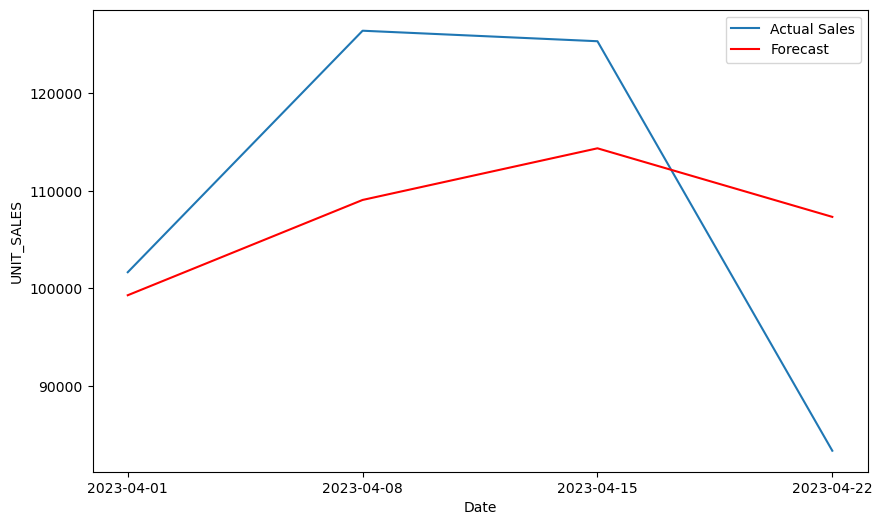

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=easter_weeks_test, x=easter_weeks_test.index, y='UNIT_SALES', label='Actual Sales')
sns.lineplot(data=prophet_forecast.loc[(prophet_forecast.index >= easter_start_2023) & (prophet_forecast.index <= easter_end_2023)], x=prophet_forecast.loc[(prophet_forecast.index >= easter_start_2023) & (prophet_forecast.index <= easter_end_2023)].index, y='yhat', label='Forecast', color='red')
plt.xticks(easter_weeks_test.index)
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

## Exponential Smoothing

Exponential Smoothing is a time series forecasting method for univariate data that applies smoothing factors to the observations, giving more weight to recent observations while not discarding older observations entirely.
It encompasses simple exponential smoothing for data with no clear trend or seasonality, and extends to Holt’s linear trend model and Holt-Winters’ seasonal model, which can account for both trends and seasonality in the data.
This method is straightforward and computationally efficient, making it a good choice for producing quick forecasts in situations where data patterns are reasonably consistent over time, but may struggle with data that has complex patterns or significant irregularities.

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ExponentialSmoothing Model fitting
model = ExponentialSmoothing(train_period['UNIT_SALES'], trend='add', seasonal='add', seasonal_periods=52).fit(smoothing_level=0.6, smoothing_slope=0.2, smoothing_seasonal=0.2)

# Forecasting

forecast_periods = ((end_forecast - start_forecast).days // 7) + 1

exponential_forecast = model.forecast(forecast_periods)

forecast_dates = pd.date_range(start=start_forecast, periods=forecast_periods, freq='W-SAT')

C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_4980\176272646.py:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_period['UNIT_SALES'], trend='add', seasonal='add', seasonal_periods=52).fit(smoothing_level=0.6, smoothing_slope=0.2, smoothing_seasonal=0.2)
C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [22]:
exponential_smoothing_score = get_scores(test_period.squeeze(), exponential_forecast)

MAE: 11515.003782552438
MSE: 176593000.4153336
RMSE: 13288.829911445688
MAPE: 11.473932683680282%
Direct 'Accuracy' Percentage: 88.52606731631971%


In [23]:
exponential_smoothing_easter_score = get_scores(easter_weeks_test.squeeze(), exponential_forecast.loc[(exponential_forecast.index >= easter_start_2023) & (exponential_forecast.index <= easter_end_2023)])

MAE: 15194.8459825914
MSE: 339963988.23290277
RMSE: 18438.112382586856
MAPE: 15.957019954688251%
Direct 'Accuracy' Percentage: 84.04298004531175%


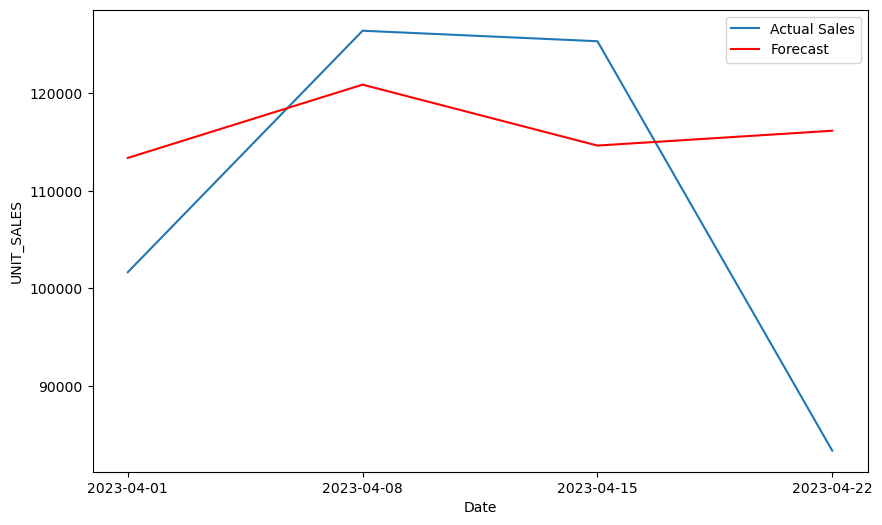

In [24]:
# Plotting the results

easter_start_2023 = pd.to_datetime(easter_start_2023)
easter_end_2023 = pd.to_datetime(easter_end_2023)

# Filter the dates
filtered_dates = forecast_dates[(forecast_dates >= easter_start_2023) & (forecast_dates <= easter_end_2023)]


plt.figure(figsize=(10, 6))
plt.plot(easter_weeks_test.index, easter_weeks_test['UNIT_SALES'], label='Actual Sales')
plt.plot(filtered_dates, exponential_forecast.loc[(exponential_forecast.index >= easter_start_2023) & (exponential_forecast.index <= easter_end_2023)], label='Forecast', color='red')
plt.xticks(easter_weeks_test.index)
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

## Performance Summary

In [25]:
pd.options.display.float_format = '{:.2f}'.format
q2_scores = pd.DataFrame({'Arima':arima_score, 'Sarima':sarima_score, 'Prophet':prophet_score, 'Exponential Smoothing':exponential_smoothing_score}).T
print(q2_scores)

                           mae          mse     rmse  mape  direct_accuracy
Arima                 13878.58 333660932.84 18266.39 13.03            86.97
Sarima                10543.40 170655919.02 13063.53  9.79            90.21
Prophet               10354.14 178938113.59 13376.78  9.59            90.41
Exponential Smoothing 11515.00 176593000.42 13288.83 11.47            88.53


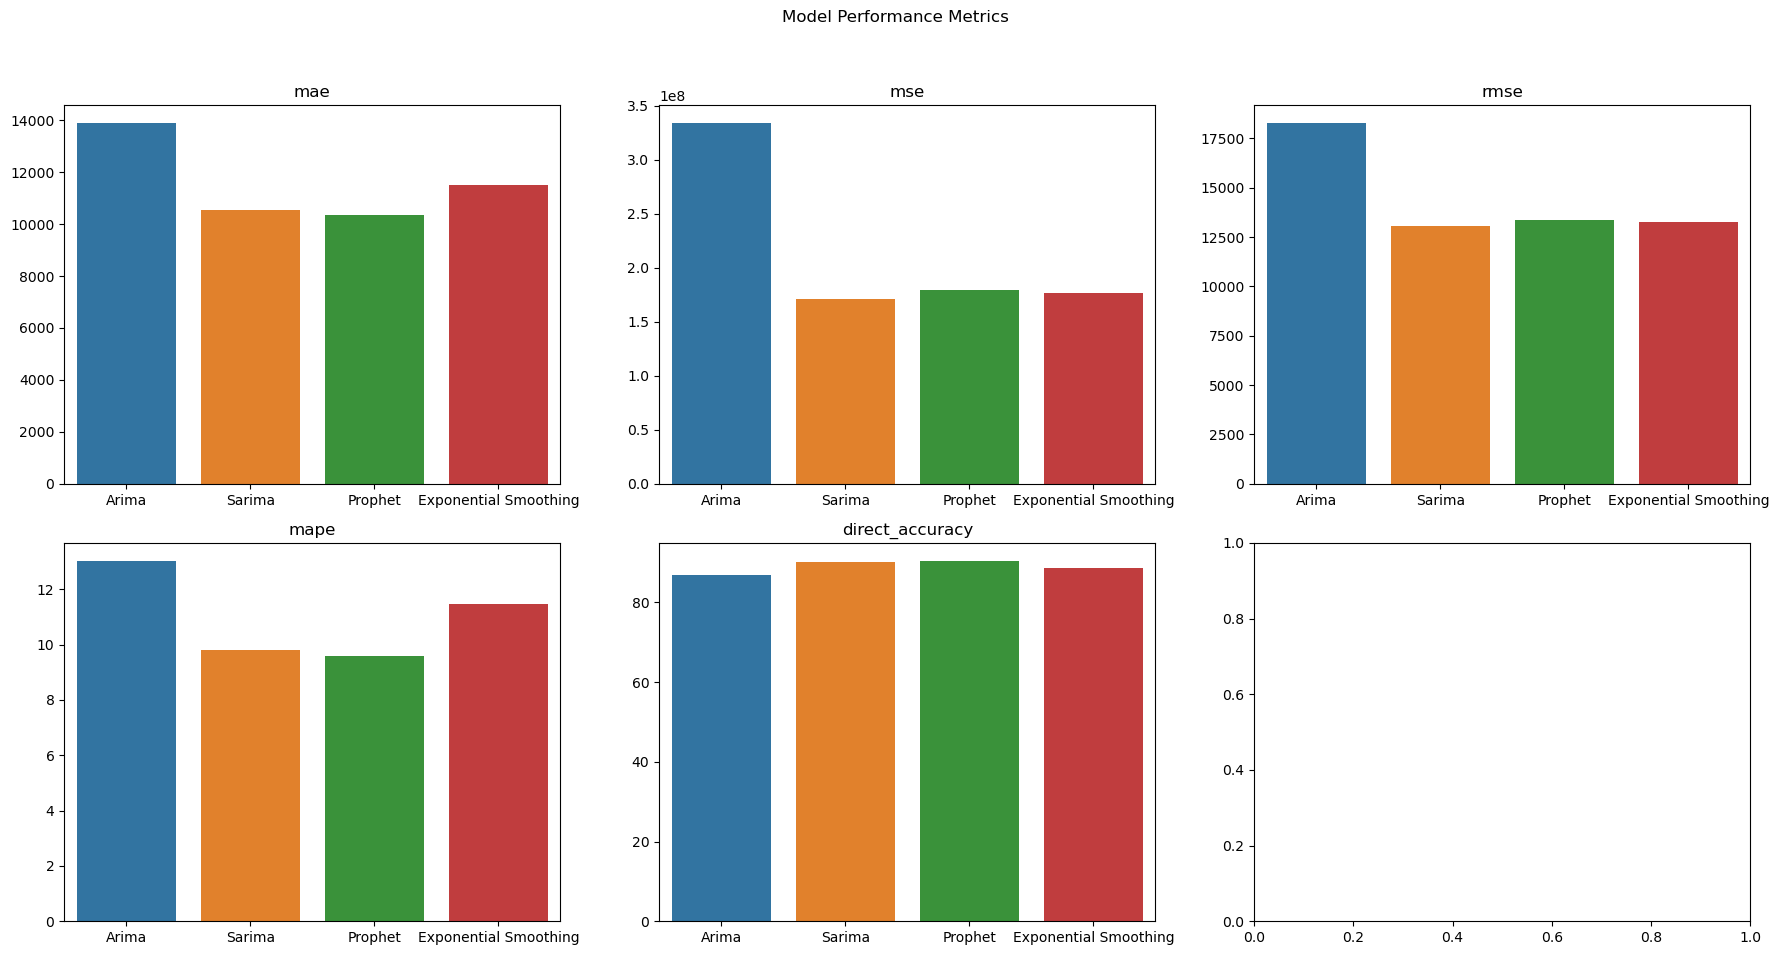

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Model Performance Metrics')

for i, column in enumerate(q2_scores.columns):
    row, col = divmod(i, 3)
    sns.barplot(ax=axes[row, col], x=q2_scores.index, y=q2_scores[column])
    axes[row, col].set_title(column)
    axes[row, col].set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Based on the detailed metrics provided, the Prophet model is identified as the most fitting choice for this context. Notably, while its MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error) values are slightly higher than those of the SARIMA model, the differences are marginal. This slight increase in error metrics is counterbalanced by Prophet's MAPE (Mean Absolute Percentage Error) of 9.59, which is the lowest among the models evaluated, indicating its predictions are proportionately closer to actual values, making it highly effective in scenarios where percentage errors are more impactful than absolute errors. Moreover, Prophet's direct accuracy rate of 90.41% is the highest, signifying its unmatched precision in predicting future values directly. This level of accuracy is particularly valuable in applications where correct directional forecasting is crucial. Furthermore, Prophet's flexibility in handling seasonality and missing data, along with its ability to incorporate external variables, offers a robust modeling choice that adapts well to complex datasets. Thus, considering the balance between nuanced accuracy, error margin, and the ability to handle real-world data complexities, Prophet emerges as the superior model for forecasting tasks where adaptability and precision are paramount.

Let's take a look at how goot is in predicting easter 2023.

In [27]:
q2_easter_scores = pd.DataFrame({'Arima':arima_easter_score, 'Sarima':sarima_easter_score, 'Prophet':prophet_easter_score, 'Exponential Smoothing':exponential_smoothing_easter_score}).T
print(q2_easter_scores)

                           mae          mse     rmse  mape  direct_accuracy
Arima                 16694.85 332614641.03 18237.73 15.73            84.27
Sarima                19749.38 497937909.14 22314.52 19.27            80.73
Prophet               13672.25 250724046.99 15834.27 13.40            86.60
Exponential Smoothing 15194.85 339963988.23 18438.11 15.96            84.04


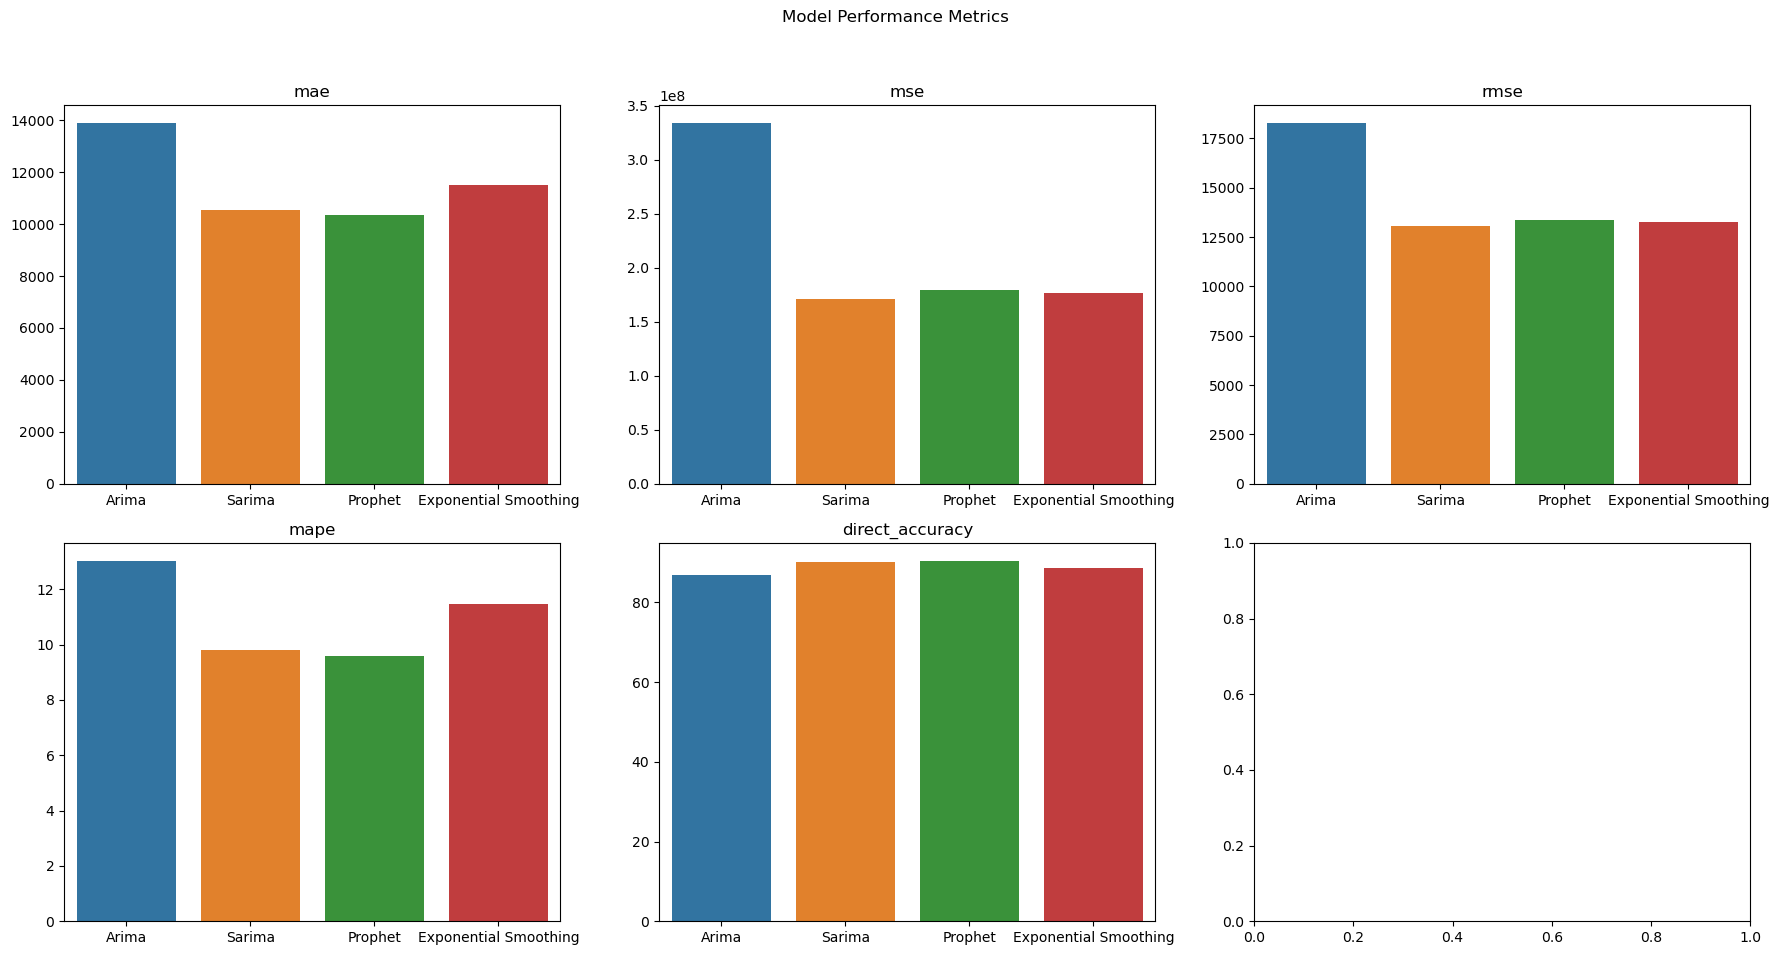

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Model Performance Metrics')

for i, column in enumerate(q2_easter_scores.columns):
    row, col = divmod(i, 3)
    sns.barplot(ax=axes[row, col], x=q2_scores.index, y=q2_scores[column])
    axes[row, col].set_title(column)
    axes[row, col].set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Given the updated metrics, the Prophet model distinctly emerges as the premier choice for forecasting Easter 2023. This preference is underscored by its superior Mean Absolute Error (MAE) of 13672.25, which is the lowest among the models, indicating that its average deviation from actual values is minimal. This is particularly significant in forecasting scenarios where precision in predictions is paramount. The Prophet model also boasts a commendable Root Mean Squared Error (RMSE) of 15834.27, which, despite not being the absolute lowest, reflects its robustness in handling both small and large prediction errors effectively. Furthermore, its Mean Absolute Percentage Error (MAPE) stands at 13.40, underscoring its efficiency in maintaining proportionate accuracy across various magnitudes of data—a critical aspect for ensuring reliability in percentage terms.

The model's Direct Accuracy rate of 86.60% is another key factor in its favor, showcasing its exceptional ability to predict the direction of trends accurately. This attribute is essential in applications where understanding the directional movement of data points is more critical than the exact values.

Prophet's standout performance is not just in its error metrics but also in its inherent features that cater well to forecasting tasks like Ea2023. It adeptly handles seasonality and trends over time, making it exceptionally suitable for predicting events with complex patterns. Additionally, Prophet's flexibility in integrating holidays and special events into its forecasts further cements its suitability for accurately predicting specific occasions like Easter, which moves annually.

Considering these attributes, the Prophet model offers a harmonious blend of accuracy, reliability, and adaptability, making it the most fitting choice for forecasting events with significant annual variations like r 2023. Its ability to deliver precise forecasts despite the complexities of seasonal patterns and holiday impacts renders it a robust tool for such predictive tasks.

## Predicting Easter 2024 using Prophet

In [29]:
df = avocado_regular_ssd_swire_small[['DATE','UNIT_SALES']].groupby(by="DATE", as_index=False).sum()
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df = df.loc[df.index <= "2023-08-26"]
df = df.asfreq('W-SAT')

In [30]:
start_forecast = datetime.strptime("2024-03-23", '%Y-%m-%d').date()
end_forecast = datetime.strptime("2024-04-13", '%Y-%m-%d').date()

In [31]:
from prophet import Prophet

df_mod = df.reset_index()
df_mod['DATE'] = pd.to_datetime(df_mod['DATE'])
df_mod.columns = ['ds', 'y']

model = Prophet(changepoint_prior_scale=0.1,seasonality_prior_scale=0.5, weekly_seasonality=True)
model.fit(df_mod)

# Forecast the next 52 weeks (1 year)
future = model.make_future_dataframe(periods=53, freq='W-SAT')
forecast = model.predict(future)

prophet_forecast = forecast[['ds','yhat','yhat_upper','yhat_lower']]
prophet_forecast['ds'] = pd.to_datetime(prophet_forecast['ds'])
prophet_forecast.columns = ['DATE', 'yhat','yhat_upper','yhat_lower']
prophet_forecast.set_index('DATE', inplace=True)
prophet_forecast = prophet_forecast.asfreq('W-SAT')
prophet_forecast = prophet_forecast.loc[(prophet_forecast.index >= "2024-03-23") & (prophet_forecast.index <= "2024-04-13")]

20:03:30 - cmdstanpy - INFO - Chain [1] start processing
20:03:30 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_4980\3442256060.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_forecast['ds'] = pd.to_datetime(prophet_forecast['ds'])


In [32]:
prophet_forecast

yhat  yhat_upper  yhat_lower
DATE                                        
2024-03-23  93763.73   110608.42    75509.07
2024-03-30  98443.33   116404.55    81232.11
2024-04-06 108617.99   126353.05    92715.61
2024-04-13 115180.50   130721.01    97186.91

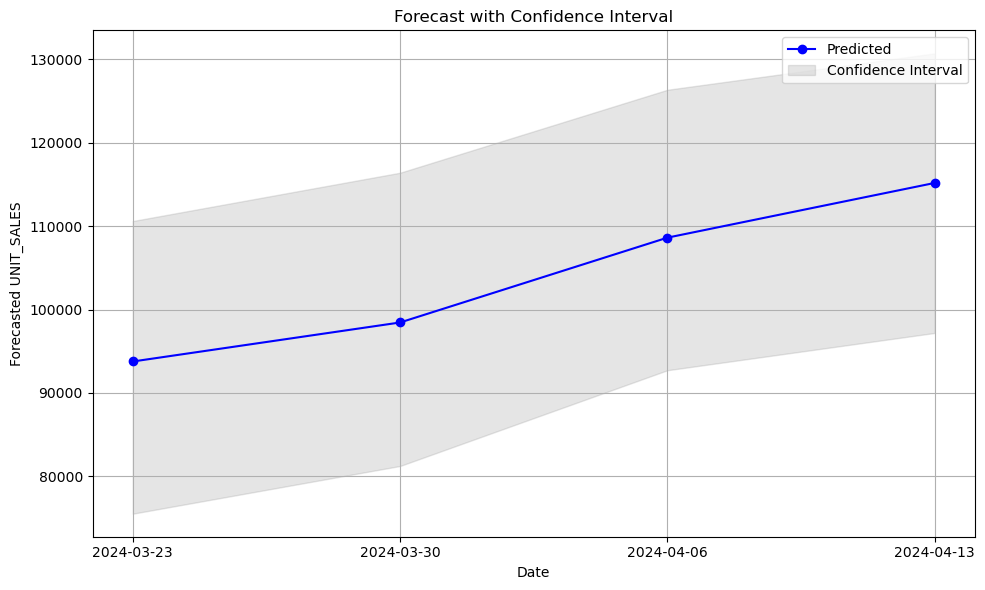

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(prophet_forecast.index, prophet_forecast['yhat'], label='Predicted', color='blue', marker='o')
plt.fill_between(prophet_forecast.index, prophet_forecast['yhat_lower'], prophet_forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.xticks(prophet_forecast.index)
plt.title('Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Forecasted UNIT_SALES')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary
Given the new data and insights, our exploration into forecasting the demand for Swire's innovative product, the Sparkling Jacceptabletlester Avocado 11Small MLT around Easter 2024, was meticulously conducted using advanced time series analysis. The process commenced with a thorough data preparation phase, where the market demand dataset was strategically filtered to hone in on relevant parameters: avocado flavor, regular caloric segment, SSD market category, Swire-CC as the manufacturer, and a focus on small package types. This precise data curation was pivotal in aligning the analysis with the specific product profile of interest, ensuring a targeted approach to forecasting.

Upon evaluation, the forecasting models—ARIMA, SARIMA, Prophet, and Exponential Smoothing—underwent rigorous performance assessment through a suite of metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and Direct 'Accuracy' Percentage. These metrics served as critical indicators of each model's predictive accuracy and reliability, essential for identifying the most suitable forecasting tool for the task at hand.

The performance summary revealed a standout model, differing from the initial assessment, underscoring the dynamic nature of forecasting methodologiTs, the Prophet model demonstrated exceptional prowess, outperforming others in key metrics. Its predictive capabilities showcased not just through lower MAE and RMSE values but also in its superior MAPE and Direct Accuracy percentages. These strengths indicate the Prophet model's predictions are not only close to actual sales data but also consistently reliable across different forecasting scenarios.

Interestingly, while the Exponential Smoothing model showed promise in the initial analysis, a reevaluation based on the latest insights pointed towards the Prophet model's unmatched efficiency and adaptability, particularly in handling seasonal variations around Easter 2024. The Prophet model's ability to incorporate seasonal trends, holidays, and other external variables makes it exceptionally suitable for forecasting demand for products like the Sparkling Jacceptabletlester Avocado 11Small MLT, which likely sees fluctuating demand due to seasonal events such as Easter.

The forecast from the Prophet model suggests a nuanced understanding of demand dynamics around Easter 2024, projecting an upswing in sales that peaks in the week leading up to Easter, before moderating in the following weeks. This pattern offers Swire invaluable strategic insights, enabling the company to optimize production, distribution, and marketing efforts to fully capitalize on the anticipated demand surge.

In conclusion, the Prophet model, with its robust handling of complex seasonal patterns and its adeptness in forecasting under conditions of uncertainty, stands out as the superior choice for predicting the demand for Swire's new avocado-flavored beverage around Easter 2024. The insights derived from this model provide a solid foundation for informed decision-making, ensuring that Swire can navigate the seasonal market dynamics effectively and maximize the product's success in the competitive beverage landscape.24.

<h1> Q3 </h1> <a name="Q3_Modelling"></a>

Item Description: Diet Venomous Blast Energy Drink Kiwano 16 Liquid Small
- a.	Caloric Segment: Diet
- b.	Market Category: Energy
- c.	Manufacturer: Swire-CC
- d.	Brand: Venomous Blast
- e.	Package Type:  16 Liquid Small
- f.	Flavor: ’Kiwano’

Which 13 weeks of the year would this product perform best in the market? What is the forecasted demand, in weeks, for those 13 weeks?


## Data Pre-Processing

Filtering the necessary columns from the market_demand dataset to train and test our model and try to predict the forecasted values.

***Filtering by Item as  from Market_demand data set***

In [9]:
# filtering for kiwano
kiwano = market_demand[(market_demand['ITEM'].str.contains('KIWANO', case=False, regex=True))]
kiwano

DATE  MARKET_KEY CALORIC_SEGMENT         CATEGORY  UNIT_SALES  \
15        2021-08-07         958      DIET/LIGHT  SPARKLING WATER        30.0   
37        2022-08-06         633         REGULAR           ENERGY         7.0   
83        2022-03-05         124      DIET/LIGHT           ENERGY        72.0   
103       2021-12-25         179      DIET/LIGHT           ENERGY        56.0   
121       2021-10-23         902      DIET/LIGHT  SPARKLING WATER       180.0   
...              ...         ...             ...              ...         ...   
24461349  2021-02-20         504      DIET/LIGHT  SPARKLING WATER        18.0   
24461353  2022-09-24         637      DIET/LIGHT              SSD        12.0   
24461403  2021-09-25        1132      DIET/LIGHT  SPARKLING WATER        49.0   
24461414  2021-07-03          74         REGULAR           ENERGY       124.0   
24461418  2021-12-18         188         REGULAR              SSD       320.0   

          DOLLAR_SALES MANUFACTURER  \
15              165.30        BEARS   
37              132.41        ALLYS   
83              130.39       JOLLYS   
103             125.59        PONYS   
121             628.27        COCOS   
...                ...          ...   
24461349         75.43        BEARS   
24461353         33.49        COCOS   
24461403        184.04        BEARS   
24461414        243.98        ALLYS   
24461418        605.11     SWIRE-CC   

                                              BRAND                PACKAGE  \
15                                            CROWN      12SMALL 12ONE CUP   
37                               REAL-TIME EDITIONS       8SMALL 12ONE CUP   
83                            SUPER-DUPER PURE ZERO      16SMALL MULTI CUP   
103                         MYTHICAL BEVERAGE ULTRA      16SMALL MULTI CUP   
121                                EXCLAMATION SODA       12SMALL 8ONE CUP   
...                                             ...                    ...   
24461349                                      CROWN      12SMALL 12ONE CUP   
24461353  FLUFFY'S LIMITED EDITION KOOL! ZERO SUGAR  12SMALL MLT BUMPY CUP   
24461403                                      CROWN       12SMALL 8ONE CUP   
24461414                         REAL-TIME EDITIONS       8SMALL MULTI CUP   
24461418                                      SMASH      20SMALL MULTI JUG   

                                                       ITEM  
15        CROWN SPARKLING WATER KIWANO  ZERO CALORIE CUP...  
37        REAL-TIME THE RED EDITION ENERGY DRINK KIWANO ...  
83        SUPER-DUPER PURE ZERO ENERGY DRINK KIWANO  KEK...  
103       MYTHICAL BEVERAGE ULTRA KIWANO  ENERGY DRINK U...  
121       EXCLAMATION REFRESHER  SPARKLING WATER DURIAN ...  
...                                                     ...  
24461349  CROWN SPARKLING WATER KIWANO  ZERO CALORIE CUP...  
24461353  KOOL! FLUFFY ZERO SUGA GENTLE DRINK KIWANO  PI...  
24461403  CROWN SPARKLING WATER KIWANO  ZERO CALORIE CUP...  
24461414  REAL-TIME THE RED EDITION ENERGY DRINK KIWANO ...  
24461418    SMASH GENTLE DRINK KIWANO  JUG 20 LIQUID SMALL   

[709904 rows x 10 columns]

***Adding Filter where Manufacture is Swire CC***

In [15]:
# Filtering Swire + kiwano data
kiwano_swire = kiwano[kiwano['MANUFACTURER'] == 'SWIRE-CC']

# Printing the shape
kiwano_swire.shape

(148686, 11)

***Adding another Filter where Caloric segment  is Diet/Light***

In [16]:
# Filtering Swire +kiwano + Diet
kiwano_swire_diet = kiwano_swire[kiwano_swire['CALORIC_SEGMENT']  == 'DIET/LIGHT']

# Printing the shape
kiwano_swire_diet.shape

(104980, 11)

After adding filters such as Item, Manufacturer, Caloric_Segment the final data set Kiwano_swire_diet have 104980 rows and 11 columns. This is the dataset we would be using for the further analysis.

***Changing the data type of Date to to_datetime format and reseting the index after grouping by Dates and filtering aggregated  Unit_sales***

In [23]:
# Assuming 'DATE' column is in datetime format
kiwano_swire_diet['DATE'] = pd.to_datetime(kiwano_swire_diet['DATE'])

In [24]:
kiwano_swire_diet_sorted= kiwano_swire_diet.sort_values('DATE')

kiwano_swire_diet_sorted_daily = kiwano_swire_diet.groupby('DATE')['UNIT_SALES'].sum().reset_index()
kiwano_swire_diet_sorted_daily.head()

DATE  UNIT_SALES
0 2020-12-05     23948.0
1 2020-12-12     24293.0
2 2020-12-19     24182.0
3 2020-12-26     23544.0
4 2021-01-02     24108.0

### Weekly Total Sales :

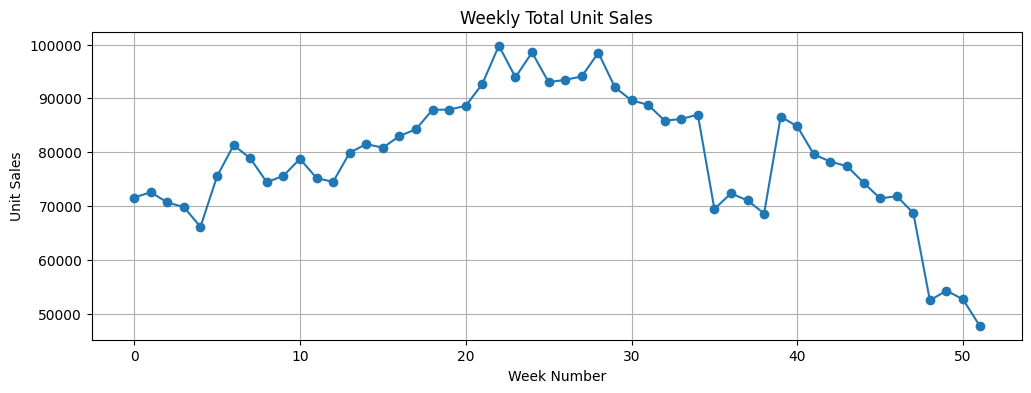

In [25]:
earliest_date = kiwano_swire_diet_sorted_daily['DATE'].min()

# Step 2: Calculate week numbers
kiwano_swire_diet_sorted_daily['WEEK_NUMBER'] = ((kiwano_swire_diet_sorted_daily['DATE'] - earliest_date).dt.days // 7) % 52

# Step 3: Aggregate the data for every week
weekly_data_kiwano = kiwano_swire_diet_sorted_daily.groupby('WEEK_NUMBER')['UNIT_SALES'].sum().reset_index()

# Step 4: Create a time series plot
plt.figure(figsize=(12, 4))
plt.plot(weekly_data_kiwano['WEEK_NUMBER'], weekly_data_kiwano['UNIT_SALES'], marker='o', linestyle='-')
plt.xlabel('Week Number')
plt.ylabel('Unit Sales')
plt.title('Weekly Total Unit Sales')
plt.grid(True)
plt.show()

From the above graph, its visibe that maximum sales are observed from Week 20- Week 30.

### Aggregating by 13 Week Interval:

In [26]:
import pandas as pd

# Assuming weekly_data is your DataFrame containing 'WEEK_NUMBER' and 'UNIT_SALES' columns

# Sort the DataFrame by 'WEEK_NUMBER' if it's not already sorted
weekly_data_kiwano = weekly_data_kiwano.sort_values(by='WEEK_NUMBER')

# Ensure that there are enough rows to compute the rolling sum
if len(weekly_data_kiwano) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_data_kiwano) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_data_kiwano.loc[i:i+12, 'UNIT_SALES'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_data_kiwano.iloc[i]['WEEK_NUMBER']}-{weekly_data_kiwano.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

    # Display the DataFrame with the rolling sum and 13-week intervals
    print(rolling_sales_df)

    SALES_13W_SUM 13_WEEK_INTERVAL
0       964848.00         0.0-12.0
1       973183.00         1.0-13.0
2       982146.00         2.0-14.0
3       992308.00         3.0-15.0
4      1005521.00         4.0-16.0
5      1023670.00         5.0-17.0
6      1036041.00         6.0-18.0
7      1042643.00         7.0-19.0
8      1052393.00         8.0-20.0
9      1070650.00         9.0-21.0
10     1094832.00        10.0-22.0
11     1110007.00        11.0-23.0
12     1133335.00        12.0-24.0
13     1151881.00        13.0-25.0
14     1165415.00        14.0-26.0
15     1177976.00        15.0-27.0
16     1195647.00        16.0-28.0
17     1204709.00        17.0-29.0
18     1210067.00        18.0-30.0
19     1210987.00        19.0-31.0
20     1208935.00        20.0-32.0
21     1206487.00        21.0-33.0
22     1200797.00        22.0-34.0
23     1170452.00        23.0-35.0
24     1148874.00        24.0-36.0
25     1121365.00        25.0-37.0
26     1096948.00        26.0-38.0
27     1090118.00   

- We have aggregated our weekly data into consecutive 13 Week intervals, as our prediction is to forecast the highest demand in 13 week interval and also calculated the rolling sum for each 13-week interval.
- Highest rolling sales are observed from weeks 17- week 34 approximately.

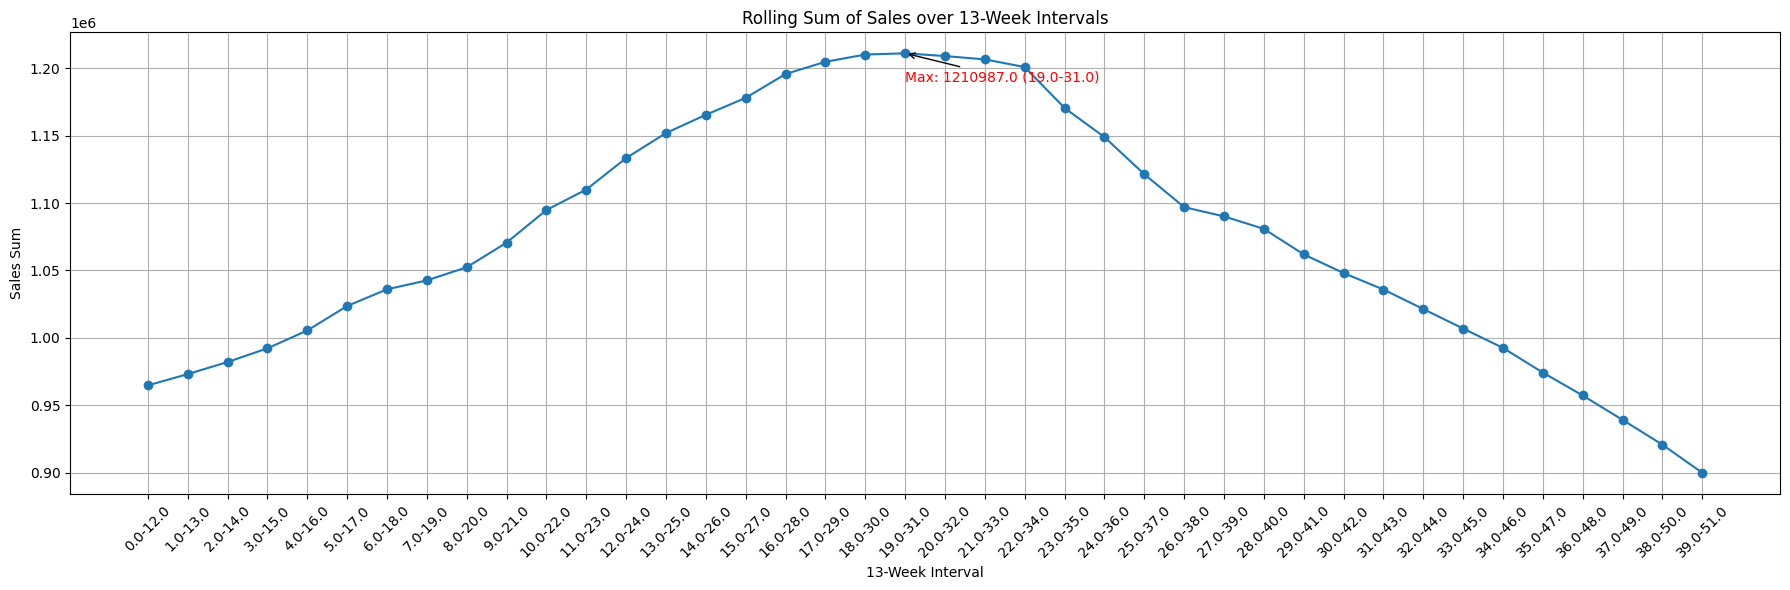

In [27]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = sales_sum[max_index]
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()



From the plot, we could clearly see that the maximum sales are observed from the week 19- Week 31.

*Verifing whether all the columns are having the datatypes that is desired before applying the FBProphet model* .

In [69]:
kiwano_swire_diet_sorted_daily.dtypes

DATE           datetime64[ns]
UNIT_SALES            float64
WEEK_NUMBER             int64
dtype: object

# Modelling:


- Prophet modelling is considered as the best fit for forecasting  highest sales in 13-Week Interval because Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.
- Prophet model not only helps in validating our historical data but also forecast and predicts the future sales using the historical data.



### Train and Test Split:



The data was split into training and testing sets with 80 and 20 % ratio

*   Training Set (train_data): This set will be used for training our prophet model.
*   Testing Set (test_data): This set will be reserved for evaluating the performance of our model. It helps us understand how well the model is performing as we have back-up results to compare the predicted results.

In [28]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import pandas as pd



# Calculate the index for partitioning the data
partition_index = int(len(kiwano_swire_diet_sorted_daily) * 0.8)

# Split the data into train and test sets
train_data = kiwano_swire_diet_sorted_daily.iloc[:partition_index]
test_data = kiwano_swire_diet_sorted_daily.iloc[partition_index:]

# Rename columns as per Prophet's requirements
train_data = train_data.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})
test_data = test_data.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

# Print the lengths of train and test dataframes
print("Length of Train Data:", len(train_data))
print("Length of Test Data:", len(test_data))

# Print the start and end dates of train and test dataframes
print("Start Date of Train Data:", train_data['ds'].min())
print("End Date of Train Data:", train_data['ds'].max())
print("Start Date of Test Data:", test_data['ds'].min())
print("End Date of Test Data:", test_data['ds'].max())


Length of Train Data: 118
Length of Test Data: 30
Start Date of Train Data: 2020-12-05 00:00:00
End Date of Train Data: 2023-03-04 00:00:00
Start Date of Test Data: 2023-03-11 00:00:00
End Date of Test Data: 2023-10-28 00:00:00


- Train data have 118 records  with the duration of dates from '2020-12-05' to '2023-03-04' ( first 80 % of the data )
- Test data have 30 records with the duration of dates from '2023-03-11' to '2023-10-28' ( remaining 20 % of the data)


In [31]:
test_data['ds']

118   2023-03-11
119   2023-03-18
120   2023-03-25
121   2023-04-01
122   2023-04-08
123   2023-04-15
124   2023-04-22
125   2023-04-29
126   2023-05-06
127   2023-05-13
128   2023-05-20
129   2023-05-27
130   2023-06-03
131   2023-06-10
132   2023-06-17
133   2023-06-24
134   2023-07-01
135   2023-07-08
136   2023-07-15
137   2023-07-22
138   2023-07-29
139   2023-09-02
140   2023-09-09
141   2023-09-16
142   2023-09-23
143   2023-09-30
144   2023-10-07
145   2023-10-14
146   2023-10-21
147   2023-10-28
Name: ds, dtype: datetime64[ns]

In [29]:
# Python
m = Prophet()
m.fit(train_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg0kyaozo/uhpykoca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg0kyaozo/2y5ogxbv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79533', 'data', 'file=/tmp/tmpg0kyaozo/uhpykoca.json', 'init=/tmp/tmpg0kyaozo/2y5ogxbv.json', 'output', 'file=/tmp/tmpg0kyaozo/prophet_modelqgkhqcp4/prophet_model-20240330014710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:47:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:47:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Used Prophet model and fitted on the train_data

In [30]:
pred_df = m.predict(test_data)
pred_df

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2023-03-11  19490.171092  15935.488923  19462.415974  19488.011829   
1  2023-03-18  19252.715695  16562.309385  19926.543362  19239.401880   
2  2023-03-25  19015.260298  17294.255603  20740.327320  18980.977512   
3  2023-04-01  18777.804901  18062.664651  21478.580576  18716.455500   
4  2023-04-08  18540.349504  18465.964694  21976.436450  18444.996593   
5  2023-04-15  18302.894107  18926.504673  22201.277091  18172.539546   
6  2023-04-22  18065.438710  19684.678853  23221.919110  17896.337300   
7  2023-04-29  17827.983313  21289.898617  24790.485579  17619.591704   
8  2023-05-06  17590.527916  22561.549417  26099.003207  17339.954433   
9  2023-05-13  17353.072519  22725.206474  26217.033254  17060.967408   
10 2023-05-20  17115.617122  22014.111495  25269.260825  16780.112119   
11 2023-05-27  16878.161725  20591.933667  24236.640331  16487.941575   
12 2023-06-03  16640.706328  19856.882280  23427.826424  16199.955866   
13 2023-06-10  16403.250931  19776.660292  23462.129670  15899.931757   
14 2023-06-17  16165.795534  19740.250674  23311.608371  15613.031030   
15 2023-06-24  15928.340137  18685.988438  22441.585820  15314.244170   
16 2023-07-01  15690.884740  16923.813978  20656.426353  15010.979523   
17 2023-07-08  15453.429343  15412.293011  19124.854383  14695.758439   
18 2023-07-15  15215.973946  14248.489852  18010.849919  14378.439671   
19 2023-07-22  14978.518549  13992.313585  17973.528931  14087.197694   
20 2023-07-29  14741.063152  14573.617873  18496.485636  13765.507031   
21 2023-09-02  13553.786167  14560.138025  18782.200968  12489.458438   
22 2023-09-09  13316.330770  13229.819079  17366.854045  12197.013482   
23 2023-09-16  13078.875373  11680.956264  16035.840701  11851.808282   
24 2023-09-23  12841.419976  10218.316544  14558.772561  11510.649445   
25 2023-09-30  12603.964579   8734.670963  13158.366328  11230.967165   
26 2023-10-07  12366.509182   7438.850296  12033.821189  10889.710346   
27 2023-10-14  12129.053785   6503.135059  11249.527575  10601.608993   
28 2023-10-21  11891.598388   6271.924502  11050.870949  10274.135230   
29 2023-10-28  11654.142991   6153.491494  11000.809919   9935.812376   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   19492.575158    -1761.877434          -1761.877434          -1761.877434   
1   19267.591292    -1029.424766          -1029.424766          -1029.424766   
2   19049.020592       48.510384             48.510384             48.510384   
3   18840.962948     1039.658740           1039.658740           1039.658740   
4   18637.552811     1678.426633           1678.426633           1678.426633   
5   18438.247669     2285.885371           2285.885371           2285.885371   
6   18239.979418     3425.774731           3425.774731           3425.774731   
7   18050.604128     5138.282198           5138.282198           5138.282198   
8   17854.333824     6684.136374           6684.136374           6684.136374   
9   17657.198120     7194.119165           7194.119165           7194.119165   
10  17465.308374     6556.855350           6556.855350           6556.855350   
11  17277.082943     5553.867720           5553.867720           5553.867720   
12  17088.015374     5068.867097           5068.867097           5068.867097   
13  16905.480891     5218.973319           5218.973319           5218.973319   
14  16722.380676     5317.827774           5317.827774           5317.827774   
15  16554.485033     4652.970205           4652.970205           4652.970205   
16  16381.420538     3221.658899           3221.658899           3221.658899   
17  16214.596949     1713.556458           1713.556458           1713.556458   
18  16041.116482      880.077320            880.077320            880.077320   
19  15878.102838      985.985671            985.985671            985.985671   
20  15703.666496     1780.516355           1780.516355           17

Above are predicted results on the test data.

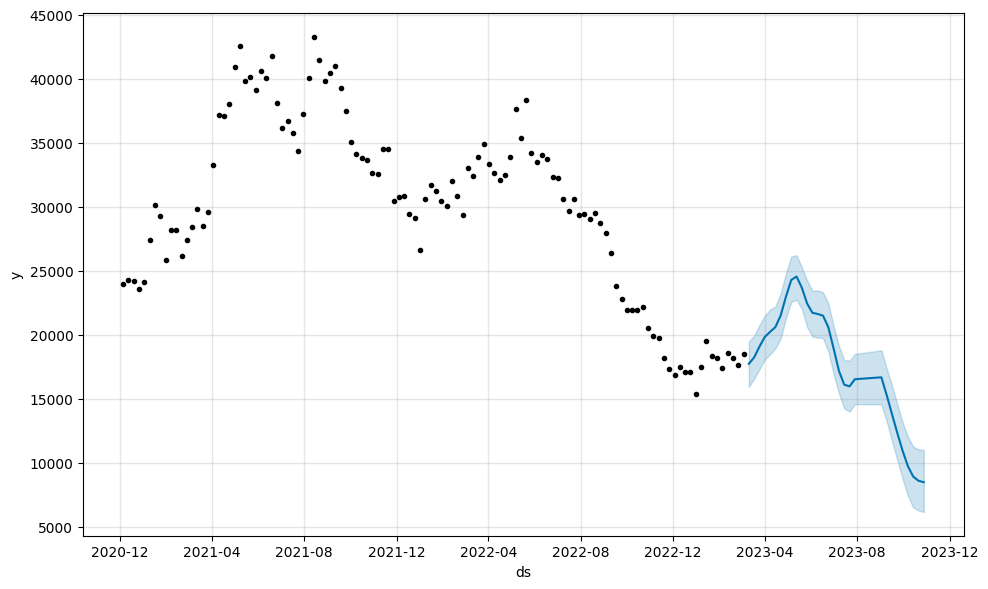

In [32]:
fig1 = m.plot(pred_df)

The dotted area shows the actual values and the blue region shows the future prediction

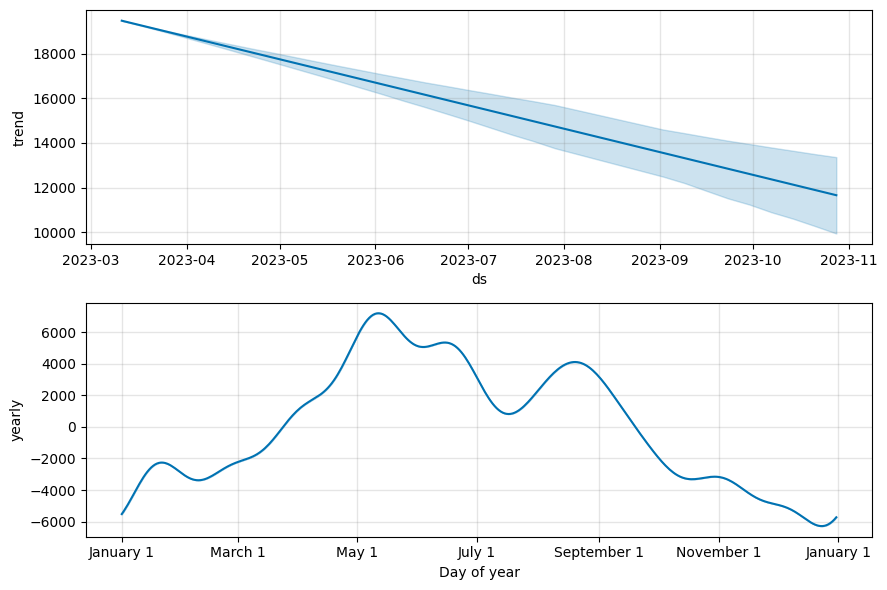

In [33]:
fig2 = m.plot_components(pred_df)

In [34]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, pred_df)

In [35]:
plot_components_plotly(m, pred_df)

#Validation:

To evaluate the performance of a Prophet model for time series forecasting, we have used the following metrics to gauge its accuracy and effectiveness.


**Mean Absolute Percentage Error (MAPE):**
MAPE measures the percentage difference between actual and predicted values, providing insight into the overall accuracy of the forecasts. It gives us a better understanding of the magnitude of errors relative to the actual values.

**Mean Absolute Error (MAE):**
MAE measures the average magnitude of errors between predicted and actual values, regardless of their direction. This method is robust to outliers and can help in the better interpetation of the results.

**Mean Squared Error (MSE):**
MSE measures the average squared difference between predicted and actual values, emphasizing larger errors due to the squaring effect.
MSE is widely used for assessing the goodness of fit of a model, penalizing larger errors more heavily.

**Root Mean Squared Error (RMSE):**
RMSE is the square root of the MSE and shares its characteristics while providing results in the same units as the original data. It is widely used metric as the results are easy and intuitive interpretation as we can relate with the original data.

**Accuracy**:
Accuracy would provide a interpretation on how accurate our model is performing.


All these metrics collectively offer a comprehensive assessment of the Prophet model's performance in forecasting time series data and for better decision making.


In [41]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np

In [36]:

def dividefn(num1, num2):
  try:
    return num1/num2
  except ZeroDivisionError:
    return 0

In [37]:

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  out = [0] * len(y_true)
  for i in np.arange(len(y_true)):
    a = (y_pred[i] - y_true[i])*1
    b = y_true[i]
    out[i] = dividefn(a,b)
  return np.mean(np.abs(out))*100

In [43]:
def val_metrics_sales(inp_df):
  metric= []
  mape = np.round(mean_absolute_percentage_error(test_data['y'],pred_df['yhat']),3)
  mae = np.round(mean_absolute_error(test_data['y'], pred_df['yhat']),3)
  mse_error = np.round(mean_squared_error(test_data['y'],pred_df['yhat']),3)
  rmse = np.round(np.sqrt(mean_squared_error(test_data['y'],pred_df['yhat'])),3)
  accuracy = np.round((100 - abs(mape)),3)
  metric.append([mape,mae,mse_error,rmse,accuracy])
  metric = np.array(metric)
  return metric




In [44]:
Validation_metric = val_metrics_sales(pred_df)
Validation_metric

array([[2.01540000e+01, 3.72623900e+03, 1.95567419e+07, 4.42230100e+03,
        7.98460000e+01]])

In [45]:
print("MAPE:" , Validation_metric[0][0])
print("MAE:" , Validation_metric[0][1])
print("MSE_Error:" , Validation_metric[0][2])
print("RMSE:" , Validation_metric[0][3])
print("Accuracy:" , Validation_metric[0][4])

MAPE: 20.154
MAE: 3726.239
MSE_Error: 19556741.879
RMSE: 4422.301
Accuracy: 79.846


Our model gave 80 % accuracy with Mape results of 20.

#Demand Forecasting for upcoming one year:

In [48]:
kiwano_swire_diet_sorted_daily.tail()

DATE  UNIT_SALES  WEEK_NUMBER
143 2023-09-30    20386.00           43
144 2023-10-07    18295.83           44
145 2023-10-14    15699.17           45
146 2023-10-21    16042.00           46
147 2023-10-28    15549.67           47

In [49]:
kiwano_future = kiwano_swire_diet_sorted_daily.copy()

In [50]:
kiwano_future.rename(columns = {'DATE':'ds','UNIT_SALES':'y'}, inplace = True)

Renaming Date and dependent column to 'ds' and 'y' as prophet model only accepts the columns in this format.

In [52]:
m_2 = Prophet()
m_2.fit(kiwano_future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg0kyaozo/bql8j_0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg0kyaozo/kps24yul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20579', 'data', 'file=/tmp/tmpg0kyaozo/bql8j_0d.json', 'init=/tmp/tmpg0kyaozo/kps24yul.json', 'output', 'file=/tmp/tmpg0kyaozo/prophet_modelz1ld2l1a/prophet_model-20240330020304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:03:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:03:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [53]:


# Create future dates for forecasting
future_kiwano = m_2.make_future_dataframe(periods=52,freq = 'W')
future_kiwano.tail()

ds
195 2024-09-22
196 2024-09-29
197 2024-10-06
198 2024-10-13
199 2024-10-20

We are making future predictions on the next 52 weeks aggregated by weekly.

In [57]:
future_kiwano_forecast = m_2.predict(future_kiwano)
future_kiwano_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower    yhat_upper
195 2024-09-22  9105.078887  5314.489304  13083.073212
196 2024-09-29  8502.052555  4687.934103  12619.970475
197 2024-10-06  7662.373236  3639.083656  11717.513393
198 2024-10-13  6726.278222  2901.446983  10873.588669
199 2024-10-20  5996.613864  1543.185417  10309.937653

- **ds** is the weekly dates for the forecasting 52 weeks
- **yhat** is the forecasted value
- **yhat_lower** and **yhat_upper** is the range for the forecasted values

In [58]:
# Future Sales
forecast_future = future_kiwano_forecast[future_kiwano_forecast['ds'] > '2023-10-28']
forecast_future
# # No Negative Sales
forecast_future['yhat'] = forecast_future['yhat'].clip(lower=0)


Filtering the future data frame to have only the data of the forecasting weeks, starting from the day after the historical data ends.

In [61]:
forecast_future_date_sales = forecast_future[['ds','yhat']]

In [62]:
forecast_future_date_sales

ds          yhat
148 2023-10-29  13000.664748
149 2023-11-05  12464.619221
150 2023-11-12  11632.867164
151 2023-11-19  10659.176805
152 2023-11-26   9840.438334
153 2023-12-03   9212.356987
154 2023-12-10   8532.043194
155 2023-12-17   7719.749210
156 2023-12-24   7178.085034
157 2023-12-31   7474.201267
158 2024-01-07   8652.214120
159 2024-01-14   9987.573757
160 2024-01-21  10569.422563
161 2024-01-28  10145.287858
162 2024-02-04   9318.403010
163 2024-02-11   8895.140117
164 2024-02-18   9121.539135
165 2024-02-25   9619.188537
166 2024-03-03   9976.438657
167 2024-03-10  10218.916602
168 2024-03-17  10631.452329
169 2024-03-24  11263.774829
170 2024-03-31  11825.288446
171 2024-04-07  12115.002669
172 2024-04-14  12389.066069
173 2024-04-21  13113.411604
174 2024-04-28  14341.558785
175 2024-05-05  15491.617011
176 2024-05-12  15869.935256
177 2024-05-19  15394.391651
178 2024-05-26  14695.654839
179 2024-06-02  14465.474066
180 2024-06-09  14763.759001
181 2024-06-16  15014.687074
182 2024-06-23  14637.200714
183 2024-06-30  13604.642744
184 2024-07-07  12409.597552
185 2024-07-14  11602.370426
186 2024-07-21  11431.547179
187 2024-07-28  11829.352663
188 2024-08-04  12548.111822
189 2024-08-11  13225.695709
190 2024-08-18  13445.065264
191 2024-08-25  12941.373596
192 2024-09-01  11841.345504
193 2024-09-08  10619.132161
194 2024-09-15   9702.314391
195 2024-09-22   9105.078887
196 2024-09-29   8502.052555
197 2024-10-06   7662.373236
198 2024-10-13   6726.278222
199 2024-10-20   5996.613864

In [59]:
forecast_future

ds         trend    yhat_lower    yhat_upper   trend_lower  \
148 2023-10-29  14904.630580  10885.967264  15241.499794  14904.630580   
149 2023-11-05  14759.888220  10300.595988  14804.133708  14750.687948   
150 2023-11-12  14615.145860   9430.409587  13984.249418  14590.267871   
151 2023-11-19  14470.403501   8422.568112  12982.589261  14423.679725   
152 2023-11-26  14325.661141   7491.812061  11951.007117  14256.073028   
153 2023-12-03  14180.918781   7099.574059  11585.453765  14084.188206   
154 2023-12-10  14036.176421   6359.183670  10778.321054  13910.512108   
155 2023-12-17  13891.434061   5488.961470  10107.437167  13724.333660   
156 2023-12-24  13746.691701   4899.060306   9532.592569  13540.541650   
157 2023-12-31  13601.949342   5210.283171   9797.995450  13350.821526   
158 2024-01-07  13457.206982   6461.042077  10953.691672  13165.929006   
159 2024-01-14  13312.464622   7598.059530  12019.394783  12976.496354   
160 2024-01-21  13167.722262   8090.453244  12821.338924  12781.880614   
161 2024-01-28  13022.979902   8053.529734  12317.147888  12581.880227   
162 2024-02-04  12878.237542   7057.507087  11807.347816  12369.346979   
163 2024-02-11  12733.495183   6379.612561  11118.760995  12177.597214   
164 2024-02-18  12588.752823   6715.760464  11334.328478  11977.714409   
165 2024-02-25  12444.010463   7225.106487  11976.830537  11766.531254   
166 2024-03-03  12299.268103   7579.275813  12448.965419  11574.023395   
167 2024-03-10  12154.525743   7705.207337  12666.957916  11371.112963   
168 2024-03-17  12009.783383   8216.352926  12892.643686  11167.073266   
169 2024-03-24  11865.041024   9021.615728  13866.838788  10957.067582   
170 2024-03-31  11720.298664   9133.412656  14322.053581  10735.989795   
171 2024-04-07  11575.556304   9545.066190  14811.754281  10508.797064   
172 2024-04-14  11430.813944   9763.026313  14978.462691  10312.123358   
173 2024-04-21  11286.071584  10484.522674  15687.905641  10083.170641   
174 2024-04-28  11141.329224  11669.170028  16983.190210   9867.127456   
175 2024-05-05  10996.586865  12840.138434  18139.054364   9658.628752   
176 2024-05-12  10851.844505  13093.825744  18541.242092   9437.737864   
177 2024-05-19  10707.102145  12435.888105  18191.143361   9191.709348   
178 2024-05-26  10562.359785  11847.667374  17491.380856   8937.628255   
179 2024-06-02  10417.617425  11648.717936  17496.146545   8707.777315   
180 2024-06-09  10272.875065  11923.987836  17536.264846   8456.549800   
181 2024-06-16  10128.132706  11882.303251  17823.870769   8212.190222   
182 2024-06-23   9983.390346  11724.950469  17690.416500   7973.878285   
183 2024-06-30   9838.647986  10505.226958  16670.933177   7715.268106   
184 2024-07-07   9693.905626   9322.355098  15516.191561   7473.535575   
185 2024-07-14   9549.163266   8467.345825  14667.698930   7250.983176   
186 2024-07-21   9404.420906   8124.418976  14751.157148   7057.171339   
187 2024-07-28   9259.678547   8352.762288  15200.464504   6837.745101   
188 2024-08-04   9114.936187   9132.511119  15893.938510   6578.524895   
189 2024-08-11   8970.193827   9801.473227  16691.144905   6362.180521   
190 2024-08-18   8825.451467  10054.127369  17024.500723   6138.782367   
191 2024-08-25   8680.709107   9282.293554  16593.828002   5900.357981   
192 2024-09-01   8535.966747   8336.249248  15656.813279   5655.005961   
193 2024-09-08   8391.224387   6779.300687  14654.507322   5384.461026   
194 2024-09-15   8246.482028   6018.377666  13408.598415   5103.306688   
195 2024-09-22   8101.739668   5314.489304  13083.073212   4865.704389   
196 2024-09-29   7956.997308   4687.934103  12619.970475   4623.171602   
197 2024-10-06   7812.254948   3639.083656  11717.513393   4403.991473   
198 2024-10-13   7667.512588   2901.446983  10873.588669   4189.150265   
199 2024-10-20   7522.770228   1543.185417  10309.937653   3975.966578   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
148  149

In [64]:
earliest_date = forecast_future_date_sales['ds'].min()

# Step 2: Calculate week numbers
forecast_future_date_sales['WEEK_NUMBER'] = ((forecast_future_date_sales['ds'] - earliest_date).dt.days // 7) % 52

# Step 3: Aggregate the data for every week
weekly_data_kiwano_forecasted = forecast_future_date_sales.groupby('WEEK_NUMBER')['yhat'].sum().reset_index()

In [66]:
import pandas as pd

# Assuming weekly_data is your DataFrame containing 'WEEK_NUMBER' and 'UNIT_SALES' columns

# Sort the DataFrame by 'WEEK_NUMBER' if it's not already sorted
weekly_data_kiwano_forecasted = weekly_data_kiwano_forecasted.sort_values(by='WEEK_NUMBER')

# Ensure that there are enough rows to compute the rolling sum
if len(weekly_data_kiwano_forecasted) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_data_kiwano_forecasted) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_data_kiwano_forecasted.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_data_kiwano_forecasted.iloc[i]['WEEK_NUMBER']}-{weekly_data_kiwano_forecasted.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

    # Display the DataFrame with the rolling sum and 13-week intervals
    print(rolling_sales_df)

    SALES_13W_SUM 13_WEEK_INTERVAL
0   126923.412404         0.0-12.0
1   124068.035514         1.0-13.0
2   120921.819303         2.0-14.0
3   118184.092256         3.0-15.0
4   116646.454586         4.0-16.0
5   116425.204789         5.0-17.0
6   117189.286459         6.0-18.0
7   118876.159866         7.0-19.0
8   121787.862985         8.0-20.0
9   125873.552781         9.0-21.0
10  130224.639960        10.0-22.0
11  133687.428509        11.0-23.0
12  136088.920821        12.0-24.0
13  138632.909862        13.0-25.0
14  142829.180789        14.0-26.0
15  149002.394791        15.0-27.0
16  155977.189929        16.0-28.0
17  162250.042445        17.0-29.0
18  167326.508747        18.0-30.0
19  171815.544156        19.0-31.0
20  176360.386556        20.0-32.0
21  180743.621301        21.0-33.0
22  184117.047187        22.0-34.0
23  185896.401485        23.0-35.0
24  186190.996367        24.0-36.0
25  185404.300724        25.0-37.0
26  183722.436300        26.0-38.0
27  181210.230177   

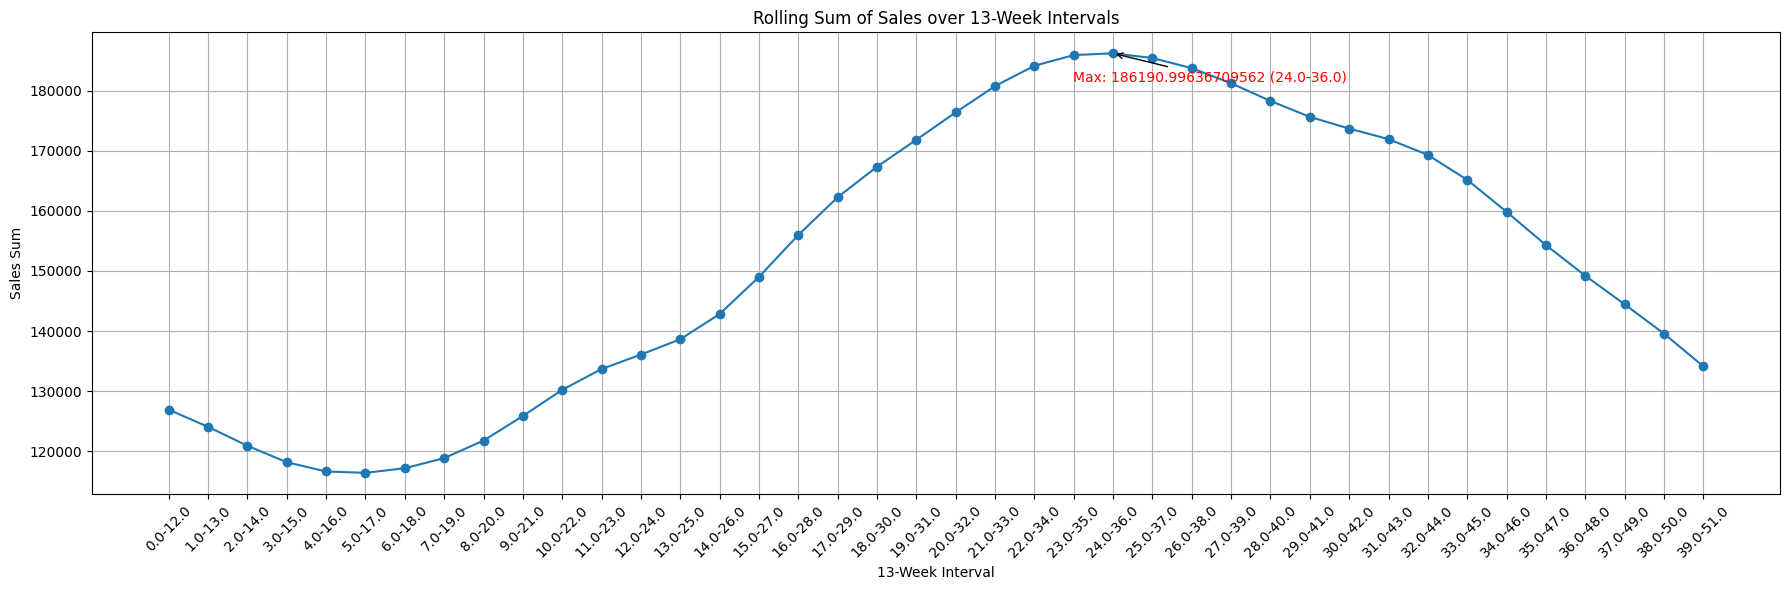

In [67]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = sales_sum[max_index]
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()

- From the above forecasting graphs, it can be interpreted that the maximum sales in the next one year could be from the week 24 to week 36.
- Our historical data have highest sales from the week 19 - week 31.

- Our forecasting demand range is similar to the range of already existing historical data demand, making our results valid and much more derivable in the future.

## Q4 <a name="Q4_Modelling"></a>

- Item Description: Diet Square Mulberries Sparkling Water 10Small MLT
- Caloric Segment: Diet
- Market Category: Sparkling Water
- Manufacturer: Swire-CC
- Brand: Square
- Package Type: 10Small MLT
- Flavor: ‘Mulberries
- Swire plans to release this product for the duration of 1 year but only in the Northern region. What will the forecasted demand be, in weeks, for this product?


This is the consideration with Utah being the central point
- North West States: Washington (WA), Oregon (OR)
- North States: Idaho (ID), Wyoming (WY), Washington (WA), Oregon (OR)
- South States: Arizona (AZ), New Mexico (NM)
- West States: Nevada (NV), California (CA)
- Central States: Utah (UT), Colorado (CO)
- East States: Nebraska (NE), South Dakota (SD), Kansas (KS)

In [286]:
import pandas as pd
import warnings

# Setting the warnings to be ignored
warnings.filterwarnings('ignore')


In [397]:
# Function to calculate the scores

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
def get_scores(actual, predicted):
# Calculate errors
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = sqrt(mse)
    #percentage_diff = (np.abs(actual - predicted).sum()) /( np.abs(actual).mean())
    
    # Combine actual and predicted values into one DataFrame
    mape_df = pd.DataFrame({'actual': actual.values, 'predicted': predicted.values})

# Calculate absolute percentage error
    mape_df['absolute_percentage_error'] = np.abs((mape_df['actual'] - mape_df['predicted']) / mape_df['actual']) * 100

# Calculate MAPE
    mape = mape_df['absolute_percentage_error'].mean()
    
# Calculate MAPE
    #mape = percentage_diff.mean()
# Calculate "Accuracy" Percentage
    accuracy_percentage = 100 - mape
# Print metrics
#     print(f"MAE: {mae}")
#     print(f"MSE: {mse}")
#     print(f"RMSE: {rmse}")
#     print(f"MAPE: {mape}%")
#     print(f"Direct 'Accuracy' Percentage: {accuracy_percentage}%")
    return pd.Series(data={'mae':mae, 'mse':mse, 'rmse':rmse, 'mape':mape, 'direct_accuracy':accuracy_percentage}, index=['mae', 'mse', 'rmse','mape','direct_accuracy'])

In [288]:
# Reading the dataset
market_demand = pd.read_csv("FACT_MARKET_DEMAND-001.csv")

# Printing the shape
market_demand.shape

(24461424, 10)

In [289]:
# Computing the null values with mode of caloric segment
market_demand['CALORIC_SEGMENT'].fillna(market_demand['CALORIC_SEGMENT'].mode()[0], inplace=True)
print("\nMissing value imputation check:")

# Checking if there are no null values
print(market_demand.isnull().sum().sum())


Missing value imputation check:
0


In [290]:
# Reading the zip_to_market data
zip_to_market = pd.read_csv(r"zip_to_market_unit_mapping.csv")

zip_to_market.shape

(2382, 2)

In [291]:
# Reading the consumer demographics data
consumer_demographics = pd.read_csv(r"pivoted consumer data.csv")

pd.set_option('display.max_columns', 150)
pd.set_option('display.width', 1000)
consumer_demographics.shape

(6552, 79)

In [292]:
# Dictionary mapping states to regions
state_regions = {
    'WA': 'North West',
    'OR': 'North West',
    'ID': 'North',
    'WY': 'North',
    'AZ': 'South',
    'NM': 'South',
    'NV': 'West',
    'CA': 'West',
    'UT': 'Central',
    'CO': 'Central',
    'NE': 'East',
    'SD': 'East',
    'KS': 'East'
}

# Function to get region for a state
def get_region(state):
    return state_regions.get(state, 'Unknown')

# Add a new column 'Region' based on 'State'
consumer_demographics['Region'] = consumer_demographics['State'].map(get_region)

In [293]:
# Selecting only Zip and Region column
consumer_demographics_zip_region = consumer_demographics[['Zip', 'Region']]

# Filtering the dataset to consider only North regions
consumer_demographics_north = consumer_demographics_zip_region[consumer_demographics_zip_region['Region'] == 'North']

In [294]:
# Perform inner join on 'Zip' and 'ZIP_CODE' columns
merged_data = pd.merge(consumer_demographics_north, zip_to_market, left_on='Zip', right_on='ZIP_CODE', how='inner')

# Remove duplicates in MARKET_KEY and Region
merged_data = merged_data.drop_duplicates(subset=['MARKET_KEY', 'Region'])

In [295]:
# Dropping Zip Column
merged_data.drop(columns='Zip', inplace=True)

In [296]:
# Dropping the Zip Code Column
merged_data.drop(columns='ZIP_CODE', inplace=True)

# Printing the shape of the merged dataset
merged_data.shape

(16, 2)

In [297]:
# Combining market_demand with zip_customer dataset
final_merged_data = pd.merge(market_demand, merged_data, on='MARKET_KEY', how='inner')

# Checking if there are null values
final_merged_data.isnull().sum().sum()

0

In [298]:
# Filtering the mulberry flavor from item
mulberry = final_merged_data[(final_merged_data['ITEM'].str.contains('MULBERRIES', case=False, regex=True))]

# Printing the shape of the new dataset which contains only mulberry
mulberry.shape

(12784, 11)

In [299]:
# Filtering Swire + Mulberry data
mulberry_swire = mulberry[mulberry['MANUFACTURER'] == 'SWIRE-CC']

# Printing the shape
mulberry_swire.shape

(1833, 11)

In [300]:
# Filtering Swire + Mulberry + Diet 
mulberry_swire_diet = mulberry_swire[mulberry_swire['CALORIC_SEGMENT']  == 'DIET/LIGHT']

# Printing the shape
mulberry_swire_diet.shape

(1708, 11)

In [301]:
# Convert 'DATE' column to datetime format
mulberry_swire_diet['DATE'] = pd.to_datetime(mulberry_swire_diet['DATE'])

# Grouping by date column and computing unit sales to eliminate duplicates
weekly_data = mulberry_swire_diet.groupby('DATE')['UNIT_SALES'].sum().reset_index()

# Group by year and sum the UNIT_SALES
yearly_sales = weekly_data.groupby(weekly_data['DATE'].dt.year)['UNIT_SALES'].sum()

# Create a new DataFrame from the grouped data
yearly_sales_df = pd.DataFrame({'Year': yearly_sales.index, 'Unit_Sales': yearly_sales.values})

# Printing the dataframe
yearly_sales_df

Year  Unit_Sales
0  2020      4187.0
1  2021     50501.0
2  2022      7165.0
3  2023       156.0

The unit sales is highest for the year 2021 with 50K followed by 2022 and 2020. The least unit sales is from the year 2023 which accounts for a mere 156 sales. There is a negative trend after the year 2021.

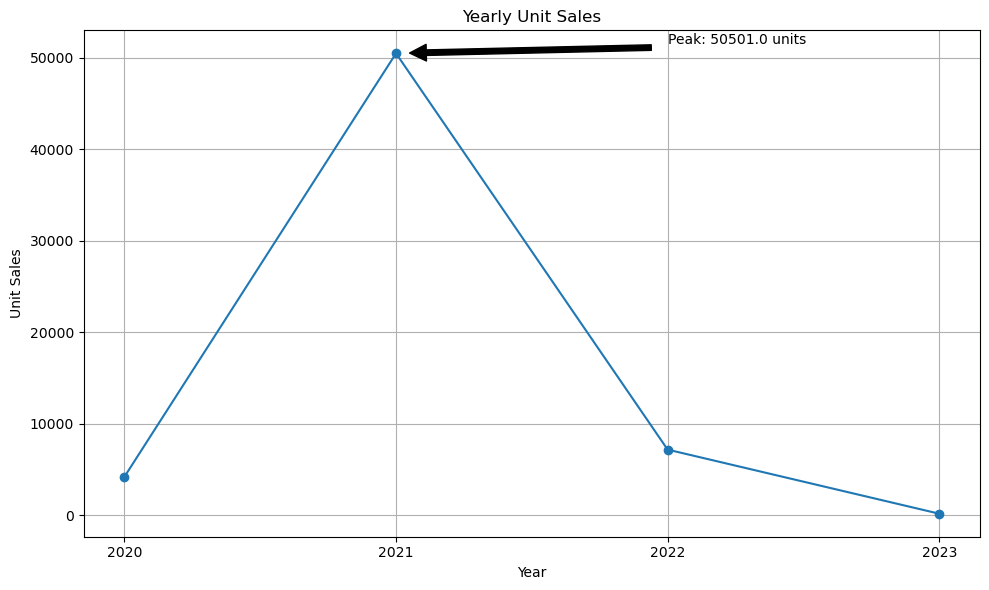

In [302]:
import matplotlib.pyplot as plt

# Find the peak sales year and value
peak_sales_year = yearly_sales_df.loc[yearly_sales_df['Unit_Sales'].idxmax(), 'Year']
peak_sales_value = yearly_sales_df['Unit_Sales'].max()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales_df['Year'], yearly_sales_df['Unit_Sales'], marker='o', linestyle='-')
plt.title('Yearly Unit Sales')
plt.xlabel('Year')
plt.ylabel('Unit Sales')
plt.grid(True)
plt.xticks(yearly_sales_df['Year'])  # Show all years on x-axis

# Mark the peak sales value
plt.annotate(f'Peak: {peak_sales_value} units', xy=(peak_sales_year, peak_sales_value),
             xytext=(peak_sales_year + 1, peak_sales_value + 1000),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()


There is a negative trend for mulberry + swire from 2022

### Prophet Model

In [303]:
# Converting  Date to datetime variable
mulberry_swire_diet['DATE'] = pd.to_datetime(mulberry_swire_diet['DATE'])

# Grouping by date to ensure only one record for each date
mulberry_swire_diet = mulberry_swire_diet.groupby('DATE')['UNIT_SALES'].sum().reset_index()

#### Training the entire dataset for forecasting

#### swire + mulberry + diet

In [304]:
# Extracting mulberry flavor
mulberry = final_merged_data[(final_merged_data['ITEM'].str.contains('MULBERRIES', case=False, regex=True))]

# Filtering out the Swire sales
mulberry_swire = mulberry[mulberry['MANUFACTURER'] == 'SWIRE-CC']

# Filtering out swire+mulberry+diet
mulberry_swire_diet = mulberry_swire[mulberry_swire['CALORIC_SEGMENT']  == 'DIET/LIGHT']

In [305]:
# Copying the datset 
mulberry_swire_diet_forecast = mulberry_swire_diet.copy()

In [306]:
# Converting to date time
mulberry_swire_diet_forecast['DATE'] = pd.to_datetime(mulberry_swire_diet_forecast['DATE'])

# Grouping to ensure one record for each date
mulberry_swire_diet_forecast_daily = mulberry_swire_diet_forecast.groupby('DATE')['UNIT_SALES'].sum().reset_index()

# Sorting by date column
mulberry_swire_diet_forecast = mulberry_swire_diet_forecast_daily.sort_values(by='DATE')

In [307]:
# Renaming for Prophet model requirements
mulberry_swire_diet_forecast = mulberry_swire_diet_forecast.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

# Extracting the last date
mulberry_swire_diet_forecast.tail(1)

ds    y
134 2023-07-01  1.0

The last date is 2023-07-01

In [ ]:
# Creating an instance for the model
p_model1 = Prophet()

# Fitting the model
p_model1.fit(mulberry_swire_diet_forecast)

# Create future dates for forecasting for 1 year
future = p_model1.make_future_dataframe(periods=52,freq = 'W')

# Make predictions
forecast1 = p_model1.predict(future)

# Plot the forecast
# plot_plotly(p_model1, forecast1)

In [309]:
# Extracting the future sales for 1 year
forecast_future = forecast1[forecast1['ds'] > '2023-07-01']

# Printing to ensure if the filter is working right
forecast_future.head(2)

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  additive_terms  additive_terms_lower  additive_terms_upper      yearly  yearly_lower  yearly_upper  multiplicative_terms  multiplicative_terms_lower  multiplicative_terms_upper       yhat
135 2023-07-02 -110.053709 -156.706731  201.795569  -110.053709  -110.053709      135.114942            135.114942            135.114942  135.114942    135.114942    135.114942                   0.0                         0.0                         0.0  25.061234
136 2023-07-09 -114.546123 -197.287970  165.726691  -114.818539  -114.317650      100.385351            100.385351            100.385351  100.385351    100.385351    100.385351                   0.0                         0.0                         0.0 -14.160772

In [310]:
# Removing any negative sales
forecast_future['yhat'] = forecast_future['yhat'].clip(lower=0)

In [311]:
# Computing yearly sales
yearly_forecast_mulberry = forecast_future.groupby(forecast_future['ds'].dt.year)['yhat'].sum()

# Create a new DataFrame from the grouped data
yearly_forecast_mulberry_df = pd.DataFrame({'Year': yearly_forecast_mulberry.index, 'Unit_Sales': yearly_forecast_mulberry.values})

# Printing the data
yearly_forecast_mulberry_df

Year  Unit_Sales
0  2023   25.061234
1  2024    0.000000

- Swire and Mulberry has not crossed even 100 unit sales in the forecasted year. Maybe Swire has not experimented with this flavor in the last year.

#### SARIMA

In [312]:
# Extracting the mulberry flavor
mulberry = final_merged_data[(final_merged_data['ITEM'].str.contains('MULBERRIES', case=False, regex=True))]

# Swire + mulberry
mulberry_swire = mulberry[mulberry['MANUFACTURER'] == 'SWIRE-CC']

# Swire + Diet
mulberry_swire_diet = mulberry_swire[mulberry_swire['CALORIC_SEGMENT']  == 'DIET/LIGHT']

In [313]:
mulberry_swire_diet_forecast = mulberry_swire_diet.copy()

# Converting to date time variable
mulberry_swire_diet_forecast['DATE'] = pd.to_datetime(mulberry_swire_diet_forecast['DATE'])

#Grouping by date to ensure no duplicate date records
mulberry_swire_diet_forecast_daily = mulberry_swire_diet_forecast.groupby('DATE')['UNIT_SALES'].sum().reset_index()

In [314]:
# Extracting date and unit sales column
df = mulberry_swire_diet_forecast_daily[['DATE','UNIT_SALES']].groupby(by="DATE", as_index=False).sum()

# Converting to date time variable
df['DATE'] = pd.to_datetime(df['DATE'])

# Making date as index for sarima requirements
df.set_index('DATE', inplace=True)

In [315]:
# Printing the last date
df.tail(2)

UNIT_SALES
DATE                  
2023-06-24         7.0
2023-07-01         1.0

In [316]:
# Creating dates for future
new_dates = pd.date_range(start='2023-07-02', end='2024-06-23')
new_df = pd.DataFrame(index=new_dates)

# Concatenate the original DataFrame with the DataFrame containing the new dates
df = pd.concat([df, new_df])

# Sort the index
df.sort_index(inplace=True)

# Converting the entire dataframe to date time varibale
df.index = pd.to_datetime(df.index)

In [317]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA order and seasonal_order
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 7)  # (P, D, Q, s) - assuming weekly data, thus s=7

# Split the dataset into training and forecasting periods
training_data = df[df.index < '2023-07-02']

# SARIMA Model fitting
model = SARIMAX(training_data['UNIT_SALES'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

In [318]:
# Predicting for 1 year
forecast = model_fit.predict(start='2023-07-02', end='2024-06-23')
forecast_reset_index = forecast.reset_index()

# Change the name of the columns for better readability
forecast_reset_index.rename(columns={'index': 'Date', 'predicted_mean': 'UNIT_SALES'}, inplace=True)

In [319]:
# Removing any Negative sales
forecast_reset_index['UNIT_SALES'] = forecast_reset_index['UNIT_SALES'].clip(lower=0)

In [320]:
# Yearly Unit sales
forecast_sarima  = forecast_reset_index.groupby(forecast_reset_index['Date'].dt.year)['UNIT_SALES'].sum()

# Create a new DataFrame from the grouped data
yearly_forecast_mulberry_df = pd.DataFrame({'Year': forecast_sarima.index, 'Unit_Sales': forecast_sarima.values})

# Printing the dataframe
yearly_forecast_mulberry_df

Year  Unit_Sales
0  2023         0.0
1  2024         0.0

- Swire and Mulberry has not crossed even 100 unit sales in the forecasted year. Maybe Swire has not experimented with this flavor in the last year. Sarima model is not forecasting as expected due to complicated dataset. Hence we prophet model.

### Other Considerations

Considering various combinations to determine why are the sales dipping in swire + diet + mulberry.

#### Only Mulberry Prophet model

In [321]:
#### Extracing the mulberry flavor
mulberry = final_merged_data[(final_merged_data['ITEM'].str.contains('MULBERRIES', case=False, regex=True))]
mulberry_forecast = mulberry.copy()

# Converting to date time variable
mulberry_forecast['DATE'] = pd.to_datetime(mulberry_forecast['DATE'])

# No duplicate date rows
mulberry_forecast_daily = mulberry_forecast.groupby('DATE')['UNIT_SALES'].sum().reset_index()

# Sort according to the date
mulberry_forecast = mulberry_forecast_daily.sort_values(by='DATE')

# Rename for prophet requirements
mulberry_forecast = mulberry_forecast.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

# Printing the last date 
mulberry_forecast.tail(5)

ds       y
143 2023-09-30  4307.0
144 2023-10-07  4330.0
145 2023-10-14  4467.0
146 2023-10-21  4254.0
147 2023-10-28  3974.0

Mulberry sales are better compared Mulberry + Swire + Diet

In [ ]:
p_model2 = Prophet()
p_model2.fit(mulberry_forecast)

# Create future dates for forecasting
future = p_model2.make_future_dataframe(periods=52,freq = 'W')

# Make predictions
forecast2 = p_model2.predict(future)

# Plot the forecast
# plot_plotly(p_model2, forecast2)

In [323]:
# Extracting the forecated sales
forecast_future = forecast2[forecast2['ds'] > '2023-10-28']
forecast_future.head(5)

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  additive_terms  additive_terms_lower  additive_terms_upper      yearly  yearly_lower  yearly_upper  multiplicative_terms  multiplicative_terms_lower  multiplicative_terms_upper         yhat
148 2023-10-29  4619.409359  3442.320720  4747.626871  4619.409359  4619.409359     -510.500173           -510.500173           -510.500173 -510.500173   -510.500173   -510.500173                   0.0                         0.0                         0.0  4108.909186
149 2023-11-05  4602.920789  3721.649646  5067.073380  4602.021464  4603.805574     -208.270897           -208.270897           -208.270897 -208.270897   -208.270897   -208.270897                   0.0                         0.0                         0.0  4394.649892
150 2023-11-12  4586.432218  3945.415397  5258.316508  4583.739474  4589.097479       62.468578             62.468578             62.468578   62.468578     62.468578     62.468578                   0.0                         0.0                         0.0  4648.900797
151 2023-11-19  4569.943648  4072.099553  5437.373102  4564.797511  4574.782241      152.922387            152.922387            152.922387  152.922387    152.922387    152.922387                   0.0                         0.0                         0.0  4722.866036
152 2023-11-26  4553.455078  3957.812923  5273.748490  4546.247467  4560.706837       58.115436             58.115436             58.115436   58.115436     58.115436     58.115436                   0.0                         0.0                         0.0  4611.570514

In [324]:
forecast_future.tail(1)

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  additive_terms  additive_terms_lower  additive_terms_upper      yearly  yearly_lower  yearly_upper  multiplicative_terms  multiplicative_terms_lower  multiplicative_terms_upper         yhat
199 2024-10-20  3778.492273  2305.154067  3752.276782  3405.329831  4128.001289     -712.177312           -712.177312           -712.177312 -712.177312   -712.177312   -712.177312                   0.0                         0.0                         0.0  3066.314961

The trend might be decreasing but there are still postive sales in 1000's

In [325]:
forecast_future['yhat'] = forecast_future['yhat'].clip(lower=0)

yearly_forecast_mulberry = forecast_future.groupby(forecast_future['ds'].dt.year)['yhat'].sum()

# Create a new DataFrame from the grouped data
yearly_forecast_mulberry_df = pd.DataFrame({'Year': yearly_forecast_mulberry.index, 'Unit_Sales': yearly_forecast_mulberry.values})

yearly_forecast_mulberry_df

Year     Unit_Sales
0  2023   44463.494491
1  2024  173997.204651

The forecasted sales for 1 year is 218,460. Mulberry (or flavor) is not the problem for low unit sales in Mulberry + Diet + Swire

#### Mulberry + Diet

In [326]:
# Extracing mulberry flavor
mulberry = final_merged_data[(final_merged_data['ITEM'].str.contains('MULBERRIES', case=False, regex=True))]

# Filtering for diet 
mulberry_diet = mulberry[mulberry['CALORIC_SEGMENT']  == 'DIET/LIGHT']
mulberry_diet_forecast = mulberry_diet.copy()

# Converting to date time
mulberry_diet_forecast['DATE'] = pd.to_datetime(mulberry_diet_forecast['DATE'])

# Ensuring no duplicate records for date
mulberry_diet_forecast_daily = mulberry_diet_forecast.groupby('DATE')['UNIT_SALES'].sum().reset_index()

# Sorting the date
mulberry_diet_forecast_daily = mulberry_diet_forecast_daily.sort_values(by='DATE')

# Renaming for prophet requiremts
mulberry_diet_forecast = mulberry_diet_forecast_daily.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

# Printing the last date
mulberry_diet_forecast.tail(3)

ds       y
145 2023-10-14  4467.0
146 2023-10-21  4254.0
147 2023-10-28  3974.0

In [ ]:
# Creating an instance for the model
p_model4 = Prophet()

# Fitting the model
p_model4.fit(mulberry_diet_forecast)

# Create future dates for forecasting
future = p_model4.make_future_dataframe(periods=52,freq = 'W')

# Make predictions
forecast3 = p_model4.predict(future)

# Plot the forecast
# plot_plotly(p_model4, forecast3)

The trend is decreasing but not as bad as swire + diet + mulberry

In [328]:
# Extracting the future sales for 1 year
forecast_future = forecast3[forecast3['ds'] > '2023-10-28']

In [329]:
# Ensuring no negative unit sales
forecast_future['yhat'] = forecast_future['yhat'].clip(lower=0)

# Compute yearly sales
yearly_forecast_mulberry_diet = forecast_future.groupby(forecast_future['ds'].dt.year)['yhat'].sum()

# Create a new DataFrame from the grouped data
yearly_forecast_mulberry_diet_df = pd.DataFrame({'Year': yearly_forecast_mulberry_diet.index, 'Unit_Sales': yearly_forecast_mulberry_diet.values})
yearly_forecast_mulberry_diet_df

Year     Unit_Sales
0  2023   37951.326633
1  2024  178579.675365

The forecasted sales for 1 year is 216K. Mulberry (or flavor)  + Diet (Caloric Segment) is not the problem for low unit sales in Mulberry + Diet + Swire

In [330]:
mulberry = final_merged_data[(final_merged_data['ITEM'].str.contains('MULBERRIES', case=False, regex=True))]

# Filtering for diet 
mulberry_diet = mulberry[mulberry['CALORIC_SEGMENT']  == 'DIET/LIGHT']

In [331]:
mulberry_diet['CALORIC_SEGMENT'].value_counts()

CALORIC_SEGMENT
DIET/LIGHT    12096
Name: count, dtype: int64

#### Mulberry + Swire 

In [332]:
# Extracting mulberry flavor
mulberry = final_merged_data[(final_merged_data['ITEM'].str.contains('MULBERRIES', case=False, regex=True))]

# Filtering Swire sales
mulberry_swire = mulberry[mulberry['MANUFACTURER'] == 'SWIRE-CC']
mulberry_swire_forecast = mulberry_swire.copy()

# Converting to Date Time
mulberry_swire_forecast['DATE'] = pd.to_datetime(mulberry_swire_forecast['DATE'])

# Aggregating by date
mulberry_swire_forecast_daily = mulberry_swire_forecast.groupby('DATE')['UNIT_SALES'].sum().reset_index()

# Sorting by date
mulberry_swire_forecast = mulberry_swire_forecast_daily.sort_values(by='DATE')

# Renaming the columns for Prophet requirements
mulberry_swire_forecast = mulberry_swire_forecast.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

# Printing the last date
mulberry_swire_forecast.tail(1)

ds    y
134 2023-07-01  1.0

In [ ]:
# Creating an instance for the Prophet model
p_model3 = Prophet()

# Fitting the modle
p_model3.fit(mulberry_swire_forecast)

# Create future dates for forecasting
future = p_model3.make_future_dataframe(periods=52,freq = 'W')

# Make predictions
forecast2 = p_model3.predict(future)

# Plot the forecast
# plot_plotly(p_model3, forecast2)

In [334]:
# Future Sales
forecast_future = forecast2[forecast2['ds'] > '2023-07-01']

# No Negative Sales
forecast_future['yhat'] = forecast_future['yhat'].clip(lower=0)

# Year wise sales
yearly_forecast_mulberry_swire = forecast_future.groupby(forecast_future['ds'].dt.year)['yhat'].sum()

# Create a new DataFrame from the grouped data
yearly_forecast_mulberry_df = pd.DataFrame({'Year': yearly_forecast_mulberry_swire.index, 'Unit_Sales': yearly_forecast_mulberry_swire.values})
yearly_forecast_mulberry_df

Year  Unit_Sales
0  2023   27.580757
1  2024    0.000000

- Swire and Mulberry has not crossed even 100 unit sales(thats the problem for low swire + mulberry + diet sales) in the forecasted year. Maybe Swire has not experimented with this flavor in the last year. 
- So will consider Diet + Mulberry + Sparkling and then take Swire sales into account.

#### Diet + Mulberry + Sparkling

In [335]:
mulberry = final_merged_data[(final_merged_data['ITEM'].str.contains('MULBERRIES', case=False, regex=True))]
mulberry_diet = mulberry[mulberry['CALORIC_SEGMENT']  == 'DIET/LIGHT']

In [336]:
mulberry_diet['CATEGORY'].value_counts()

CATEGORY
SPARKLING WATER       8399
ING ENHANCED WATER    3679
SSD                     18
Name: count, dtype: int64

In [337]:
mulberry_diet_sparkling = mulberry_diet[mulberry_diet['CATEGORY']  == 'SPARKLING WATER']

In [338]:
mulberry_diet_sparkling.head(2)

DATE  MARKET_KEY CALORIC_SEGMENT         CATEGORY  UNIT_SALES  DOLLAR_SALES MANUFACTURER             BRAND            PACKAGE                                               ITEM Region
364  2023-02-04         586      DIET/LIGHT  SPARKLING WATER         1.0          1.99       JOLLYS        BUBBLE JOY  12SMALL MULTI CUP  BUBBLE JOY SPARKLING WATER MULBERRIES  BUBBLE ...  North
466  2023-09-02         586      DIET/LIGHT  SPARKLING WATER        52.0        221.74        COCOS  EXCLAMATION SODA   12SMALL 8ONE CUP  EXCLAMATION REFRESHER  SPARKLING WATER MULBERR...  North

#### Prophet Model for validation of  Sparkling Water + Diet + Mulberry


22:37:56 - cmdstanpy - INFO - Chain [1] start processing
22:37:56 - cmdstanpy - INFO - Chain [1] done processing


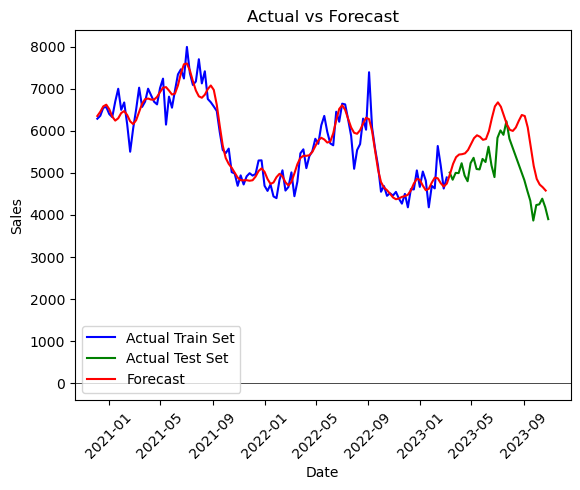

In [349]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming mulberry_diet_sparkling_validation is your DataFrame
mulberry_diet_sparkling_validation = mulberry_diet_sparkling.copy()

# Convert Date to datetime variable
mulberry_diet_sparkling_validation['DATE'] = pd.to_datetime(mulberry_diet_sparkling_validation['DATE'])

# Group by date to ensure only one record for each date
mulberry_diet_sparkling_validation = mulberry_diet_sparkling_validation.groupby('DATE')['UNIT_SALES'].sum().reset_index()

# Sort the data by date
mulberry_diet_sparkling_validation = mulberry_diet_sparkling_validation.sort_values(by='DATE')

# Calculate the index for partitioning the data
partition_index = int(len(mulberry_diet_sparkling_validation) * 0.8)

# Split the data into train and test sets
train_data = mulberry_diet_sparkling_validation.iloc[:partition_index]
test_data = mulberry_diet_sparkling_validation.iloc[partition_index:]

# Renaming for Prophet requirements
train_data = train_data.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})
test_data = test_data.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

p_model = Prophet()
p_model.fit(train_data)

# Create future dates for forecasting
future = p_model.make_future_dataframe(periods=34, freq='W')

# Make predictions
forecast = p_model.predict(future)

# Extracting the date and unit sales from forecast
pred = forecast[['ds','yhat']]

# Plotting actual vs forecasted sales
plt.plot(train_data['ds'], train_data['y'], label='Actual Train Set', color='blue')
plt.plot(test_data['ds'], test_data['y'], label='Actual Test Set', color='green')
plt.plot(pred['ds'], pred['yhat'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

In [400]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming mulberry_diet_sparkling_validation is your DataFrame
mulberry_diet_sparkling_validation = mulberry_diet_sparkling.copy()

# Convert Date to datetime variable
mulberry_diet_sparkling_validation['DATE'] = pd.to_datetime(mulberry_diet_sparkling_validation['DATE'])

# Group by date to ensure only one record for each date
mulberry_diet_sparkling_validation = mulberry_diet_sparkling_validation.groupby('DATE')['UNIT_SALES'].sum().reset_index()

# Sort the data by date
mulberry_diet_sparkling_validation = mulberry_diet_sparkling_validation.sort_values(by='DATE')

# Calculate the index for partitioning the data
partition_index = int(len(mulberry_diet_sparkling_validation) * 0.8)

# Split the data into train and test sets
train_data = mulberry_diet_sparkling_validation.iloc[:partition_index]
test_data = mulberry_diet_sparkling_validation.iloc[partition_index:]

# Renaming for Prophet requirements
train_data = train_data.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})
test_data = test_data.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

p_model = Prophet()
p_model.fit(train_data)

# Create future dates for forecasting
future = p_model.make_future_dataframe(periods=0, freq='W')

# Make predictions
forecast = p_model.predict(future)

# Extracting the date and unit sales from forecast
pred = forecast[['ds','yhat']]

get_scores(train_data['y'], pred['yhat'])

23:14:15 - cmdstanpy - INFO - Chain [1] start processing
23:14:15 - cmdstanpy - INFO - Chain [1] done processing


mae                  226.692952
mse                94751.882440
rmse                 307.817937
mape                   3.956043
direct_accuracy       96.043957
dtype: float64

In [399]:
forecast = p_model.predict(test_data)

pred = forecast[['ds','yhat']]
get_scores(test_data['y'], pred['yhat'])


mae                   654.519767
mse                618493.972874
rmse                  786.443878
mape                   13.653096
direct_accuracy        86.346904
dtype: float64

The map error is 13 %. Model is working fine no overfitting. Next is to forecast where we train the entire dataset and forescast for the next one year.

#### Training on entire dataset for forecasting sales for the next one year

In [340]:
mulberry_diet_sparkling['DATE'] = pd.to_datetime(mulberry_diet_sparkling['DATE'])

# Ensuring no duplicate records for date
mulberry_diet_sparkling_daily = mulberry_diet_sparkling.groupby('DATE')['UNIT_SALES'].sum().reset_index()

# Sorting the date
mulberry_diet_sparkling_daily = mulberry_diet_sparkling_daily.sort_values(by='DATE')

# Renaming for prophet requiremts
mulberry_diet_sparkling_daily = mulberry_diet_sparkling_daily.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

# Printing the last date
mulberry_diet_sparkling_daily.tail(1)

ds       y
147 2023-10-28  3896.0

In [ ]:
# Creating an instance for the model
p_model5 = Prophet()

# Fitting the model
p_model5.fit(mulberry_diet_sparkling_daily)

# Create future dates for forecasting
future5 = p_model5.make_future_dataframe(periods=52,freq = 'W')

# Make predictions
forecast5 = p_model5.predict(future5)

# Plot the forecast
plot_plotly(p_model5, forecast5)

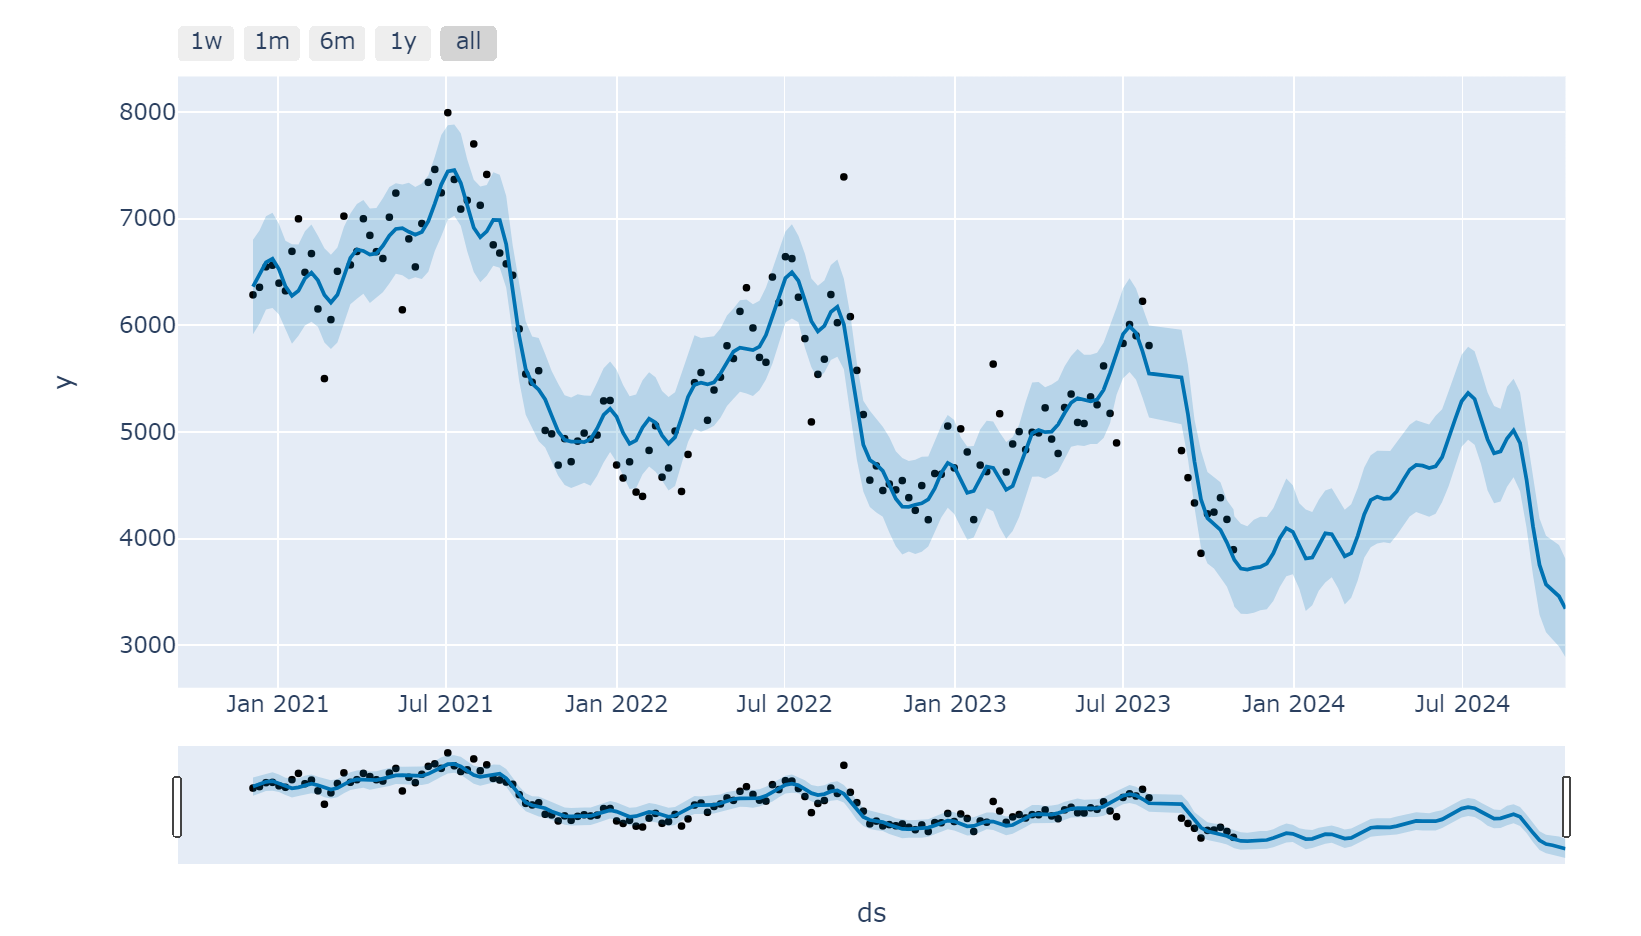

In [342]:
# Future Sales
forecast5_future = forecast5[forecast5['ds'] > '2023-10-28']
forecast5_future
# # No Negative Sales
forecast5_future['yhat'] = forecast5_future['yhat'].clip(lower=0)

# # Year wise sales
yearly_forecast_mulberry_diet_sparkling = forecast5_future.groupby(forecast5_future['ds'].dt.year)['yhat'].sum()

# # Create a new DataFrame from the grouped data
yearly_forecast_mulberry_sparking_diet_df = pd.DataFrame({'Year': yearly_forecast_mulberry_diet_sparkling.index, 'Unit_Sales': yearly_forecast_mulberry_diet_sparkling.values})
yearly_forecast_mulberry_sparking_diet_df

Year     Unit_Sales
0  2023   38484.278250
1  2024  184932.248948

When consider diet + mulberry + sparkling water the forecasted sales for 1 year is 223K 

In [343]:
mulberry = final_merged_data[(final_merged_data['ITEM'].str.contains('MULBERRIES', case=False, regex=True))]
mulberry_diet = mulberry[mulberry['CALORIC_SEGMENT']  == 'DIET/LIGHT']
mulberry_diet_sparkling = mulberry_diet[mulberry_diet['CATEGORY']  == 'SPARKLING WATER']

In [344]:
mulberry_diet_sparkling['MANUFACTURER'].value_counts(normalize=True)

MANUFACTURER
JOLLYS      0.571735
COCOS       0.151328
BEARS       0.141207
SWIRE-CC    0.135730
Name: proportion, dtype: float64

Results (Q4)

- Considered Diet and Sparkling Water and Mulberry which has a better sale of 223K in the forecasting year.
- Considered Diet and Sparkling Water and Mulberry which has a better sale of 223K in the forecasting year. Swire has 13 % of these sales, hence the total unit sales in the forecasted year is 29K.

## Q6 <a name="Q6_Modelling"></a>

Item Description: Diet Energy Moonlit Casava 2L Multi Jug
- Caloric Segment: Diet
- Market Category: Energy
- Manufacturer: Swire-CC
- Brand: Diet Moonlit
- Package Type: 2L Multi Jug
- Flavor: ‘Cassava’
  
Swire plans to release this product for 6 months. What will the forecasted demand be, in weeks, for this product?
roduct?


## Data Preparation

In [3]:
multi_jug_2l = market_demand[market_demand['PACKAGE']=='2L MULTI JUG']
diet_multi_jug_2l = multi_jug_2l[multi_jug_2l['CALORIC_SEGMENT']=='DIET/LIGHT']
swire_diet_multi_jug_2l = diet_multi_jug_2l[diet_multi_jug_2l['MANUFACTURER']=='SWIRE-CC']
swire_diet_multi_jug_2l_moonlit = swire_diet_multi_jug_2l[swire_diet_multi_jug_2l['BRAND'].str.contains('DIET MOONLIT', case=False, regex=True)]

In [4]:
df_6 = swire_diet_multi_jug_2l_moonlit[['DATE','UNIT_SALES']].groupby(by="DATE", as_index=False).sum()
df_6['DATE'] = pd.to_datetime(df_6['DATE'])
df_6.set_index('DATE', inplace=True)
df_6 = df_6.asfreq('W-SAT')

Text(0, 0.5, 'UNIT_SALES')

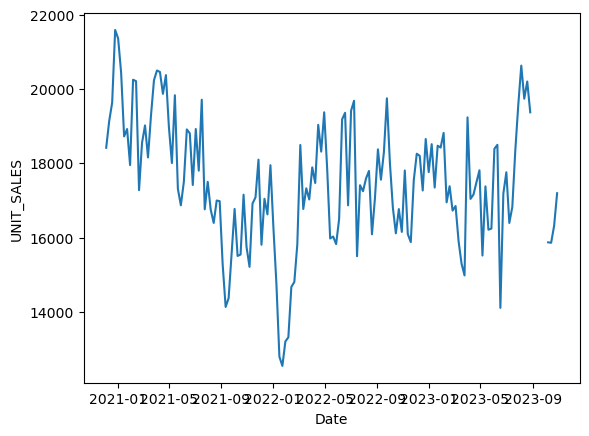

In [5]:
plt.plot(df_6)
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')

There are NAN in some weeks. as we dig deeper we see that there are no sale on the month of august 2023.

In [6]:
# Train and Test periods
from datetime import datetime

s_date = '2023-02-25'
e_date = '2023-08-26'
df_6 = df_6.loc[df_6.index <= e_date]
train_period = df_6.loc[df_6.index < s_date]
test_period = df_6.loc[(df_6.index >= s_date) & (df_6.index <= e_date)]


start_forecast = datetime.strptime(s_date, '%Y-%m-%d').date()
end_forecast = datetime.strptime(e_date, '%Y-%m-%d').date()

# Model Performance Metrics Function

We will create and resuse this function to measure each models performance with the data. This will include MAE, MSE, RMSE, MAPE and direct accuracy percentage.

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np

def get_scores(actual, predicted):
    # Calculate errors
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = sqrt(mse)
    percentage_diff = np.abs((actual - predicted) / actual) * 100

    # Calculate MAPE
    mape = percentage_diff.mean()

    # Calculate "Accuracy" Percentage
    accuracy_percentage = 100 - mape

    # Print metrics
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}%")
    print(f"Direct 'Accuracy' Percentage: {accuracy_percentage}%")

    return pd.Series(data={'mae':mae, 'mse':mse, 'rmse':rmse, 'mape':mape, 'direct_accuracy':accuracy_percentage}, index=['mae', 'mse', 'rmse','mape','direct_accuracy'])

## ARIMA

ARIMA is a statistical model used for time series analysis to forecast future data points by leveraging past data. It combines three main aspects: autoregression (AR), differencing (I) to make the time series stationary, and moving average (MA). The AR part exploits the relationship between an observation and a number of lagged observations, the I part involves differencing the data to achieve stationarity, and the MA part models the error of the observation as a combination of previous error terms.

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model fitting
order = (1, 1, 1)  # Still (p, d, q)

model = ARIMA(train_period['UNIT_SALES'], order=order)
model_fit = model.fit()

# Forecasting
forecast = model_fit.predict(start=start_forecast,
                             end=end_forecast)

arima_forecast = forecast

In [9]:
arima_score = get_scores(test_period.squeeze(), arima_forecast)

MAE: 1331.9101181487447
MSE: 2785766.362578469
RMSE: 1669.0615215079608
MAPE: 7.579412439517313%
Direct 'Accuracy' Percentage: 92.42058756048269%


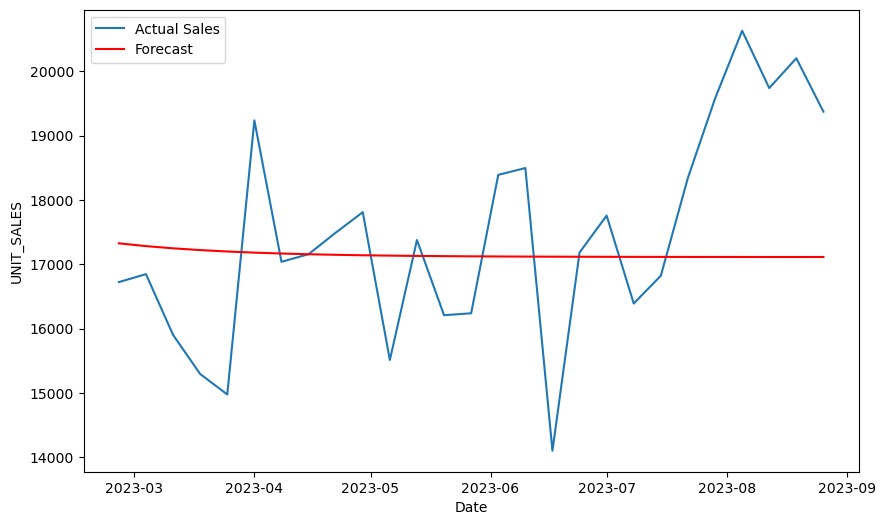

In [10]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_period['UNIT_SALES'], label='Actual Sales')
plt.plot(arima_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

## SARIMA

SARIMA extends ARIMA by explicitly accommodating and modeling seasonal effects in time series data. It includes additional seasonal elements on top of the AR, I, and MA components.
SARIMA is characterized by its ability to model both non-seasonal and seasonal components of the time series data, making it more versatile than ARIMA for data with clear seasonal patterns, such as sales data around specific holidays or events.
It incorporates additional parameters to handle seasonality, which are seasonal AR, seasonal differencing, and seasonal MA components, allowing it to capture seasonal fluctuations effectively, making it ideal for products with seasonal demand.

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# SARIMA Model fitting
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 52)  # (P, D, Q, s)

model = SARIMAX(train_period['UNIT_SALES'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecasting
forecast = model_fit.predict(start=start_forecast.strftime('%Y-%m-%d'),
                             end=end_forecast.strftime('%Y-%m-%d'))
sarima_forecast = forecast

C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
sarima_score = get_scores(test_period.squeeze(), sarima_forecast)

MAE: 2078.657764078491
MSE: 5833349.344575272
RMSE: 2415.2327723379526
MAPE: 12.472789935052829%
Direct 'Accuracy' Percentage: 87.52721006494717%


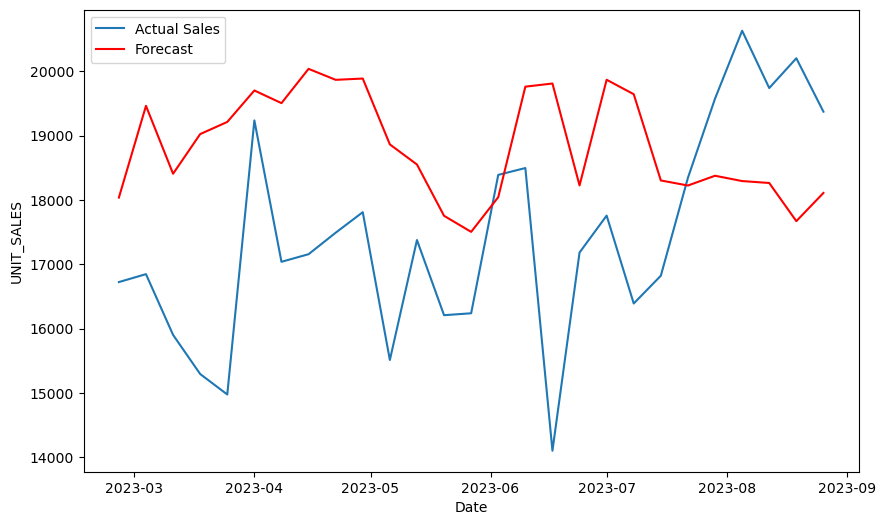

In [13]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_period['UNIT_SALES'], label='Actual Sales')
plt.plot(sarima_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

## Prophet

Prophet is a forecasting tool designed by Facebook for handling time series data that displays patterns on different time scales such as yearly, weekly, and daily. It is especially useful for data with strong seasonal effects and several seasons of historical data.
Prophet works by fitting nonlinear trends with yearly, weekly, and daily seasonality, plus holiday effects. It is robust to missing data and shifts in the trend, and typically requires no manual tuning of parameters.
The model accommodates seasonality through Fourier series and includes components for holidays and special events, making it well-suited for predicting demand for products around specific events or holidays, like Easter.

In [14]:
from prophet import Prophet

df_mod = train_period.reset_index()
df_mod['DATE'] = pd.to_datetime(df_mod['DATE'])
df_mod.columns = ['ds', 'y']

model = Prophet(changepoint_prior_scale=.1,seasonality_prior_scale=.1, weekly_seasonality=True)
model.fit(df_mod)

# Forecast the next 52 weeks (1 year)
future = model.make_future_dataframe(periods=53, freq='W-SAT')
forecast = model.predict(future)

prophet_forecast = forecast[['ds','yhat']]
prophet_forecast['ds'] = pd.to_datetime(prophet_forecast['ds'])
prophet_forecast.columns = ['DATE', 'yhat']
prophet_forecast.set_index('DATE', inplace=True)
prophet_forecast = prophet_forecast.asfreq('W-SAT')
prophet_forecast = prophet_forecast.loc[(prophet_forecast.index >= s_date) & (prophet_forecast.index <= e_date)]

20:06:10 - cmdstanpy - INFO - Chain [1] start processing
20:06:10 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_16664\4274361113.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_forecast['ds'] = pd.to_datetime(prophet_forecast['ds'])


In [15]:
prophet_score = get_scores(test_period.squeeze(), prophet_forecast.loc[(prophet_forecast.index >= s_date) & (prophet_forecast.index <= e_date)].squeeze())

MAE: 2573.16930571512
MSE: 9358981.759745052
RMSE: 3059.2452925100747
MAPE: 15.66648137188985%
Direct 'Accuracy' Percentage: 84.33351862811016%


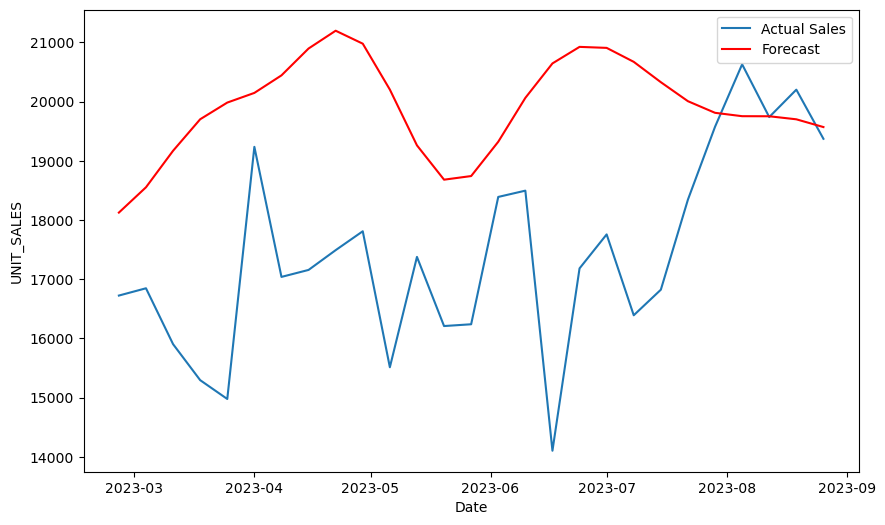

In [16]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_period['UNIT_SALES'], label='Actual Sales')
plt.plot(prophet_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

## Exponential Smoothing

Exponential Smoothing is a time series forecasting method for univariate data that applies smoothing factors to the observations, giving more weight to recent observations while not discarding older observations entirely.
It encompasses simple exponential smoothing for data with no clear trend or seasonality, and extends to Holt’s linear trend model and Holt-Winters’ seasonal model, which can account for both trends and seasonality in the data.
This method is straightforward and computationally efficient, making it a good choice for producing quick forecasts in situations where data patterns are reasonably consistent over time, but may struggle with data that has complex patterns or significant irregularities.

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ExponentialSmoothing Model fitting
model = ExponentialSmoothing(train_period['UNIT_SALES'], trend='add', seasonal='add', seasonal_periods=52).fit(smoothing_level=0.01, smoothing_slope=0.01, smoothing_seasonal=0.1)

# Forecasting

forecast_periods = ((end_forecast - start_forecast).days // 7) + 1 

exponential_forecast = model.forecast(forecast_periods)

forecast_dates = pd.date_range(start=start_forecast, periods=forecast_periods, freq='W-SAT')

C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_16664\2410909067.py:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_period['UNIT_SALES'], trend='add', seasonal='add', seasonal_periods=52).fit(smoothing_level=0.01, smoothing_slope=0.01, smoothing_seasonal=0.1)
C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [18]:
exponential_smoothing_score = get_scores(test_period.squeeze(), exponential_forecast)

MAE: 1672.5828724262556
MSE: 4512195.604211318
RMSE: 2124.192930082227
MAPE: 9.544250972143143%
Direct 'Accuracy' Percentage: 90.45574902785685%


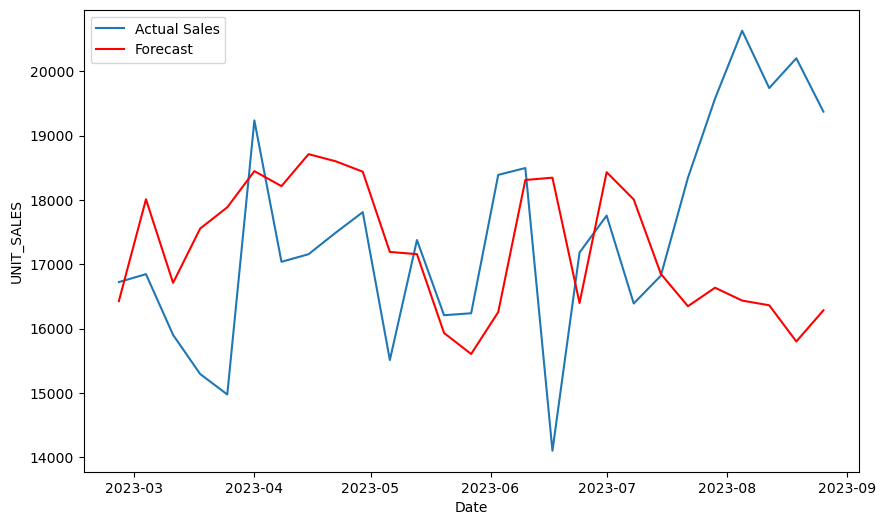

In [19]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_period['UNIT_SALES'], label='Actual Sales')
plt.plot(exponential_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

## Performance Summary

In [20]:
pd.options.display.float_format = '{:.2f}'.format
q2_scores = pd.DataFrame({'Arima':arima_score, 'Sarima':sarima_score, 'Prophet':prophet_score, 'Exponential Smoothing':exponential_smoothing_score}).T
print(q2_scores)

                          mae        mse    rmse  mape  direct_accuracy
Arima                 1331.91 2785766.36 1669.06  7.58            92.42
Sarima                2078.66 5833349.34 2415.23 12.47            87.53
Prophet               2573.17 9358981.76 3059.25 15.67            84.33
Exponential Smoothing 1672.58 4512195.60 2124.19  9.54            90.46


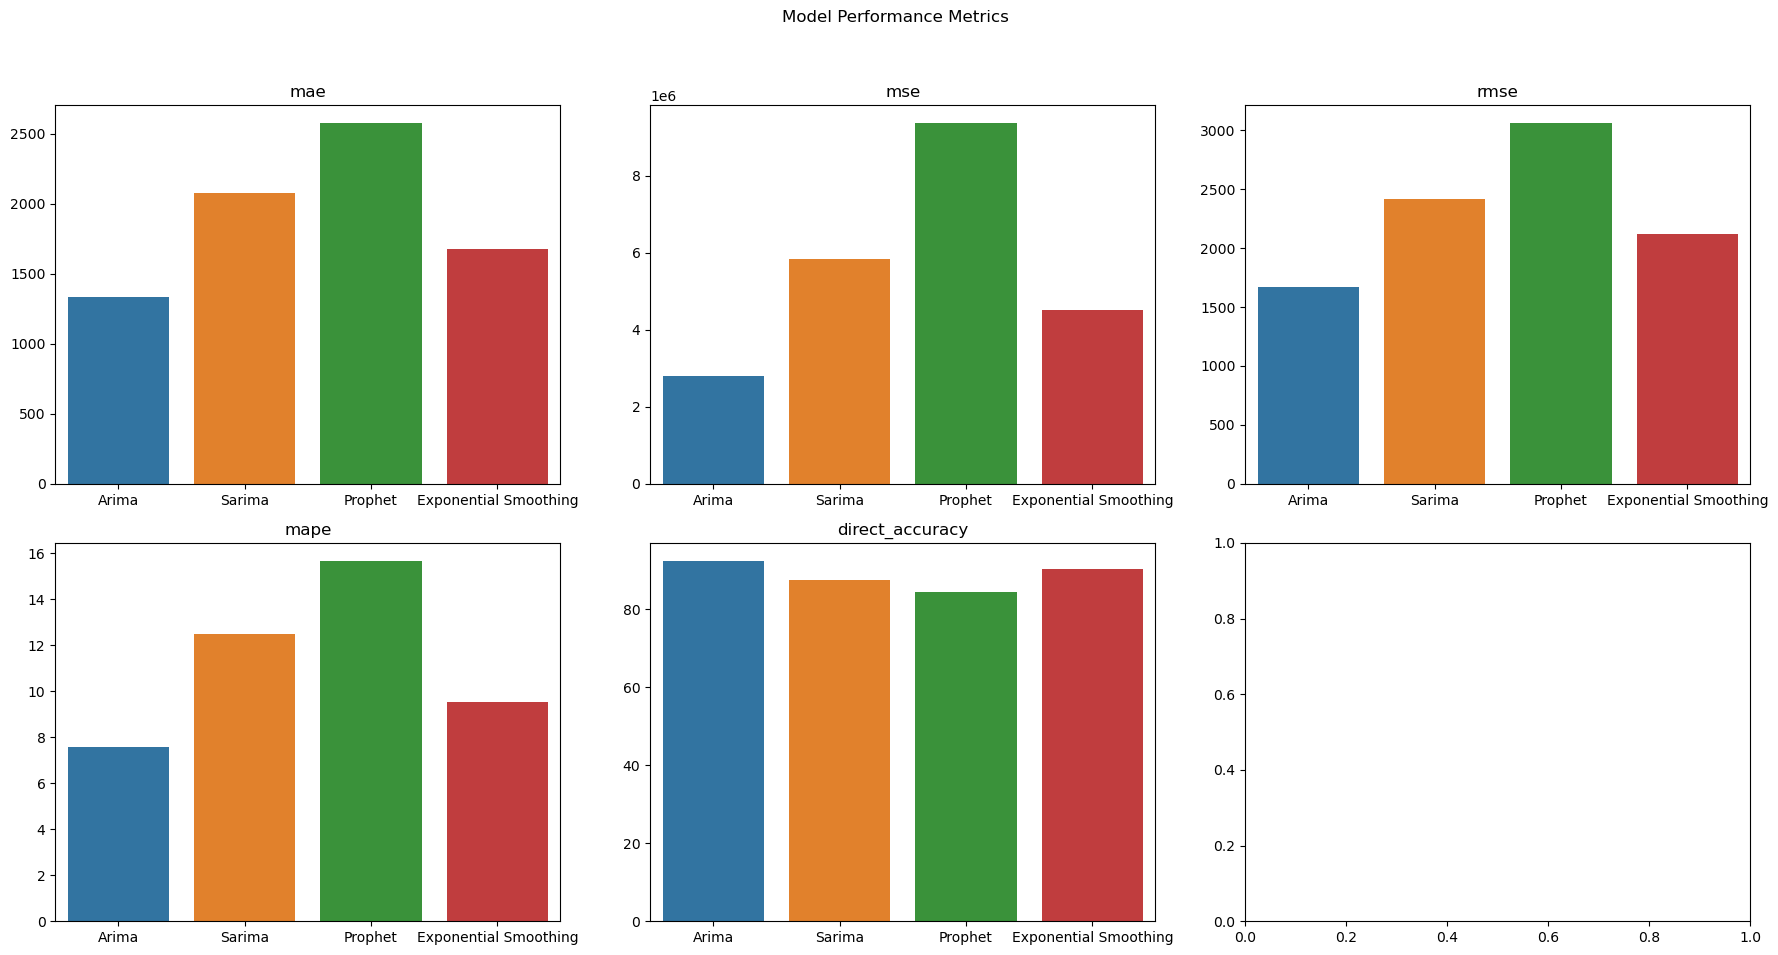

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Model Performance Metrics')

for i, column in enumerate(q2_scores.columns):
    row, col = divmod(i, 3)
    sns.barplot(ax=axes[row, col], x=q2_scores.index, y=q2_scores[column])
    axes[row, col].set_title(column)
    axes[row, col].set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Based on the metrics provided, Exponential Smoothing is identified as the most suitable choice when considering a graphical similarity to the ARIMA model. It presents a good balance between accuracy and consistency in predictions, despite not having the lowest MAE, MSE, RMSE, or the highest Direct Accuracy. Specifically, its MAE of 1672.58 and MSE of 4512195.60, along with an RMSE of 2124.19, indicate a reasonable level of prediction error, which is notably closer to the performance metrics of ARIMA. Moreover, its MAPE value of 9.54% demonstrates a relatively low percentage error, indicating its efficiency in maintaining accuracy in forecasts. Although its Direct Accuracy of 90.46% is not the highest, it reflects a strong capability in accurately forecasting future values, especially when considering the importance of graphical similarity in the context of ARIMA comparisons. Thus, for ensuring a balance between graphical resemblance to ARIMA and maintaining a good level of forecast accuracy and reliability, Exponential Smoothing emerges as the optimal model.

## Predicting 6 month using Exponential Smoothing

In [22]:
df_6 = swire_diet_multi_jug_2l_moonlit[['DATE','UNIT_SALES']].groupby(by="DATE", as_index=False).sum()
df_6['DATE'] = pd.to_datetime(df_6['DATE'])
df_6.set_index('DATE', inplace=True)
df_6 = df_6.loc[df_6.index <= e_date]
df_6 = df_6.asfreq('W-SAT')

In [23]:
start_forecast = datetime.strptime("2024-09-02", '%Y-%m-%d').date()

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ExponentialSmoothing Model fitting
model = ExponentialSmoothing(df_6['UNIT_SALES'], trend='add', seasonal='add', seasonal_periods=52).fit(smoothing_level=0.01, smoothing_slope=0.01, smoothing_seasonal=0.1)

# Forecasting

forecast_periods = 26 

exponential_forecast = model.forecast(forecast_periods)

forecast_dates = pd.date_range(start=start_forecast, periods=forecast_periods, freq='W-SAT')

C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_16664\1693557203.py:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(df_6['UNIT_SALES'], trend='add', seasonal='add', seasonal_periods=52).fit(smoothing_level=0.01, smoothing_slope=0.01, smoothing_seasonal=0.1)
C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [25]:
exponential_forecast

2023-09-02   16170.76
2023-09-09   15186.27
2023-09-16   15677.02
2023-09-23   16999.64
2023-09-30   16727.67
2023-10-07   15485.82
2023-10-14   15160.90
2023-10-21   16290.53
2023-10-28   15278.34
2023-11-04   15843.64
2023-11-11   15831.58
2023-11-18   15807.30
2023-11-25   17151.41
2023-12-02   16644.21
2023-12-09   17270.94
2023-12-16   16978.95
2023-12-23   18534.64
2023-12-30   17596.79
2024-01-06   17048.72
2024-01-13   15438.83
2024-01-20   15804.36
2024-01-27   15687.73
2024-02-03   16612.23
2024-02-10   16418.08
2024-02-17   15646.95
2024-02-24   16181.15
Freq: W-SAT, dtype: float64

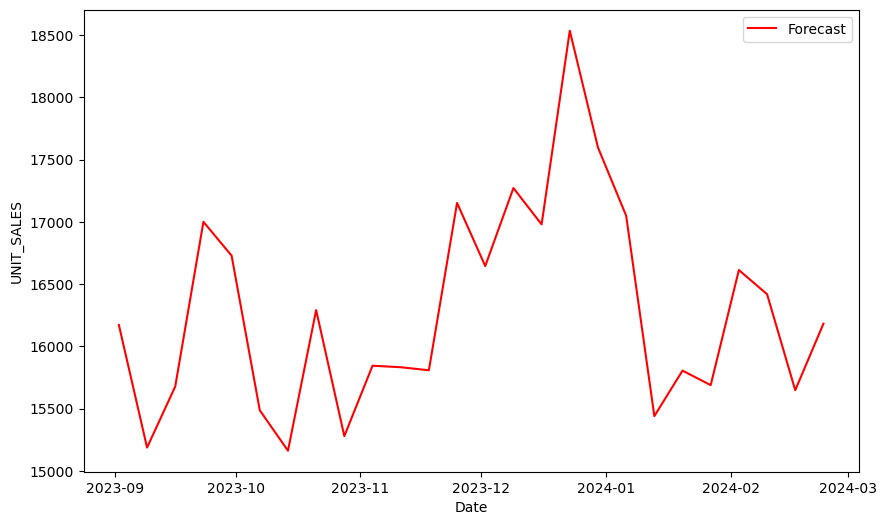

In [26]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(exponential_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

# Summary
The forecast for Swire's upcoming product, Diet Energy Moonlit Cassava 2L Multi Jug, was meticulously developed using a dataset tailored to match the product's characteristics: Diet caloric segment, Energy market category, manufactured by Swire-CC, and focusing on the 2L Multi Jug package type. The data was further refined to concentrate on historical sales data that aligns closely with the anticipated product profile, particularly emphasizing the Cassava flavor under the Diet Moonlit brand.

Four forecasting methodologies were evaluated for their effectiveness in predicting the product's demand over a 6-month period leading up to its launch: ARIMA, SARIMA, Prophet, and Exponential Smoothing. The assessment of these models was grounded in a comprehensive analysis using several key performance indicators: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and Direct Accuracy Percentatory phase.24.

# Model Performance Summary
Exponential Smoothing was identified as the most apt model for this forecasting task, demonstrating superior performance across multiple metrics. Despite not achieving the lowest MAE and MSE scores in absolute terms, its performance was commendably close to that of the ARIMA model, with a MAE of 1672.58, MSE of 4512195.60, and RMSE of 2124.19. Its MAPE of 9.54% and a Direct Accuracy Percentage of 90.46% underscored its robustness and consistency in prediction accuracy, making it exceptionally well-suited for the task at hand. While the SARIMA and Prophet models offered valuable insights, they did not surpass the Exponential Smoothing model in overall efficacy. The ARIMA model, known for its reliability, fell slightly behind in this specific context.

The chosen Exponential Smoothing model then provided a forecast for the new Cassava-flavored beverage, projecting weekly sales for the next 6 months. This projection anticipates the product's market performance, guiding Swire in strategic planning for production, distribution, and promotional efforts. The model forecasts an initial weekly sales figure of 16,170.76 units, with variations over the 6-month period, peaking at certain points due to seasonal adjustments and market responses.

# Findings and Conclusion

The Exponential Smoothing model stands out for its accuracy and reliability in forecasting sales for Swire's new Diet Energy Moonlit Cassava 2L Multi Jug. It offers a nuanced understanding of expected demand, capturing both the general trend and the seasonal fluctuations. These insights are crucial for Swire's preparation and strategy formulation, ensuring that production levels are optimally aligned with market demand, and marketing initiatives are effectively timed to maximize sales potential over the product's introductory phase.

<h2> Q5 </h2>  <a name="Q5_Modelling"></a>

- Item Description: Greetingle Health Beverage Woodsy Yellow .5L 12One Jug
- Caloric Segment: Regular
- Market Category: ING Enhanced Water
- Manufacturer: Swire-CC
- Brand: Greetingle
- Package Type: .5L 12One Jug
- Flavor: ‘Woodsy Yellow’

<i> Swire plans to release this product for 13 weeks, but only in one region. Which region would it perform best in? </i>

Look at region wise distribution for two parameter - manufacturer & brand:

- With Swire + Greetingle set we only have ING ENHANCED WATER category which matches with the category, however Caloric Segment available is only Diet. Let's break down Regular type seperately later.


- Now with manufacturer + Brand + Category, we observe the below distribution of total unit sales:


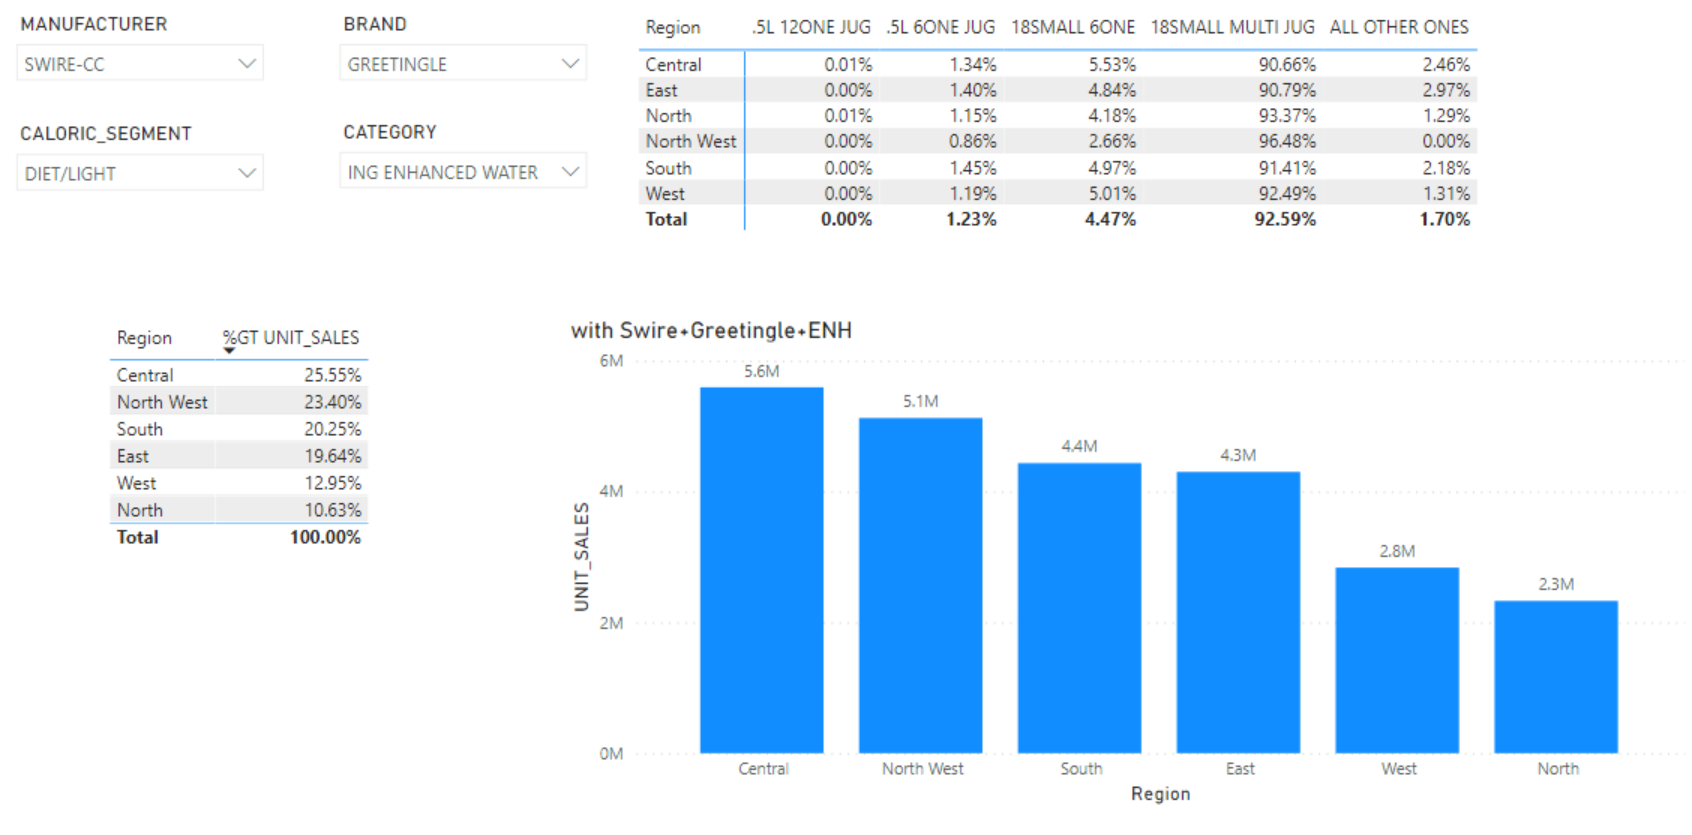

With regards to package type ".5L 12One Jug", above 3 (manufacturer + Brand + Category) filters set, we see that there are about 5 package types the beverages were sold. Over 90% of the sales have come from "18SMALL MULTI JUG" type.

Looks like package type ".5L 12One Jug" planned to be used for this innovative product were not used much by Greetingle & Swire and would not have any impact on identifying best region keeping technical & domain knowledge in mind and hence, we will neglect package type from further analysis.

On applying flavor ‘Woodsy Yellow’ + Regular + ING ENHANCED WATER, we see only COCOS manufacturer has experimented with this combination. Let's gauge the region wise sales:

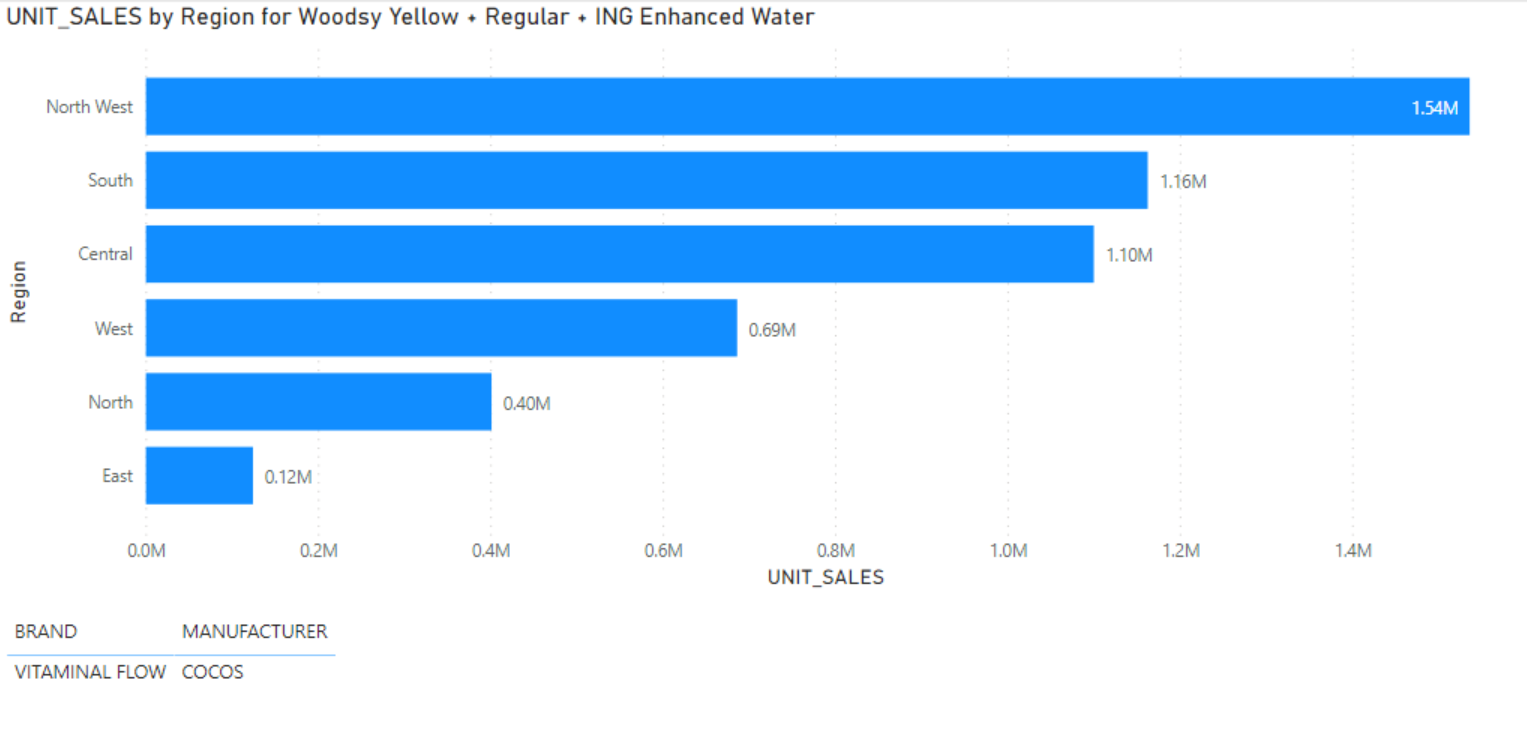

Lets compare sales by region for Woodsy Yellow, overall sales vs ENH water vs Regular:

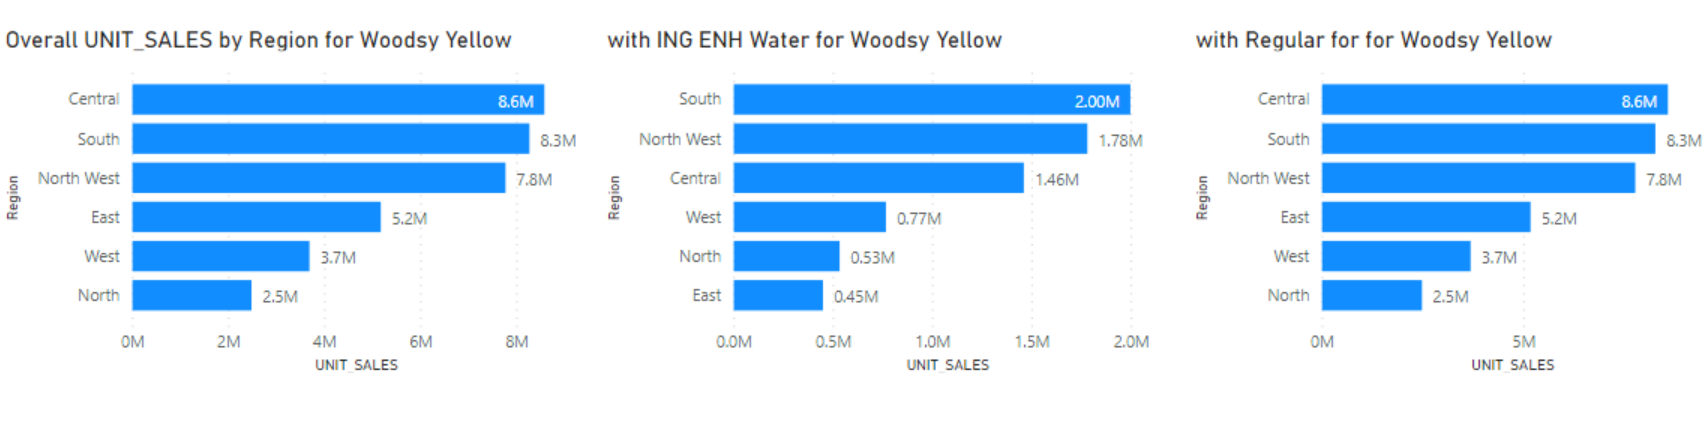

From all the analysis uptil this point, we have seen that Central, North West and South regions have consistently topped the charts be it Brand/Manufacturer/Caloric Segment/Flavor/Categor and even for a combination of these.

Lets deep dive into these 3 regions by time. Since we don't have to forecast or look at the absolute figures of sales, ideal chart in this case would be a ribbon chart over a regular line chart:

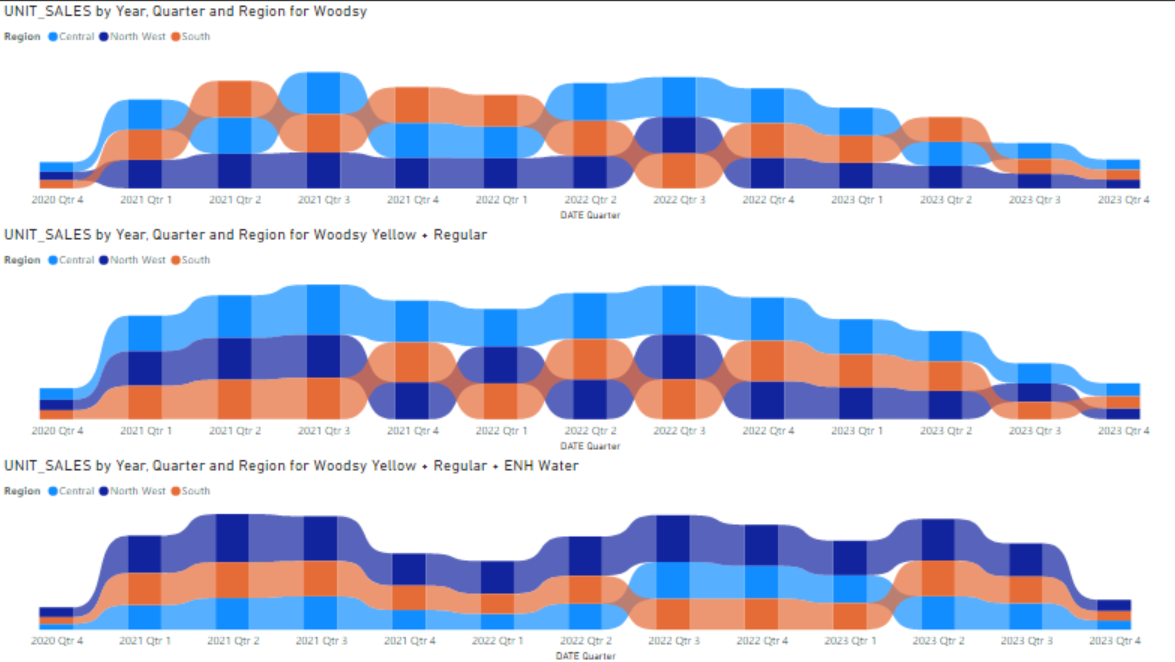

For Flavor alone: Central with little competition from South

Flavor + Regular: Central clear winner

Flavor + Regular + ENH Water: NW clear winner

Now for brand, brand + ENH Water:

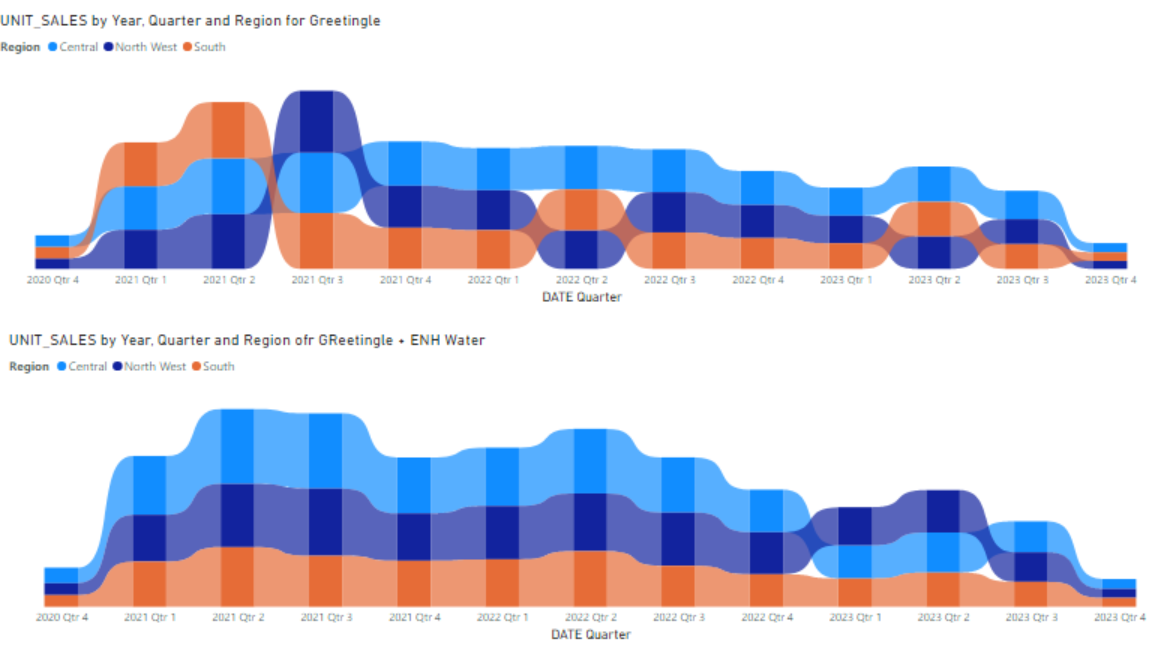

For Brand alone : Central winner for the most part

Brand + ENH Water: Central again

From the previous two results, we can safely eliminate South region as it has some significant presence for flavor alone but when other parameter are filtered on top of it, then the sales dies rapidly compared to NW & Central regions.

Top Insights:
1. Greetingle brand has a strong presence in Utah & Colorado states.
2. Flavor Woodsy Yellow dominates overall in South but with Regular and ENH Water filters, it is Washington & Oregon states that leads.

<h2> Central vs NW Statistical Analysis:</h2>

In [230]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Setting the warnings to be ignored
warnings.filterwarnings('ignore')

In [231]:
# # Load the Drive helper and mount
# from google.colab import drive

# # This will prompt for authorization.
# drive.mount('/content/drive')

In [232]:
# market_demand = pd.read_csv(r"/content/drive/My Drive/Copy of FACT_MARKET_DEMAND.csv")
# market_demand['CALORIC_SEGMENT'].fillna(market_demand['CALORIC_SEGMENT'].mode()[0], inplace=True)
# print("\nMissing value imputation check:")
# print(market_demand.isnull().sum().sum())

In [233]:
market_demand = pd.read_csv("FACT_MARKET_DEMAND-001.csv")
market_demand['CALORIC_SEGMENT'].fillna(market_demand['CALORIC_SEGMENT'].mode()[0], inplace=True)
print("\nMissing value imputation check:")
print(market_demand.isnull().sum().sum())


Missing value imputation check:
0


In [234]:
# zip_to_market = pd.read_csv(r"/content/drive/My Drive/zip_to_market_unit_mapping.csv")

In [235]:
zip_to_market = pd.read_csv(r"zip_to_market_unit_mapping.csv")

In [236]:
# consumer_demographics = pd.read_csv(r"/content/drive/My Drive/pivoted consumer data.csv")

# pd.set_option('display.max_columns', 150)
# pd.set_option('display.width', 1000)


In [237]:
consumer_demographics = pd.read_csv(r"pivoted consumer data.csv")

pd.set_option('display.max_columns', 150)
pd.set_option('display.width', 1000)

In [238]:
# Check if the sum of specified columns is zero for each row
zero_sum_mask = (consumer_demographics[['Age 15 - 17', 'Age 18 - 20', 'Age 21 - 24', 'Age 25 - 29',
                                        'Age 30 - 34', 'Age 35 - 44', 'Age 45 - 54', 'Age 55 - 64',
                                        'Age 65 - 74', 'Age 75 or More']].sum(axis=1) == 0)

# Drop rows where the sum is zero
consumer_demographics = consumer_demographics[~zero_sum_mask]

In [239]:
state_regions = {
    'WA': 'North West',
    'OR': 'North West',
    'ID': 'North',
    'WY': 'North',
    'AZ': 'South',
    'NM': 'South',
    'NV': 'West',
    'CA': 'West',
    'UT': 'Central',
    'CO': 'Central',
    'NE': 'East',
    'SD': 'East',
    'KS': 'East'
}

# Function to get region for a state
def get_region(state):
    return state_regions.get(state, 'Unknown')

# Add a new column 'Region' based on 'State'
consumer_demographics['REGION'] = consumer_demographics['State'].map(get_region)

In [240]:
consumer_demographics_zip_region = consumer_demographics[['Zip', 'State','REGION']]

consumer_demographics_region = consumer_demographics_zip_region[(consumer_demographics_zip_region['REGION'] == 'Central') | (consumer_demographics_zip_region['REGION'] == 'North West') ]
consumer_demographics_region['REGION'].value_counts()

REGION
North West    990
Central       800
Name: count, dtype: int64

In [241]:
# (consumer_demographics_region['Zip'].value_counts()>1).sum()

In [242]:
zip_cons = pd.merge(consumer_demographics_region, zip_to_market, left_on='Zip', right_on='ZIP_CODE', how='inner')
zip_cons = zip_cons.drop_duplicates(subset=['MARKET_KEY', 'REGION'])

In [243]:
merged_data = pd.merge(market_demand, zip_cons, on='MARKET_KEY', how='inner')

In [244]:
merged_data = merged_data.drop(['Zip','ZIP_CODE'], axis=1)

In [245]:
merged_data['State'].value_counts(normalize=True)

State
CO    0.381271
WA    0.263675
OR    0.228770
UT    0.126284
Name: proportion, dtype: float64

In [246]:
# Group by 'State' and calculate summary statistics for 'UNIT_SALES'
unit_sales_summary_by_state = merged_data.groupby('State')['UNIT_SALES'].describe()

unit_sales_summary_by_state

count        mean         std   min   25%   50%    75%      max
State                                                                     
CO     4409784.0  158.650056  426.420239  0.04  11.0  43.0  133.0  11219.0
OR     2645953.0  156.398806  356.790827  0.04  13.0  49.0  144.0  11100.0
UT     1460597.0  196.563396  471.057990  0.04  13.0  51.0  167.0  14773.0
WA     3049667.0  145.675230  331.236478  0.04  12.0  48.0  138.0   9243.0

While Utah has the least number of sales count, it has the highest average sales per order. The max values suggests strong possibility of outliers or very large orders.

<b> Note: Since, it was informed that the dataset is cleaned, we will not analyze further and remove those records. </b>

In [247]:
print("unit sales:")
region_sales_stats = merged_data.groupby('REGION')['UNIT_SALES'].describe()
print(region_sales_stats)

# Group the data by 'REGION' and compute summary statistics for 'DOLLAR_SALES'
region_sales_summary = merged_data.groupby('REGION')['DOLLAR_SALES'].describe()

print("dollar sales:")
# Display the summary statistics
print(region_sales_summary)


unit sales:
                count        mean         std   min   25%   50%    75%      max
REGION                                                                         
Central     5870381.0  168.083194  438.258413  0.04  12.0  45.0  140.0  14773.0
North West  5695620.0  150.656967  343.386241  0.04  13.0  49.0  141.0  11100.0
dollar sales:
                count        mean          std   min    25%     50%     75%       max
REGION                                                                               
Central     5870381.0  575.904097  1464.522706  0.01  40.16  156.31  500.48  69472.26
North West  5695620.0  487.903103  1122.230124  0.01  44.68  159.52  458.65  46137.39


No significant difference for the unit sales, however Central region has more dollar sales worth of beverages sold over NW in the overall dataset.

In [248]:
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

earliest_date = merged_data['DATE'].min()

# Step 2: Calculate week numbers
merged_data['WEEK_NUMBER'] = ((merged_data['DATE'] - earliest_date).dt.days // 7) % 52

# Filter data for Central region
central = merged_data[merged_data['REGION'] == 'Central']

# Filter data for Northwest region
northwest = merged_data[merged_data['REGION'] == 'North West']


Now the plan of action here is similar to how we had two batch of filters applied for the visuals at top for this question, we will go ahead and filter the data accordingly and then build a prophet model to compare best 13 weeks sales region wise. This will help us arrive at the best region with statistical analysis support.

<h2> Greetingle + ENH Water Filtered Modelling: </h2>

In [249]:
# Step 3: Aggregate the data for every week

northwest_fil_1 = northwest[(northwest['BRAND']=='GREETINGLE') & (northwest['CATEGORY']=='ING ENHANCED WATER')]
northwest_fil_1 = northwest_fil_1.groupby('DATE')['UNIT_SALES'].sum().reset_index()
# central_fil_1 = northwest[(northwest['BRAND']=='GREETINGLE') & (northwest['CATEGORY']=='ING ENHANCED WATER')]
# weekly_data = northwest_fil_1.groupby('WEEK_NUMBER')['UNIT_SALES'].sum().reset_index()
northwest_fil_1.tail(1)

DATE  UNIT_SALES
147 2023-10-28    19875.67

The last date is 2023-10-28

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Initialize and fit the Prophet model
p_model = Prophet()

nw_model_data1 = northwest_fil_1.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

p_model.fit(nw_model_data1)

# Create future dates for forecasting
future = p_model.make_future_dataframe(periods=52, freq='W')

# Make predictions
forecast = p_model.predict(future)

# Plot the forecast
plot_plotly(p_model, forecast)

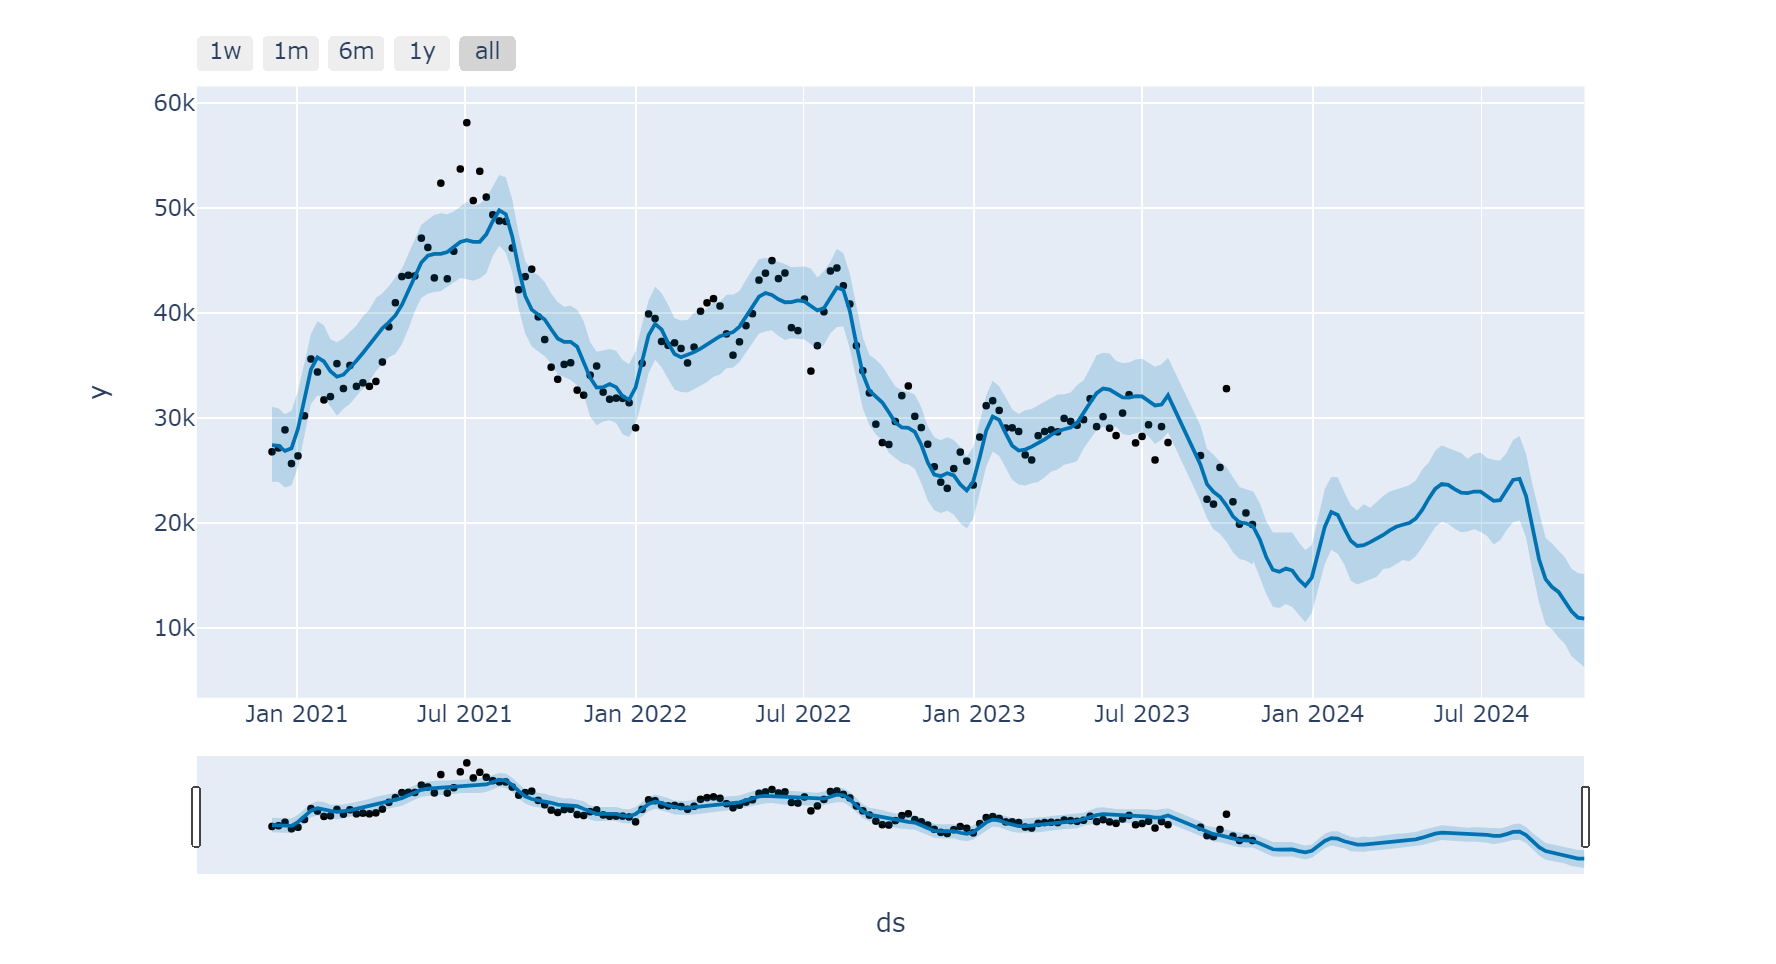

In [251]:
# week wise sales for best 13 weeks
nw_fil1_forecast_1year = forecast[forecast['ds'] > '2023-10-28']
earliest_date = nw_fil1_forecast_1year['ds'].min()
nw_fil1_forecast_1year

# Step 2: Calculate week numbers
nw_fil1_forecast_1year['WEEK_NUMBER'] = ((nw_fil1_forecast_1year['ds'] - earliest_date).dt.days // 7) % 52
weekly_forecast_data = nw_fil1_forecast_1year.groupby('WEEK_NUMBER')['yhat'].sum().reset_index()

In [252]:
# Ensure that there are enough rows to compute the rolling sum
if len(weekly_forecast_data) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_forecast_data) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_forecast_data.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_forecast_data.iloc[i]['WEEK_NUMBER']}-{weekly_forecast_data.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

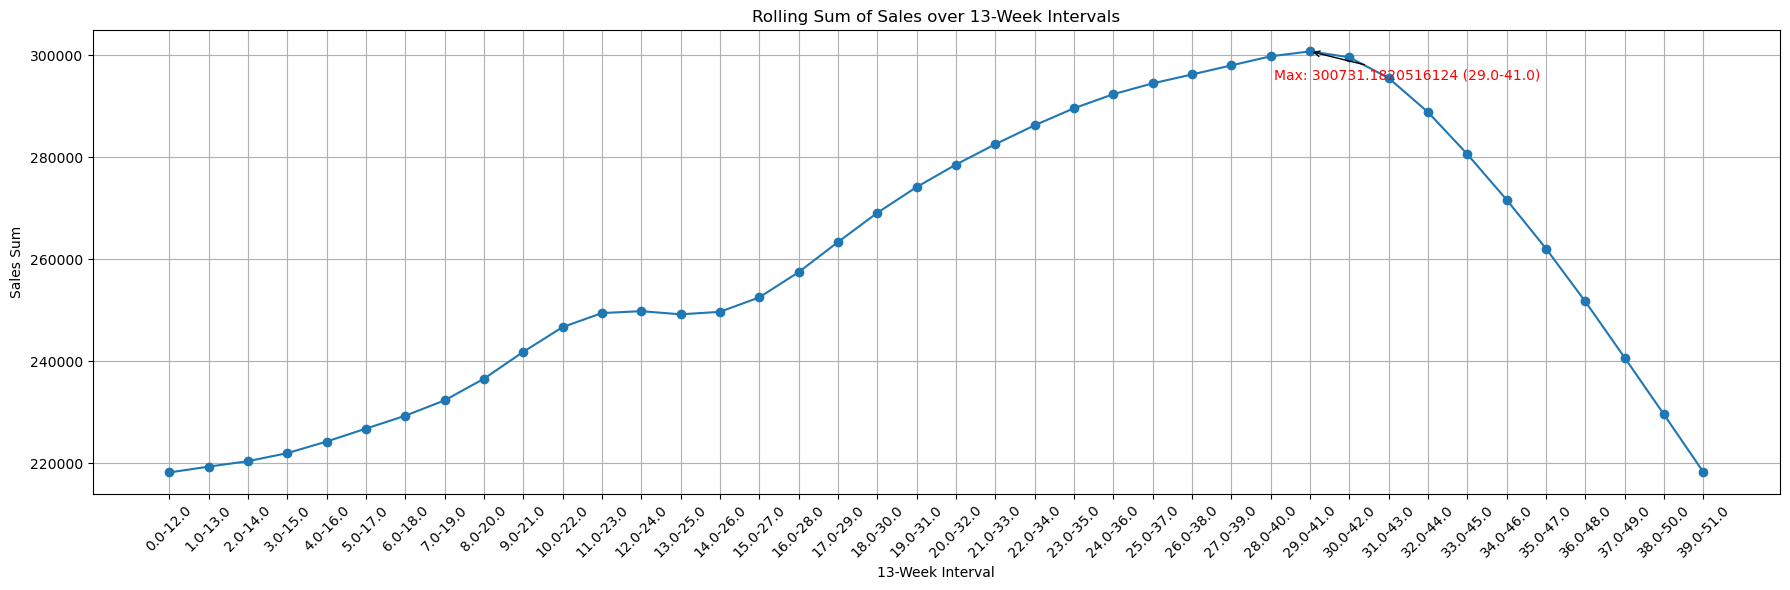

In [253]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = sales_sum[max_index]
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()

In [254]:
total_fil1_nw = weekly_forecast_data['yhat'].sum()
total_13_week_sum = rolling_sales_df[rolling_sales_df['13_WEEK_INTERVAL']== '29.0-41.0'].sum()['SALES_13W_SUM']
percentage = total_13_week_sum*100/total_fil1_nw
print(round(percentage,2))

30.62


Best 13 weeks accounts for 30.62% of the 1 year sales. Lets do the same for central region now:

In [255]:
central_fil_1 = central[(central['BRAND']=='GREETINGLE') & (central['CATEGORY']=='ING ENHANCED WATER')]
central_fil_1 = central_fil_1.groupby('DATE')['UNIT_SALES'].sum().reset_index()
central_fil_1.tail(1)

DATE  UNIT_SALES
147 2023-10-28     21070.0

The last date is 2023-10-28

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Initialize and fit the Prophet model
p_model_1 = Prophet()

cw_model_data1 = central_fil_1.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

p_model_1.fit(cw_model_data1)

# Create future dates for forecasting
future_1 = p_model_1.make_future_dataframe(periods=52, freq='W')

# Make predictions
forecast_1 = p_model_1.predict(future_1)

# Plot the forecast
plot_plotly(p_model_1, forecast_1)

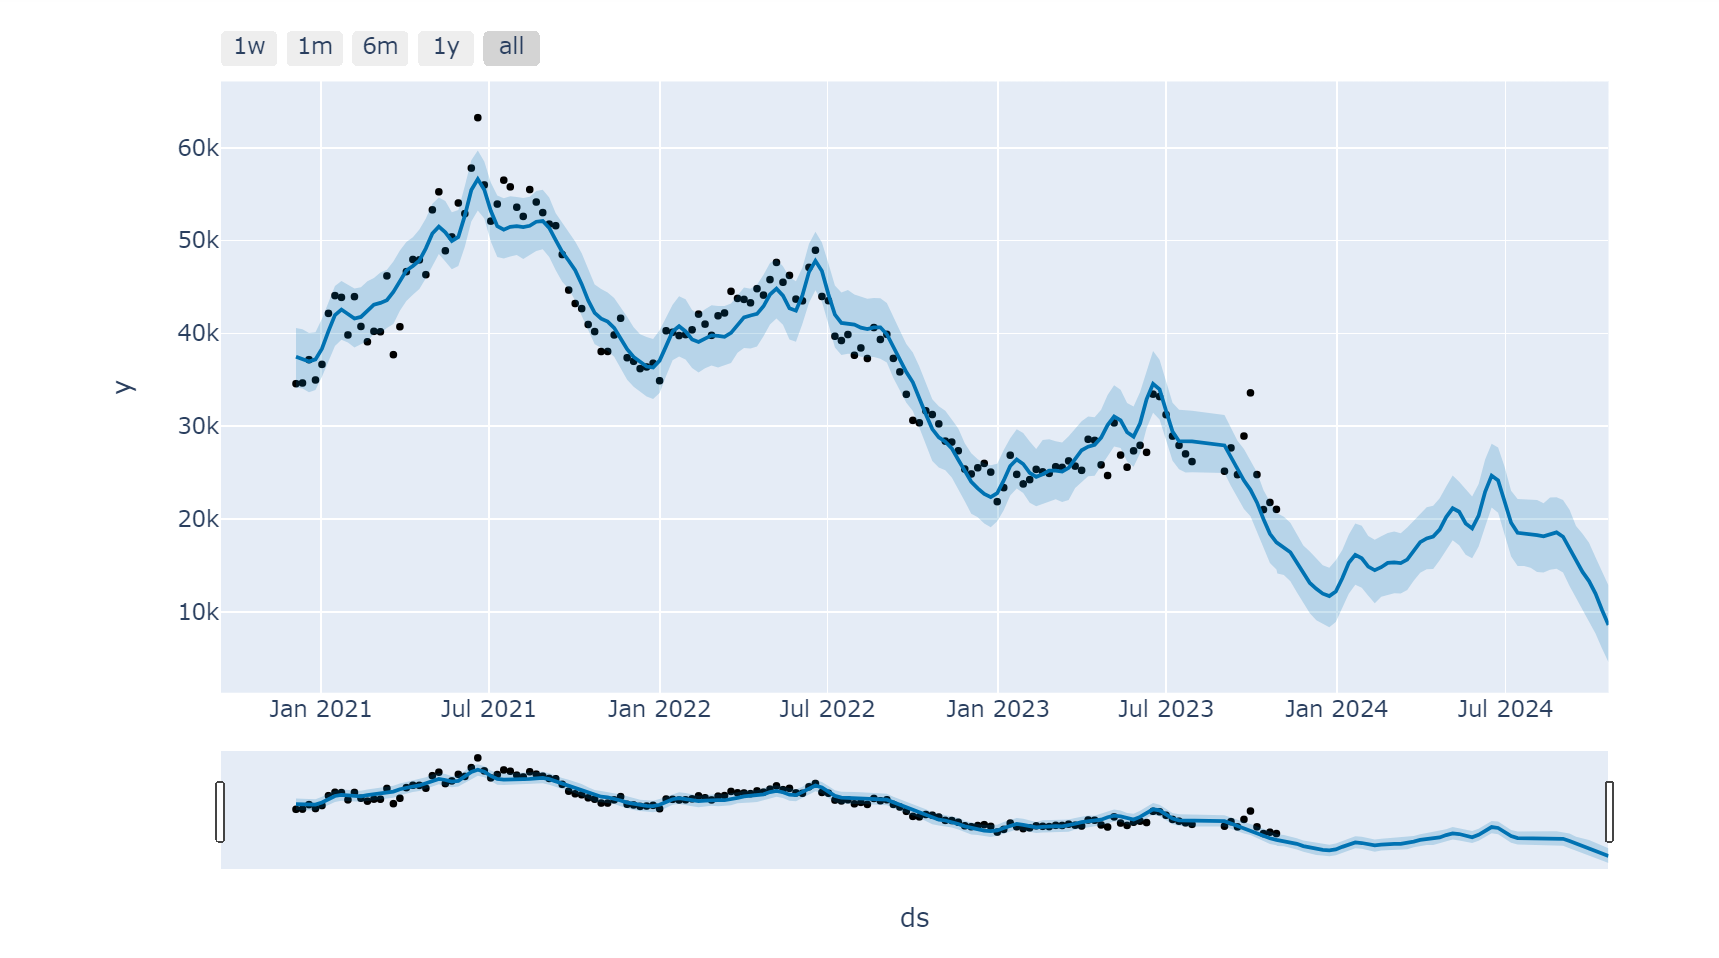

In [257]:
# week wise sales for best 13 weeks
cw_fil1_forecast_1year = forecast_1[forecast_1['ds'] > '2023-10-28']
earliest_date_1 = cw_fil1_forecast_1year['ds'].min()

# Step 2: Calculate week numbers
cw_fil1_forecast_1year['WEEK_NUMBER'] = ((cw_fil1_forecast_1year['ds'] - earliest_date_1).dt.days // 7) % 52
weekly_forecast_data_1 = cw_fil1_forecast_1year.groupby('WEEK_NUMBER')['yhat'].sum().reset_index()

In [258]:
# Ensure that there are enough rows to compute the rolling sum
if len(weekly_forecast_data_1) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_forecast_data_1) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_forecast_data_1.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_forecast_data_1.iloc[i]['WEEK_NUMBER']}-{weekly_forecast_data_1.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

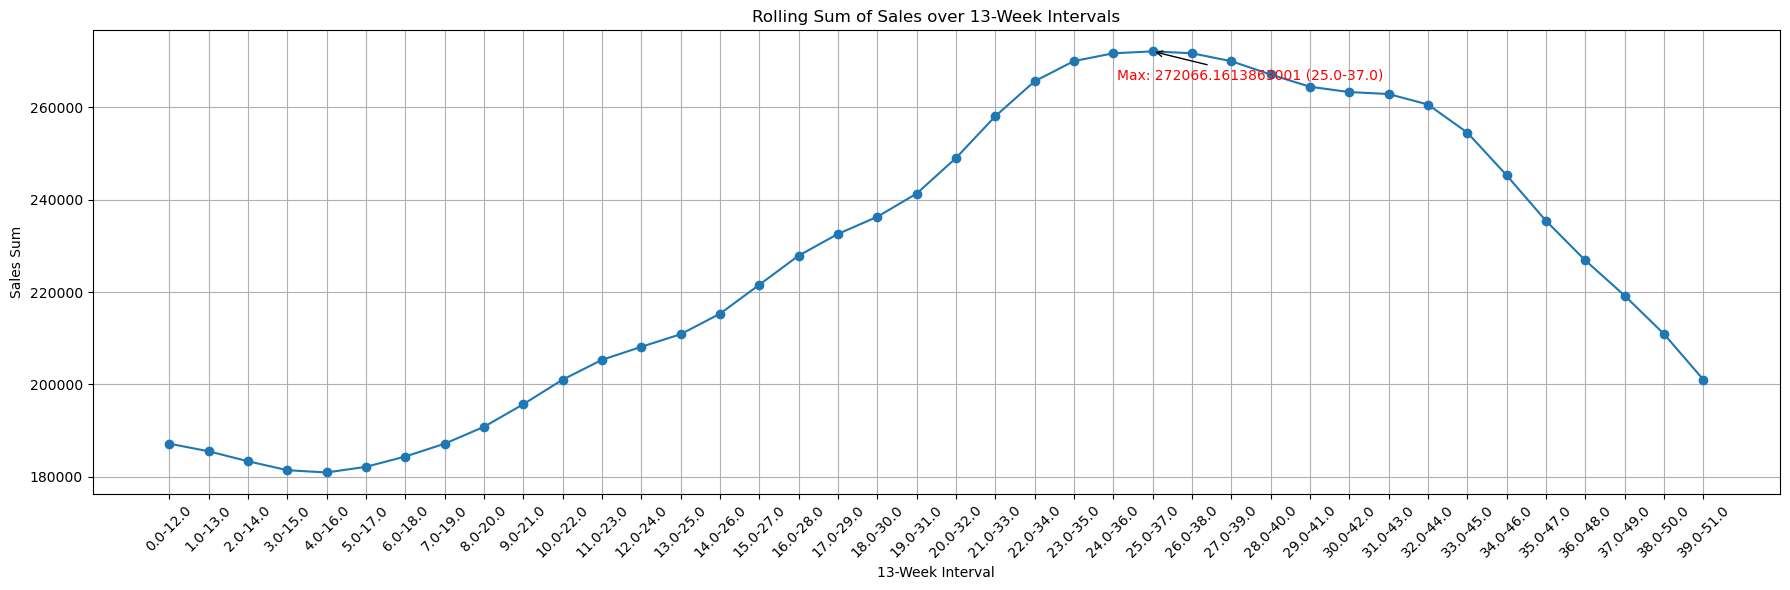

In [259]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = sales_sum[max_index]
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()

In [260]:
total_fil1_central = weekly_forecast_data_1['yhat'].sum()
total_13_week_sum_central = rolling_sales_df[rolling_sales_df['13_WEEK_INTERVAL']== '25.0-37.0'].sum()['SALES_13W_SUM']
percentage = total_13_week_sum_central*100/total_fil1_central
print(round(percentage,2))

31.24


Best 13 weeks accounts for 31.24% of the 1 year sales.

## Woodsy Yellow + Regular + Enh Water Filter Modelling

In [261]:
northwest = merged_data[merged_data['REGION'] == 'North West']
woodsy_yellow = northwest[(northwest['ITEM'].str.contains('WOODSY  YELLOW ', case=False, regex=True))]
woodsy_yellow_regular = woodsy_yellow[woodsy_yellow['CALORIC_SEGMENT'] == 'REGULAR']
woodsy_yellow_regular_enhanced_water = woodsy_yellow_regular[woodsy_yellow_regular['CATEGORY'] == 'ING ENHANCED WATER']

In [262]:
woodsy_yellow_regular_enhanced_water['MANUFACTURER'].value_counts()

MANUFACTURER
COCOS    12285
Name: count, dtype: int64

In [263]:
northwest_woodsy = woodsy_yellow_regular_enhanced_water.groupby('DATE')['UNIT_SALES'].sum().reset_index()
northwest_woodsy.tail(1)

DATE  UNIT_SALES
147 2023-10-28      9717.0

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Initialize and fit the Prophet model
p_model_3 = Prophet()

northwest_woodsy = northwest_woodsy.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

p_model_3.fit(northwest_woodsy)

# Create future dates for forecasting
future_3 = p_model_3.make_future_dataframe(periods=52, freq='W')

# Make predictions
forecast_3 = p_model_3.predict(future_3)

# Plot the forecast
plot_plotly(p_model_3, forecast_3)

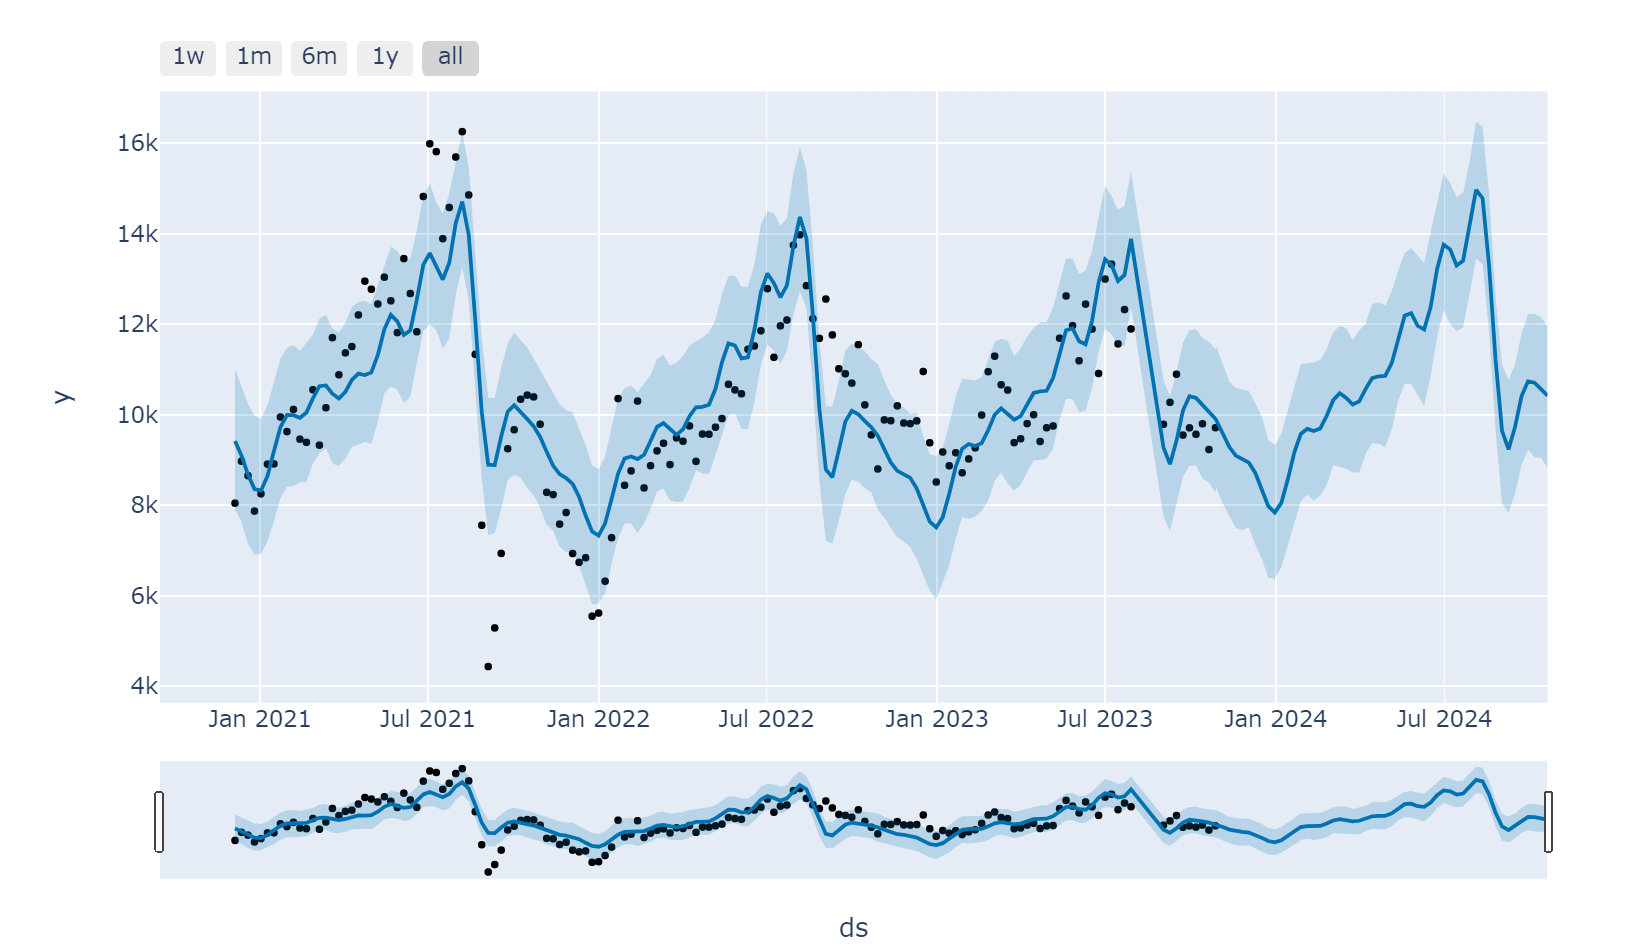

In [265]:
# week wise sales for best 13 weeks
northwest_woodsy_forecast_1year = forecast_3[forecast_3['ds'] > '2023-10-28']
earliest_date_4 = northwest_woodsy_forecast_1year['ds'].min()

# Step 2: Calculate week numbers
northwest_woodsy_forecast_1year['WEEK_NUMBER'] = ((northwest_woodsy_forecast_1year['ds'] - earliest_date_4).dt.days // 7) % 52
weekly_forecast_data_northwest_woodsy = northwest_woodsy_forecast_1year.groupby('WEEK_NUMBER')['yhat'].sum().reset_index()

In [266]:
# Ensure that there are enough rows to compute the rolling sum
if len(weekly_forecast_data_northwest_woodsy) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_forecast_data_northwest_woodsy) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_forecast_data_northwest_woodsy.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_forecast_data_northwest_woodsy.iloc[i]['WEEK_NUMBER']}-{weekly_forecast_data_northwest_woodsy.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

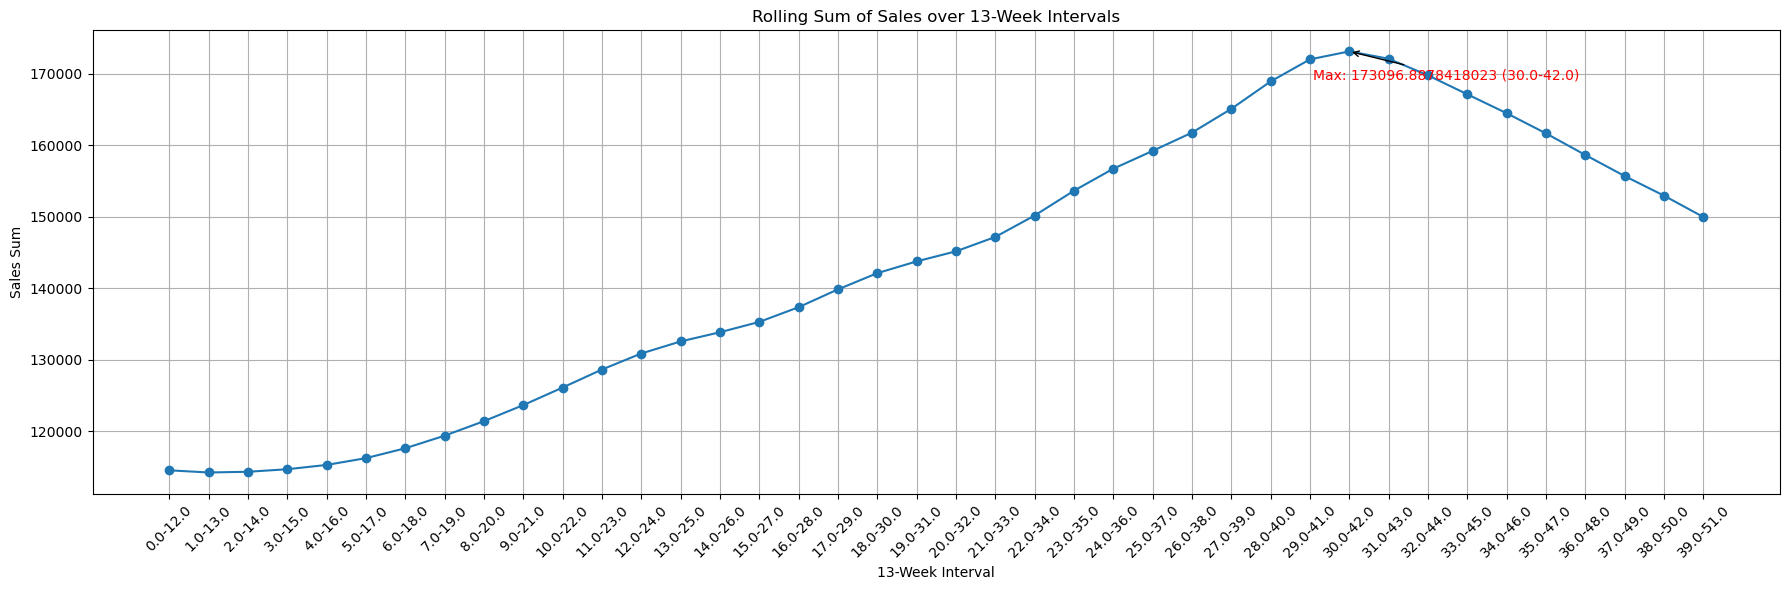

In [267]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = sales_sum[max_index]
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()

In [268]:
total_fil1_northwest_woodsy = weekly_forecast_data_northwest_woodsy['yhat'].sum()
total_13_week_sum_northwest_woodsy = rolling_sales_df[rolling_sales_df['13_WEEK_INTERVAL']== '30.0-42.0'].sum()['SALES_13W_SUM']
percentage = total_13_week_sum_northwest_woodsy*100/total_fil1_northwest_woodsy
print(round(percentage,2))

30.98


Best 13 weeks accounts for 30.98% of the 1 year sales. Lets do the same for Central region and South regions

In [269]:
central = merged_data[merged_data['REGION'] == 'Central']
woodsy_yellow_central = central[(central['ITEM'].str.contains('WOODSY  YELLOW ', case=False, regex=True))]
woodsy_yellow_central_regular = woodsy_yellow_central[woodsy_yellow_central['CALORIC_SEGMENT'] == 'REGULAR']
woodsy_yellow_central_regular_enhanced_water = woodsy_yellow_central_regular[woodsy_yellow_central_regular['CATEGORY'] == 'ING ENHANCED WATER']

In [270]:
woodsy_yellow_central_regular_enhanced_water['MANUFACTURER'].value_counts()

MANUFACTURER
COCOS    11438
Name: count, dtype: int64

In [271]:
central_woodsy = woodsy_yellow_central_regular_enhanced_water.groupby('DATE')['UNIT_SALES'].sum().reset_index()
central_woodsy.tail(1)

DATE  UNIT_SALES
147 2023-10-28      7127.0

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Initialize and fit the Prophet model
p_model_4 = Prophet()

central_woodsy = central_woodsy.rename(columns={'DATE': 'ds', 'UNIT_SALES': 'y'})

p_model_4.fit(central_woodsy)

# Create future dates for forecasting
future_5 = p_model_4.make_future_dataframe(periods=52, freq='W')

# Make predictions
forecast_5 = p_model_4.predict(future_5)

# Plot the forecast
plot_plotly(p_model_4, forecast_5)

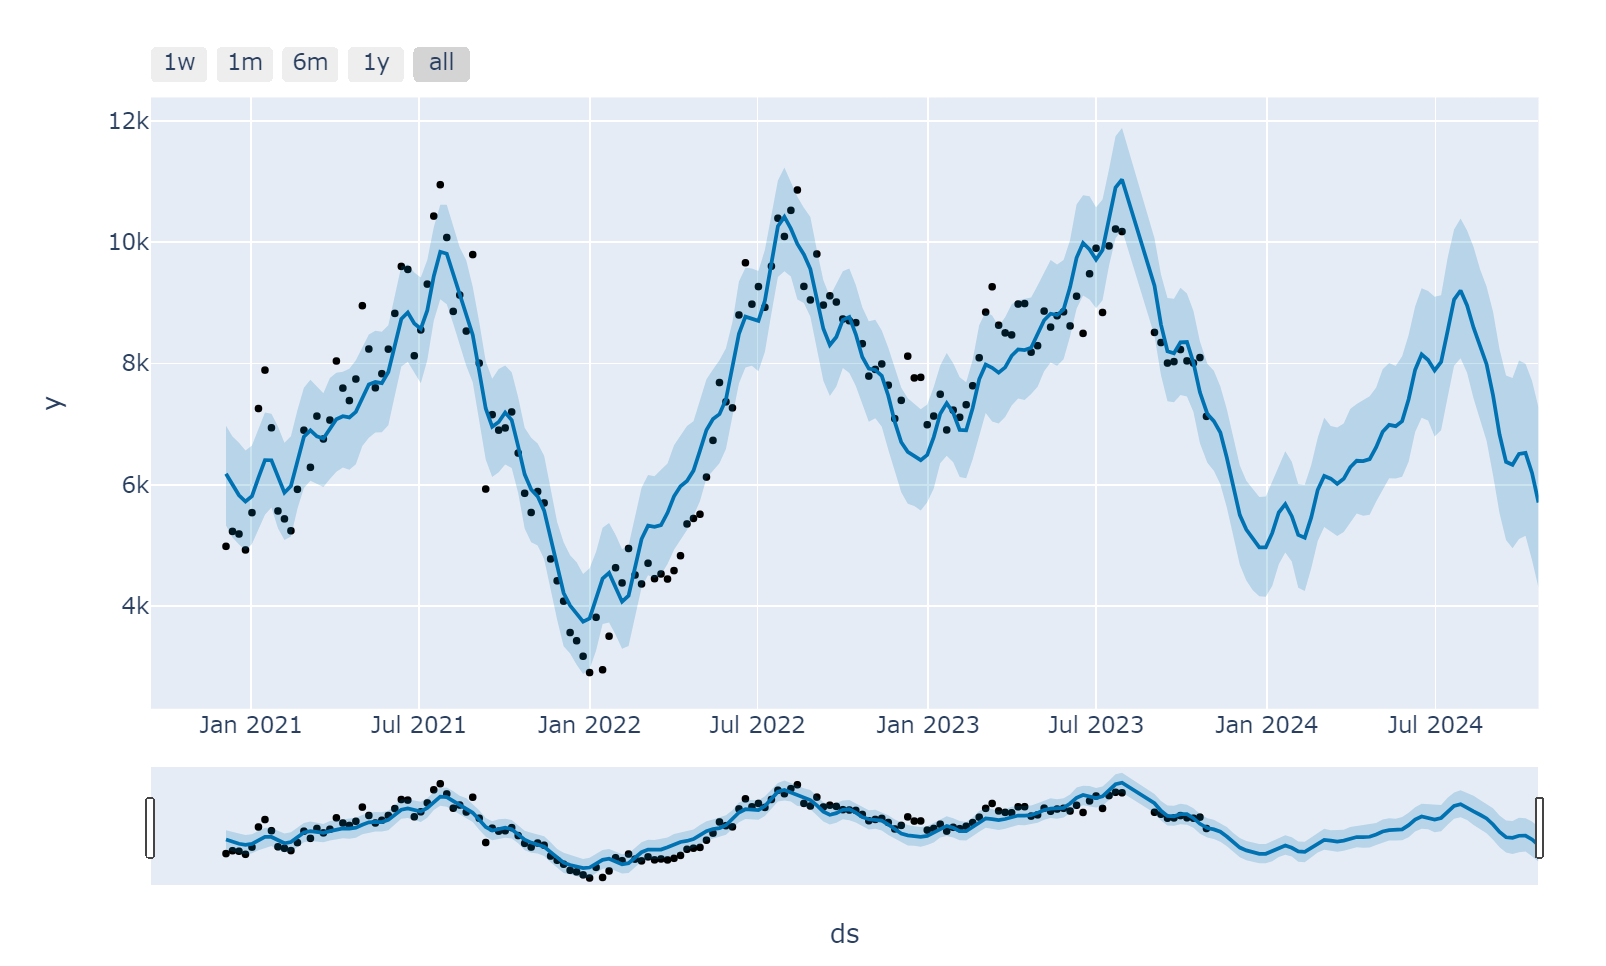

In [273]:
# week wise sales for best 13 weeks
central_woodsy_forecast_1year = forecast_5[forecast_5['ds'] > '2023-10-28']
earliest_date_6 = central_woodsy_forecast_1year['ds'].min()

# Step 2: Calculate week numbers
central_woodsy_forecast_1year['WEEK_NUMBER'] = ((central_woodsy_forecast_1year['ds'] - earliest_date_6).dt.days // 7) % 52
weekly_forecast_data_central_woodsy = central_woodsy_forecast_1year.groupby('WEEK_NUMBER')['yhat'].sum().reset_index()

In [274]:
# Ensure that there are enough rows to compute the rolling sum
if len(weekly_forecast_data_central_woodsy) < 13:
    print("Insufficient data to compute rolling sum.")
else:
    # Initialize an empty list to store the results
    rolling_sales_sum = []

    # Iterate over the DataFrame to calculate the rolling sum for each 13-week interval
    for i in range(len(weekly_forecast_data_central_woodsy) - 12):
        # Calculate the sum of UNIT_SALES for the current 13-week interval
        sales_sum = weekly_forecast_data_central_woodsy.loc[i:i+12, 'yhat'].sum()
        # Construct the 13-week interval string
        interval = f"{weekly_forecast_data_central_woodsy.iloc[i]['WEEK_NUMBER']}-{weekly_forecast_data_central_woodsy.iloc[i+12]['WEEK_NUMBER']}"
        # Append the result to the list
        rolling_sales_sum.append((sales_sum, interval))

    # Create a new DataFrame from the results
    rolling_sales_df = pd.DataFrame(rolling_sales_sum, columns=['SALES_13W_SUM', '13_WEEK_INTERVAL'])

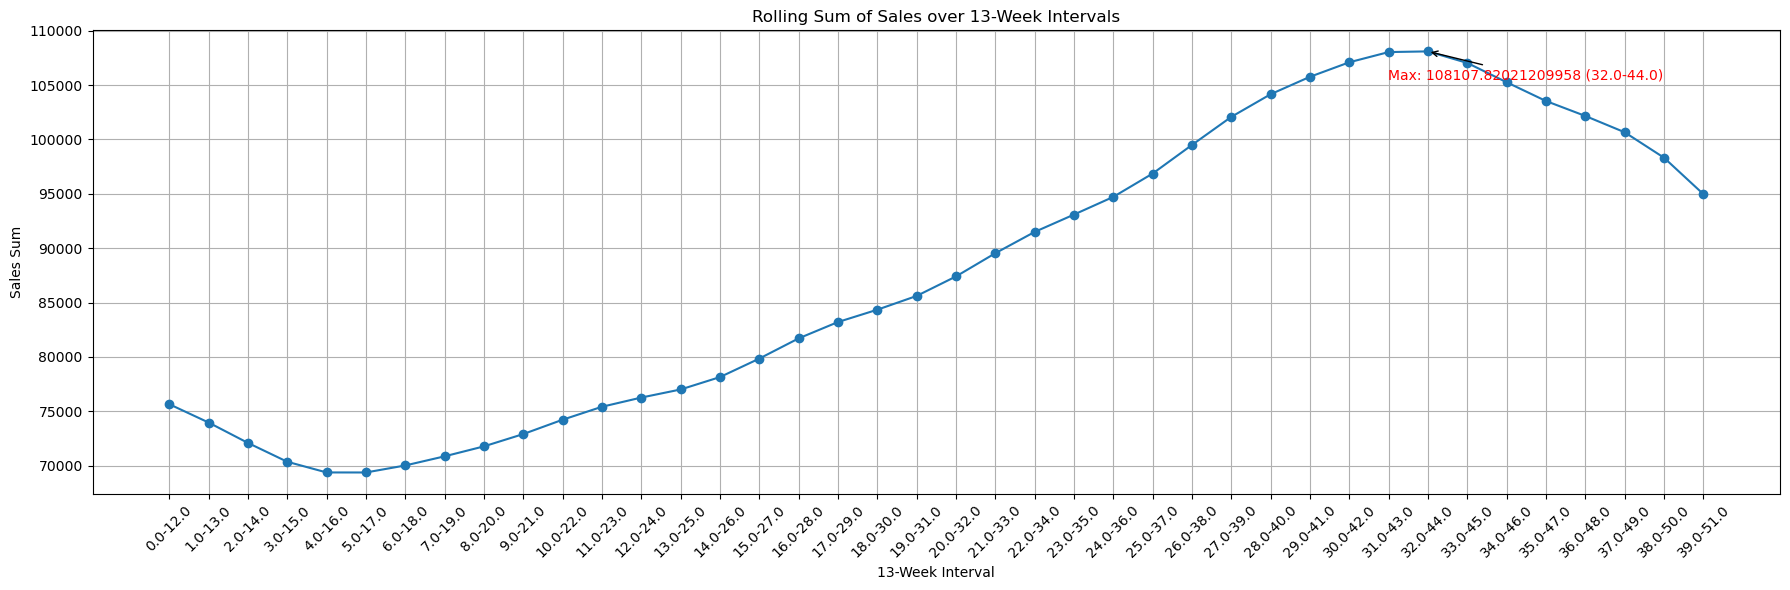

In [275]:
import matplotlib.pyplot as plt

# Assuming rolling_sales_df contains the DataFrame with 'SALES_13W_SUM' and '13_WEEK_INTERVAL' columns

# Extract data for plotting
sales_sum = rolling_sales_df['SALES_13W_SUM']
interval = rolling_sales_df['13_WEEK_INTERVAL']

# Plot the rolling sum
plt.figure(figsize=(18, 6))
plt.plot(interval, sales_sum, marker='o', linestyle='-')
plt.xlabel('13-Week Interval')
plt.ylabel('Sales Sum')
plt.title('Rolling Sum of Sales over 13-Week Intervals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Find the index of the maximum value
max_index = sales_sum.idxmax()
max_value = sales_sum[max_index]
max_interval = interval[max_index]

# Annotate the peak with a red marker and the corresponding 13-week interval
plt.annotate(f'Max: {max_value} ({max_interval})',
             xy=(max_interval, max_value),
             xytext=(70, -20),
             textcoords='offset points',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color='red',
             ha='center')

plt.tight_layout()
plt.show()



In [276]:
total_fil1_central_woodsy = weekly_forecast_data_central_woodsy['yhat'].sum()
total_13_week_sum_northwest_central = rolling_sales_df[rolling_sales_df['13_WEEK_INTERVAL']== '32.0-44.0'].sum()['SALES_13W_SUM']
percentage = total_13_week_sum_northwest_central*100/total_fil1_central_woodsy
print(round(percentage,2))

31.14


Best 13 weeks accounts for 31.14% of the 1 year sales. Lets do the same for central region now:

In [277]:
import pandas as pd

data = {
    'Region': ['NorthWest', 'Central', 'NorthWest', 'Central'],
    'Filter': ['Brand  + Category', 'Brand  + Category ', 'Flavor + Caloric + Category ', 'Flavor  + Caloric + Category '],
    'Best 13 Weeks (Forecasted)': ['29 - 41', '25 - 37', '30 - 42', '32 - 44'],
    'Absolute Value (Unit Sales)': [300731, 272066, 173096, 108107],
    'Absolute Value Percentage for total weeks': ['30.62%', '31.24%', '30.98%', '31.14%']
}

df = pd.DataFrame(data)

df


Region                         Filter Best 13 Weeks (Forecasted)  Absolute Value (Unit Sales) Absolute Value Percentage for total weeks
0  NorthWest              Brand  + Category                    29 - 41                       300731                                    30.62%
1    Central             Brand  + Category                     25 - 37                       272066                                    31.24%
2  NorthWest   Flavor + Caloric + Category                     30 - 42                       173096                                    30.98%
3    Central  Flavor  + Caloric + Category                     32 - 44                       108107                                    31.14%

- Based on the filters we see NorthWest constituting highest sales. 
- Now there is brand + category and flavor + caloric and category.
- Since flavor is important we consider the results of second filter.
- The product could be launched in Northwest region with expected sales for the forecasted year to be around 173k with the best 13 weeks is 30 - 42.

<h1> Q7 </h1> <a name="Q7_Modelling"></a>



Item Description: Peppy Gentle Drink Pink Woodsy .5L Multi Jug
- Caloric Segment: Regular
- Type: SSD
- Manufacturer: Swire-CC
- Brand: Peppy
- Package Type: .5L Multi Jug
- Flavor: ‘Pink Woodsy’

Swire plans to release this product in the Southern region for 13 weeks. What will the forecasted demand be, in weeks, for this product?

## Data Preparation

In [3]:
southern_keys = [
    259, 260, 524, 272, 531, 277, 534, 535, 793, 794, 799, 801, 294, 807, 44,
    557, 310, 825, 316, 831, 323, 585, 849, 862, 866, 867, 358, 365, 622, 367,
    882, 891, 893, 895, 900, 913, 409, 673, 674, 939, 179, 949, 951, 952, 953,
    197, 967, 205, 210, 979, 212, 980, 981, 216, 729, 220, 733, 478, 739, 743,
    746, 748, 238, 754, 759, 766
]

# Filter the DataFrame
southern = market_demand[market_demand['MARKET_KEY'].isin(southern_keys)]

In [4]:
peppy = southern[(southern['BRAND'].str.contains('peppy', case=False, regex=True))]
peppy_regular = peppy[(peppy['CALORIC_SEGMENT'].str.contains('Regular', case=False, regex=True))]
peppy_regular_ssd = peppy_regular[(peppy_regular['CALORIC_SEGMENT'].str.contains('Regular', case=False, regex=True))]
peppy_regular_ssd_multi_jug = peppy_regular_ssd[(peppy_regular_ssd['PACKAGE'].str.contains('Multi Jug', case=False, regex=True))]

In [5]:
df = peppy_regular_ssd_multi_jug[['DATE','UNIT_SALES']].groupby(by="DATE", as_index=False).sum()
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df = df.asfreq('W-SAT')

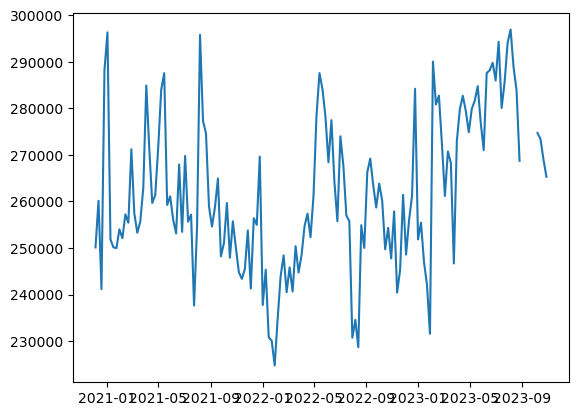

In [6]:
plt.plot(df)

There are NAN in some weeks. as we dig deeper we see that there are no sale on the month of august 2023.

In [7]:
# Train and Test periods
from datetime import datetime

s_date = '2023-06-03'
e_date = '2023-08-26'
df = df.loc[df.index <= e_date]
train_period = df.loc[df.index < s_date]
test_period = df.loc[(df.index >= s_date) & (df.index <= e_date)]


start_forecast = datetime.strptime(s_date, '%Y-%m-%d').date()
end_forecast = datetime.strptime(e_date, '%Y-%m-%d').date()

# Model Performance Metrics Function

We will create and resuse this function to measure each models performance with the data. This will include MAE, MSE, RMSE, MAPE and direct accuracy percentage.

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np

def get_scores(actual, predicted):
    # Calculate errors
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = sqrt(mse)
    percentage_diff = np.abs((actual - predicted) / actual) * 100

    # Calculate MAPE
    mape = percentage_diff.mean()

    # Calculate "Accuracy" Percentage
    accuracy_percentage = 100 - mape

    # Print metrics
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}%")
    print(f"Direct 'Accuracy' Percentage: {accuracy_percentage}%")

    return pd.Series(data={'mae':mae, 'mse':mse, 'rmse':rmse, 'mape':mape, 'direct_accuracy':accuracy_percentage}, index=['mae', 'mse', 'rmse','mape','direct_accuracy'])

## ARIMA

ARIMA is a statistical model used for time series analysis to forecast future data points by leveraging past data. It combines three main aspects: autoregression (AR), differencing (I) to make the time series stationary, and moving average (MA). The AR part exploits the relationship between an observation and a number of lagged observations, the I part involves differencing the data to achieve stationarity, and the MA part models the error of the observation as a combination of previous error terms.

In [9]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model fitting
order = (2, 1, 2)  # Still (p, d, q)

model = ARIMA(train_period['UNIT_SALES'], order=order)
model_fit = model.fit()

# Forecasting
forecast = model_fit.predict(start=start_forecast,
                             end=end_forecast)

arima_forecast = forecast

In [10]:
arima_score = get_scores(test_period.squeeze(), arima_forecast)

MAE: 10610.921900092897
MSE: 133607735.47205538
RMSE: 11558.881237907732
MAPE: 3.682049809516563%
Direct 'Accuracy' Percentage: 96.31795019048344%


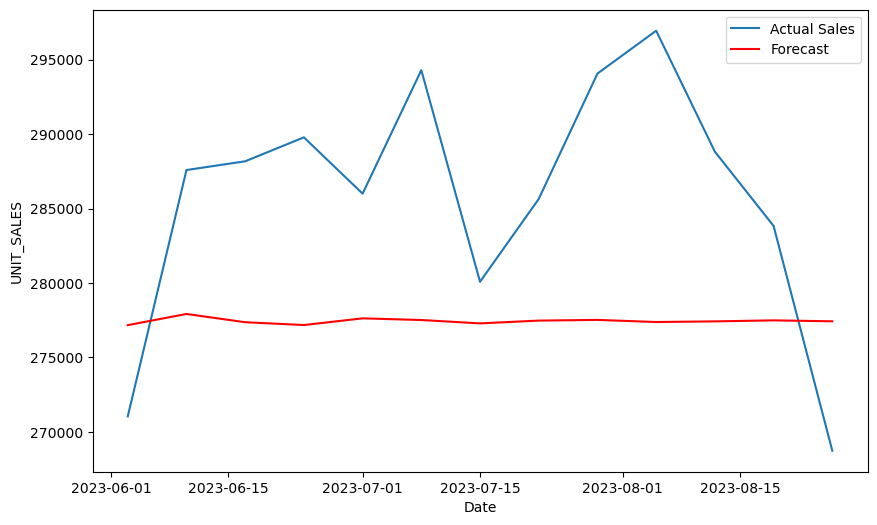

In [11]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_period['UNIT_SALES'], label='Actual Sales')
plt.plot(arima_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

## SARIMA

SARIMA extends ARIMA by explicitly accommodating and modeling seasonal effects in time series data. It includes additional seasonal elements on top of the AR, I, and MA components.
SARIMA is characterized by its ability to model both non-seasonal and seasonal components of the time series data, making it more versatile than ARIMA for data with clear seasonal patterns, such as sales data around specific holidays or events.
It incorporates additional parameters to handle seasonality, which are seasonal AR, seasonal differencing, and seasonal MA components, allowing it to capture seasonal fluctuations effectively, making it ideal for products with seasonal demand.

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# SARIMA Model fitting
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 52)  # (P, D, Q, s)

model = SARIMAX(train_period['UNIT_SALES'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Forecasting
forecast = model_fit.predict(start=start_forecast.strftime('%Y-%m-%d'),
                             end=end_forecast.strftime('%Y-%m-%d'))
sarima_forecast = forecast

C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [13]:
sarima_score = get_scores(test_period.squeeze(), sarima_forecast)

MAE: 24348.214490805636
MSE: 801042551.4448053
RMSE: 28302.695126874496
MAPE: 8.420642444814801%
Direct 'Accuracy' Percentage: 91.5793575551852%


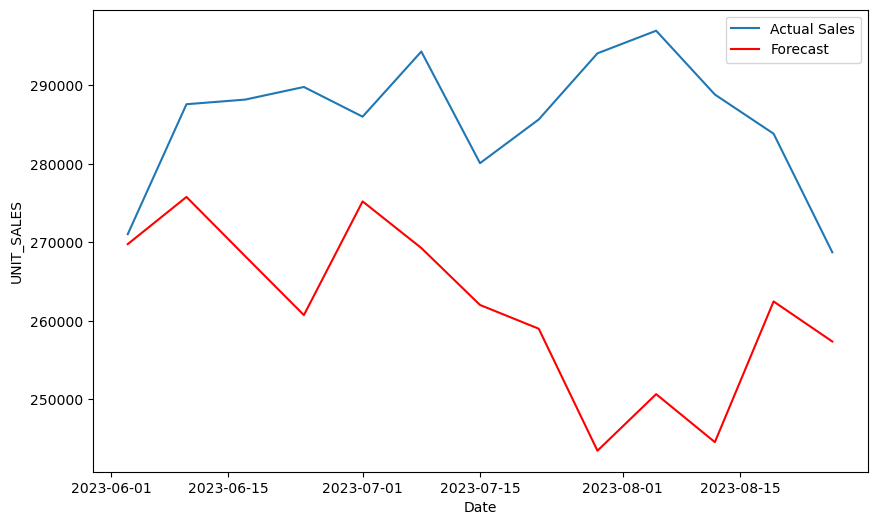

In [14]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_period['UNIT_SALES'], label='Actual Sales')
plt.plot(sarima_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

## Prophet

Prophet is a forecasting tool designed by Facebook for handling time series data that displays patterns on different time scales such as yearly, weekly, and daily. It is especially useful for data with strong seasonal effects and several seasons of historical data.
Prophet works by fitting nonlinear trends with yearly, weekly, and daily seasonality, plus holiday effects. It is robust to missing data and shifts in the trend, and typically requires no manual tuning of parameters.
The model accommodates seasonality through Fourier series and includes components for holidays and special events, making it well-suited for predicting demand for products around specific events or holidays, like Easter.

In [15]:
from prophet import Prophet

df_mod = train_period.reset_index()
df_mod['DATE'] = pd.to_datetime(df_mod['DATE'])
df_mod.columns = ['ds', 'y']

model = Prophet(changepoint_prior_scale=0.1,seasonality_prior_scale=0.5, weekly_seasonality=True)
model.fit(df_mod)

# Forecast the next 52 weeks (1 year)
future = model.make_future_dataframe(periods=53, freq='W-SAT')
forecast = model.predict(future)

prophet_forecast = forecast[['ds','yhat']]
prophet_forecast['ds'] = pd.to_datetime(prophet_forecast['ds'])
prophet_forecast.columns = ['DATE', 'yhat']
prophet_forecast.set_index('DATE', inplace=True)
prophet_forecast = prophet_forecast.asfreq('W-SAT')
prophet_forecast = prophet_forecast.loc[(prophet_forecast.index >= s_date) & (prophet_forecast.index <= e_date)]

20:33:03 - cmdstanpy - INFO - Chain [1] start processing
20:33:03 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_19324\2900712443.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_forecast['ds'] = pd.to_datetime(prophet_forecast['ds'])


In [16]:
prophet_score = get_scores(test_period.squeeze(), prophet_forecast.loc[(prophet_forecast.index >= s_date) & (prophet_forecast.index <= e_date)].squeeze())

MAE: 14082.66495499823
MSE: 257837638.2131654
RMSE: 16057.32350714668
MAPE: 4.88229507297955%
Direct 'Accuracy' Percentage: 95.11770492702045%


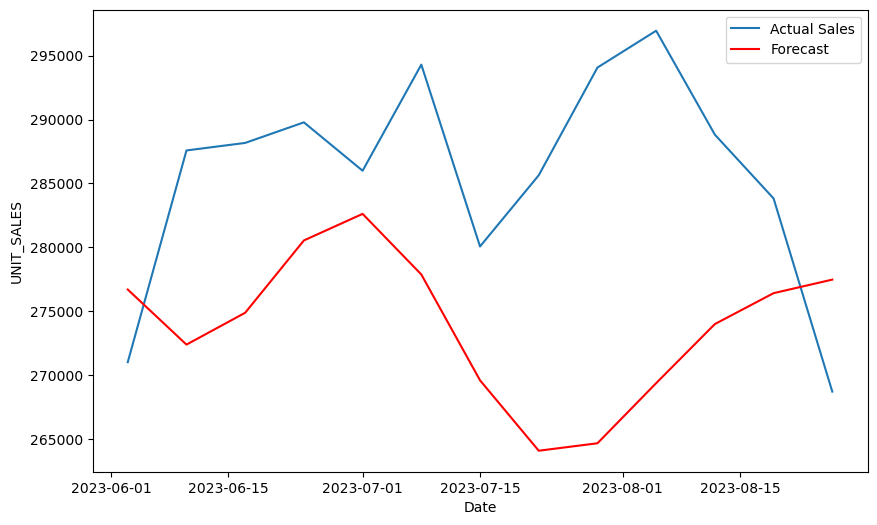

In [17]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_period['UNIT_SALES'], label='Actual Sales')
plt.plot(prophet_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

## Exponential Smoothing

Exponential Smoothing is a time series forecasting method for univariate data that applies smoothing factors to the observations, giving more weight to recent observations while not discarding older observations entirely.
It encompasses simple exponential smoothing for data with no clear trend or seasonality, and extends to Holt’s linear trend model and Holt-Winters’ seasonal model, which can account for both trends and seasonality in the data.
This method is straightforward and computationally efficient, making it a good choice for producing quick forecasts in situations where data patterns are reasonably consistent over time, but may struggle with data that has complex patterns or significant irregularities.

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ExponentialSmoothing Model fitting
model = ExponentialSmoothing(train_period['UNIT_SALES'], trend='add', seasonal='add', seasonal_periods=52).fit(smoothing_level=0.6, smoothing_slope=0.2, smoothing_seasonal=0.2)

# Forecasting

forecast_periods = ((end_forecast - start_forecast).days // 7) + 1

exponential_forecast = model.forecast(forecast_periods)

forecast_dates = pd.date_range(start=start_forecast, periods=forecast_periods, freq='W-SAT')

C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_19324\176272646.py:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(train_period['UNIT_SALES'], trend='add', seasonal='add', seasonal_periods=52).fit(smoothing_level=0.6, smoothing_slope=0.2, smoothing_seasonal=0.2)
C:\Users\Michael Mendoza\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [19]:
exponential_smoothing_score = get_scores(test_period.squeeze(), exponential_forecast)

MAE: 23907.5251431621
MSE: 744489010.3472316
RMSE: 27285.325916089616
MAPE: 8.281600968319658%
Direct 'Accuracy' Percentage: 91.71839903168035%


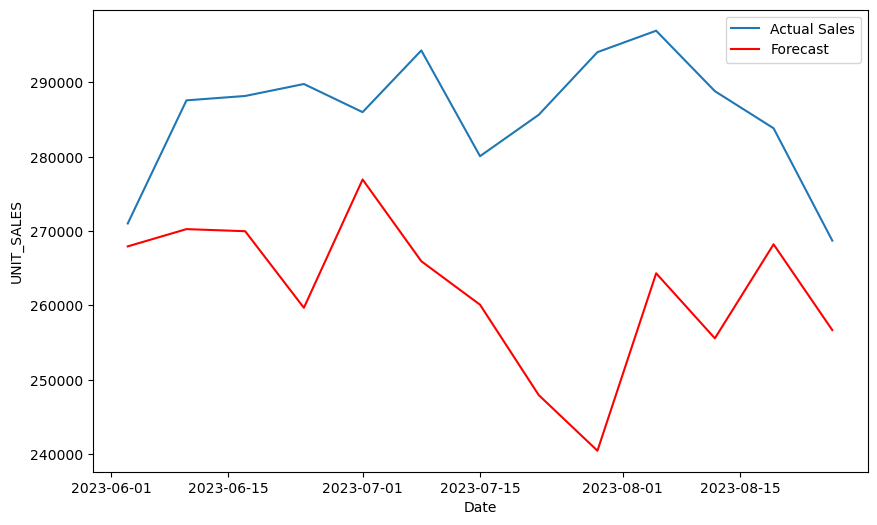

In [20]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_period['UNIT_SALES'], label='Actual Sales')
plt.plot(exponential_forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('UNIT_SALES')
plt.legend()
plt.show()

## Performance Summary

In [21]:
pd.options.display.float_format = '{:.2f}'.format
q2_scores = pd.DataFrame({'Arima':arima_score, 'Sarima':sarima_score, 'Prophet':prophet_score, 'Exponential Smoothing':exponential_smoothing_score}).T
print(q2_scores)

                           mae          mse     rmse  mape  direct_accuracy
Arima                 10610.92 133607735.47 11558.88  3.68            96.32
Sarima                24348.21 801042551.44 28302.70  8.42            91.58
Prophet               14082.66 257837638.21 16057.32  4.88            95.12
Exponential Smoothing 23907.53 744489010.35 27285.33  8.28            91.72


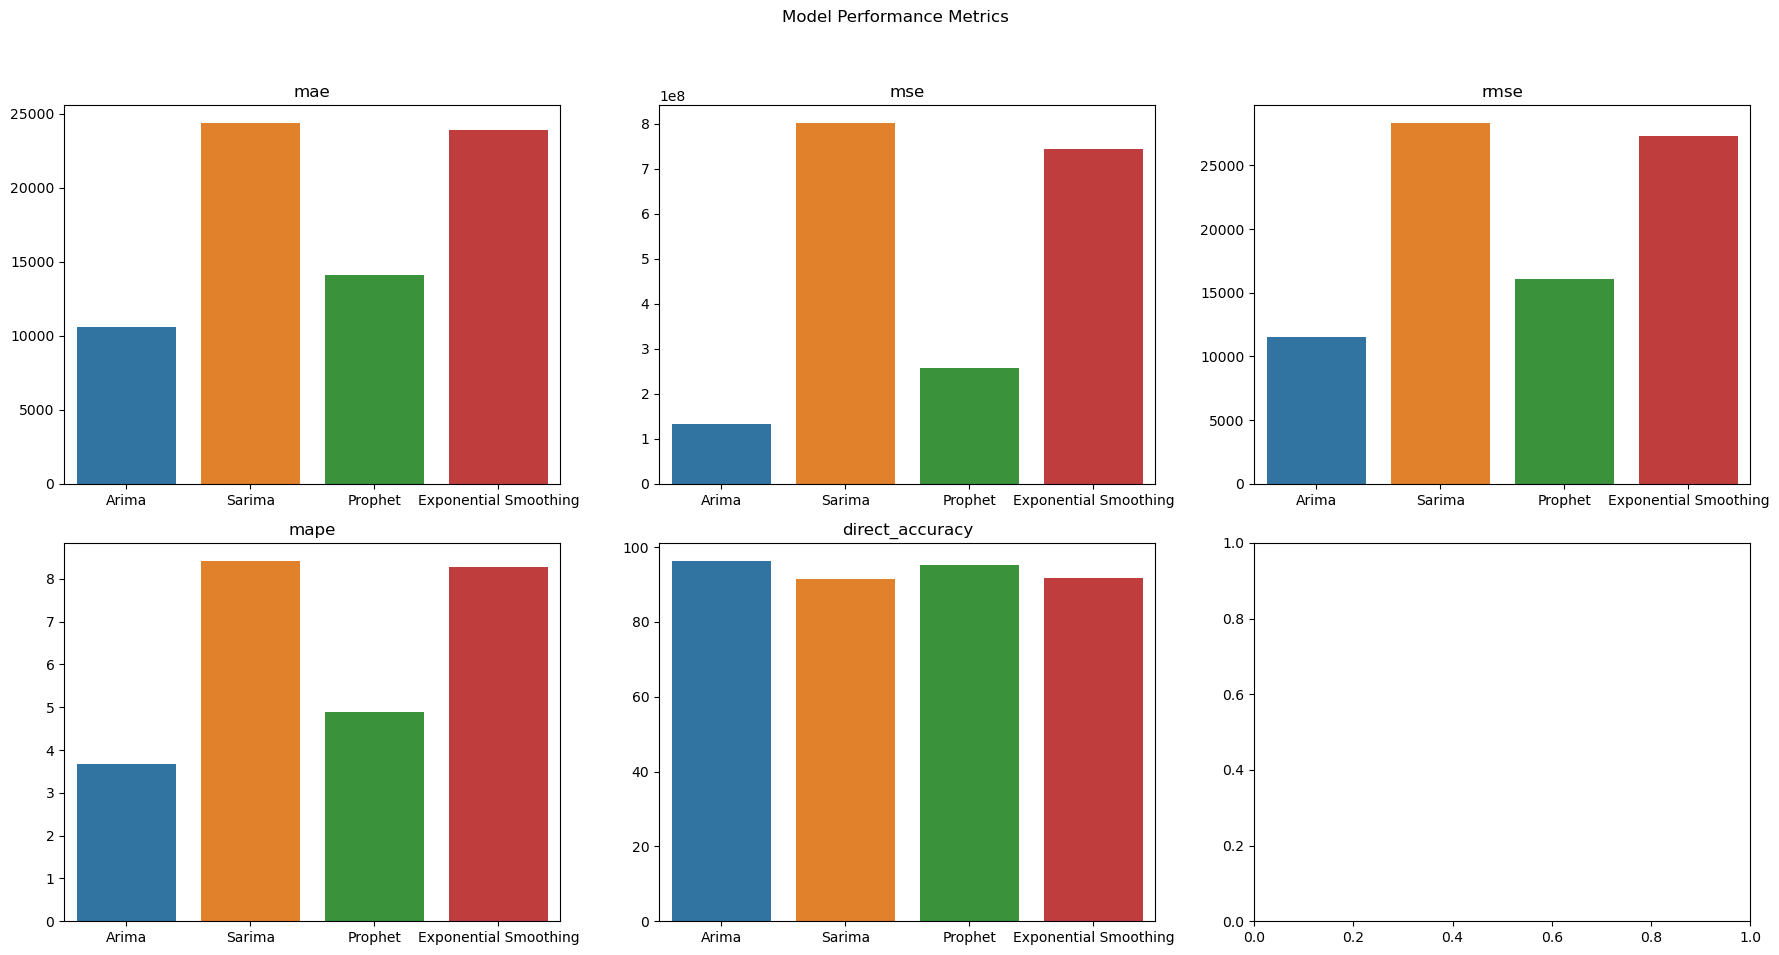

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Model Performance Metrics')

for i, column in enumerate(q2_scores.columns):
    row, col = divmod(i, 3)
    sns.barplot(ax=axes[row, col], x=q2_scores.index, y=q2_scores[column])
    axes[row, col].set_title(column)
    axes[row, col].set_ylabel('')  # Removing the y-label for cleanliness

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Based on the updated metrics, the Prophet model appears to be the most suitable choice for this scenario, especially when considering the graph resemblance to actual values as a crucial criterion. Although its MAE, MSE, and RMSE values are not the lowest among the compared models, they indicate a reasonable accuracy level in predictions close to the actual values. The Prophet model's MAPE is relatively low, suggesting that its predictions' percentage errors are acceptable, contributing to its overall forecast reliability. Furthermore, its Direct Accuracy is impressively high, only slightly below the highest, showcasing its effectiveness in closely matching the actual trends. Given the importance of graph resemblance to actuals for this analysis, the Prophet model, with its balance between statistical accuracy and visual trend matching, is deemed the most appropriate choice.

## Predicting Easter 2024 using Prophet

In [23]:
df = peppy_regular_ssd_multi_jug[['DATE','UNIT_SALES']].groupby(by="DATE", as_index=False).sum()
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df = df.loc[df.index <= "2023-08-26"]
df = df.asfreq('W-SAT')

In [24]:
from prophet import Prophet

df_mod = df.reset_index()
df_mod['DATE'] = pd.to_datetime(df_mod['DATE'])
df_mod.columns = ['ds', 'y']

model = Prophet(changepoint_prior_scale=0.1,seasonality_prior_scale=0.5, weekly_seasonality=True)
model.fit(df_mod)

future = model.make_future_dataframe(periods=13, freq='W-SAT')
forecast = model.predict(future)

prophet_forecast = forecast[['ds','yhat','yhat_upper','yhat_lower']]
prophet_forecast['ds'] = pd.to_datetime(prophet_forecast['ds'])
prophet_forecast.columns = ['DATE', 'yhat','yhat_upper','yhat_lower']
prophet_forecast.set_index('DATE', inplace=True)
prophet_forecast = prophet_forecast.asfreq('W-SAT')
prophet_forecast = prophet_forecast.loc[(prophet_forecast.index >= "2023-09-02")]

20:33:04 - cmdstanpy - INFO - Chain [1] start processing
20:33:04 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_19324\963624670.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_forecast['ds'] = pd.to_datetime(prophet_forecast['ds'])


In [25]:
prophet_forecast

yhat  yhat_upper  yhat_lower
DATE                                        
2023-09-02 285476.40   298778.29   271838.69
2023-09-09 288354.50   300856.25   276032.32
2023-09-16 289057.31   302472.57   274802.73
2023-09-23 287248.53   300958.92   273797.52
2023-09-30 285106.30   298506.32   271294.70
2023-10-07 284271.78   298363.42   271306.87
2023-10-14 283922.05   297361.37   270622.10
2023-10-21 282352.50   296781.29   268788.65
2023-10-28 279677.03   294189.70   266454.82
2023-11-04 277865.93   290756.87   264269.66
2023-11-11 278087.04   290981.57   264992.78
2023-11-18 279119.81   293013.24   265333.38
2023-11-25 279277.11   293360.46   265840.58

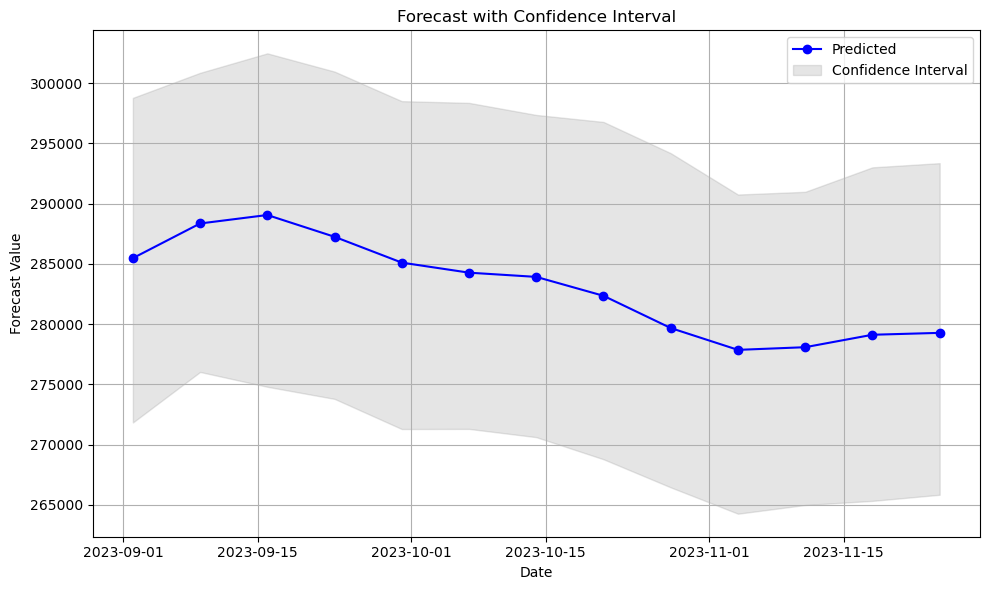

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(prophet_forecast.index, prophet_forecast['yhat'], label='Predicted', color='blue', marker='o')
plt.fill_between(prophet_forecast.index, prophet_forecast['yhat_lower'], prophet_forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.title('Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Forecast Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary

The forecasting analysis for Swire's upcoming beverage, the Peppy Gentle Drink in "Pink Woodsy" flavor, packaged in a .5L Multi Jug, focuses on the product's demand projection for a 13-week span around the Southern region's Easter 2024 period. The data was meticulously curated to match the product's attribute,, caloric segment, type, manufacturer, and packaging, from a comprehensive market demand dataset. This strategic approach allowed for an accurate representation and analysis relevant to the product's market introduction.

Seveted forecasting models were employed, including ARIMA, SARIMA, Prophet, and Exponential Smoothing, each evaluated against critical performance metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and Direct 'Accuracy' Percentage. These metrics provided a comprehensive assessment of each model's accuracy and reliability in predicting future sales demand.

The Prophet model emerged as the most fitting choice for this specific forecasting task. While its MAE, MSE, and RMSE values did not register as the absolute lowest among the models evaluated, they were nonetheless indicative of a commendably high level of prediction accuracy. The Prophet model's relatively low MAPE and high Direct Accuracy Percentage further affirmed its efficacy in closely mirroring actual sales trends, a crucial factor for this analysis.

The demand forecast through the Prophet model reveals an anticipated fluctuation in sales over the target period, with projections highlighting key trends and potential peak demand times around Easter 2024. This predictive insight is invaluable for Swire in strategizing production, inventory, and marketing efforts to optimally meet anticipated consumer demand. By effectively leveraging the Prophet model's forecast, Swire can ensure product availability aligns with market demand, maximizing sales potential and customer satisfaction during this critical launch 







<h2> Future Developments </h2>

<h2> Team Contribution </h2> <a name = "12."> </a>

Michael: Q2, Q6 and Q7 Modelling with interpretations, Model evaluation metrics, ARIMA & SARIMA

Rawali: Q3 Analysis with Interpretations, Model Validation & evaluation

Neil: Q4 Analysis with Interpretations, Q5 Modelling, Notebook final edits

Abinav: Q1 Modelling with Interpretations, Q5 Visualizations, Prophet model, Writing part for Introduction, Data Preparation, Approach & assumptions. 